# Goal: To model the Carbon dioxide Produced in the United States. 

### Deliverables
*** Results Required: *** 

* Feature Importance
* P-Value significance chart
* RMSE

### Outputs
* Feature Importance: Last Cell of the notebook
* P-Value significance: Second Last Cell of the notebook
* Adjusted R^2 of *** 0.899 *** was obtained
* RMSE value of *** 0.014215548251 *** which is a small value and helps us make close predictions to the unseen data.
* The cross validation ***training score is : 0.899353789438 while on testing it is: 0.893104670529 ***

# Models Implemented
* Linear Regression
    * Multivariate Regression
    * Step Regression
* Random Forest

# Dependencies

In [1]:
'''
Libraries used
'''
%matplotlib inline

import numpy as np
import pandas as pd
import seaborn as sns
from sklearn.model_selection import cross_val_predict
from sklearn.model_selection import train_test_split
from sklearn import linear_model
import matplotlib.pyplot as plt

import warnings
warnings.filterwarnings('ignore')

In [2]:
'''
* Read dataset
* Remove the first no named column
* Adjust width for data view
* Drop 'Period Variable' as it is not a repetative feature.
'''

# df = pd.read_csv('data_690.csv')
df = pd.read_csv('linear_interpolated_data.csv')
# df = pd.read_csv('interpolated_data.csv') # cubic spline generated data

df = df.drop(['Unnamed: 0'], axis=1)
pd.set_option('display.max_columns', 70)
df = df.drop(['period'], axis=1)
df = df.drop(['for_wind__Power___193__V3__R2__Cp__in_watts'], axis=1)
df = df.drop(['for_solar__1367__kt__r__2__efficiency'], axis=1)
df.head()

,Year,Month,Net_generation_other_renewables_total__thousand_megawatthours,Average_retail_price_of_electricity_cents_per_KWH,Retail_sales_of_electricity_million_kilowatthours,Revenue_from_retail_sales_of_electricity_totalmillion_dollars,Revenue_from_retail_sales_of_electricity_residential_million_dollars,Total_consumption_coal_thousand_tons,Total_consumption_petroleum_liquid_thousand_barrels,Total_consumption__natural_gas_thousand_Mcf,unqid,kt_avg,T2M_avg,WS10M_avg,State,kt_max,T2M_max,WS10M_max,kt_min,T2M_min,WS10M_min,total_renewable_policy_count,Wind_policy_count,Solar_photovoltaic_policy_count,Electricity_Renew_No_Solar_Or_Wind_Unit_MWh,Charge_by_Department_dollars_per_MWh,Electricity_Consumed_Unit_MWh,Total_revenue_of_Retail_sales_electricity_in_million_dollars,Total_revenue_of_Retail_sales_Residential_in_million_dollars,Energy_produced_by_coal_thousand_tons_MWh,Energy_produced_by_petroleum_liquid_thousand_barrels_MWh,Energy_produced_by_natural_gas_thousand_MWh,for_wind_193_V3_R2_Cp_in_watts,for_solar_1367_kt_r_2_in_watts,Kg_CO2_emitted_from_Coal,Kg_CO2_emitted_from_Petrol,Kg_CO2_emitted_from_NaturalGas
0,2001,1,25.78400,6.01,250.60591,48.12840,15.07136,2317.575,4.739,228.521,2001_1_Wyoming,0.580634,7.877419,3.428387,Wyoming,0.79,20.49,7.33,0.21,0.05,0.78,38,3,2,25784.00,0.000060,250605.91,48128400.0,15071360.0,1.886738e+07,2788.620707,66.972894,400.732961,83.2503,7.706019e+05,1152.118210,4.134945e+04
1,2001,1,59.13588,7.53,4276.21487,727.44186,321.98899,4294.901,32.598,1093.509,2001_1_Illinois,0.496512,4.975000,3.038508,Illinois,0.79,16.24,5.95,0.07,0.00,0.57,93,13,16,59135.88,0.000075,4276214.87,727441860.0,321988990.0,3.496479e+07,19181.991516,320.475853,156.385263,27.7501,1.428070e+06,7925.036805,1.978636e+05
2,2001,1,5.11200,6.44,441.08794,62.82552,28.42055,986.528,0.485,1.770,2001_1_Montana,0.513096,6.872903,4.230335,Montana,0.76,18.65,10.94,0.17,0.01,0.69,48,13,14,5112.00,0.000064,441087.94,62825520.0,28420550.0,8.031324e+06,285.393763,0.518736,277.407711,67.3931,3.280240e+05,117.910389,3.202705e+02
3,2001,1,9.31800,6.71,1421.03141,214.82303,95.36042,1776.516,39.380,6023.636,2001_1_Colorado,0.586164,6.415760,3.230219,Colorado,0.81,20.49,9.25,0.06,0.01,0.88,134,18,47,9318.00,0.000067,1421031.41,214823030.0,95360420.0,1.446262e+07,23172.796672,1765.353449,575.465475,23.7858,5.906978e+05,9573.837333,1.089939e+06
4,2001,1,0.86562,5.87,3233.67091,365.03846,189.79038,3609.634,74.705,485.406,2001_1_Missouri,0.482445,3.415280,2.956570,Missouri,0.80,16.47,6.36,0.03,0.02,0.96,79,10,16,865.62,0.000059,3233670.91,365038460.0,189790380.0,2.938603e+07,43959.466109,142.258456,747.110700,11.8929,1.200216e+06,18161.846571,8.783120e+04


In [3]:
# converting column names to appropriate column names

'''
Inerest Variables: Total_CO2
'''

list_of_new_names = ['Year', 'Month','Electricity_Renew_No_Solar_Or_Wind_Unit_MWh',
                     'Charge_by_Department_dollars_per_MWh','Electricity_Consumed_Unit_MWh',
                     'Total_revenue_of_Retail_sales_electricity_in_million_dollars',
                     'Total_revenue_of_Retail_sales_Residential_in_million_dollars',
                     'Energy_produced_by_coal_thousand_tons_MWh',
                     'Energy_produced_by_petroleum_liquid_thousand_barrels_MWh',
                     'Energy_produced_by_natural_gas_thousand_MWh',
                     'unqid', 'kt_avg', 'T2M_avg', 'WS10M_avg', 'State', 
                     'kt_max', 'T2M_max', 'WS10M_max', 'kt_min', 'T2M_min', 
                     'WS10M_min', 'for_wind_193_V3_R2_Cp_in_watts',
                     'for_solar_1367_kt_r_2_in_watts', 'total_renewable_policy_count',
                     'Wind_policy_count', 'Solar_photovoltaic_policy_count', 'Kg_CO2_emitted_from_Coal', 
                     'Kg_CO2_emitted_from_Petrol', 'Kg_CO2_emitted_from_NaturalGas' 
                    ]

new_df = df[list_of_new_names]

# Creating more calculated fields
new_df['Total_CO2'] = new_df.Kg_CO2_emitted_from_Coal + new_df.Kg_CO2_emitted_from_NaturalGas + new_df.Kg_CO2_emitted_from_Petrol
new_df['Total_energy_produced_non_renewable_MWh'] = new_df.Energy_produced_by_coal_thousand_tons_MWh + new_df.Energy_produced_by_petroleum_liquid_thousand_barrels_MWh + new_df.Energy_produced_by_natural_gas_thousand_MWh
new_df['Total_energy_produced_all_MWh'] = new_df.Total_energy_produced_non_renewable_MWh + new_df.Electricity_Renew_No_Solar_Or_Wind_Unit_MWh
new_df['other_renewable_policy_count'] = new_df.total_renewable_policy_count - new_df.Wind_policy_count - new_df.Solar_photovoltaic_policy_count

'''
* Creating additional features
'''

new_df['Total_revenue_in_million_dollars'] = new_df.Total_revenue_of_Retail_sales_electricity_in_million_dollars + new_df.Total_revenue_of_Retail_sales_Residential_in_million_dollars


# new_df['excess_electricity_produced'] = (new_df.Total_energy_produced_all_MWh - new_df.Electricity_Consumed_Unit_MWh)/1000
# new_df['relative_to_consumed_renewable_electricity_produced'] = (new_df.Total_energy_produced_non_renewable_MWh - new_df.Electricity_Consumed_Unit_MWh)/1000

new_df['relative_diff_of_energy_by_non_renewable'] = (new_df.Total_energy_produced_all_MWh - 2* new_df.Total_energy_produced_non_renewable_MWh)*100/new_df.Total_energy_produced_all_MWh

new_df.to_csv('For_R_simulation.csv')

Total_CO2 = new_df.Total_CO2.tolist()
Year = new_df.Year.tolist()
Month = Year = new_df.Month.tolist()

new_df.sample(5)

,Year,Month,Electricity_Renew_No_Solar_Or_Wind_Unit_MWh,Charge_by_Department_dollars_per_MWh,Electricity_Consumed_Unit_MWh,Total_revenue_of_Retail_sales_electricity_in_million_dollars,Total_revenue_of_Retail_sales_Residential_in_million_dollars,Energy_produced_by_coal_thousand_tons_MWh,Energy_produced_by_petroleum_liquid_thousand_barrels_MWh,Energy_produced_by_natural_gas_thousand_MWh,unqid,kt_avg,T2M_avg,WS10M_avg,State,kt_max,T2M_max,WS10M_max,kt_min,T2M_min,WS10M_min,for_wind_193_V3_R2_Cp_in_watts,for_solar_1367_kt_r_2_in_watts,total_renewable_policy_count,Wind_policy_count,Solar_photovoltaic_policy_count,Kg_CO2_emitted_from_Coal,Kg_CO2_emitted_from_Petrol,Kg_CO2_emitted_from_NaturalGas,Total_CO2,Total_energy_produced_non_renewable_MWh,Total_energy_produced_all_MWh,other_renewable_policy_count,Total_revenue_in_million_dollars,relative_diff_of_energy_by_non_renewable
2534,2005,6,65982.09,0.000139,1181288.62,3.562957e+08,164312920.0,1.360304e+06,2.713721e+05,1701.737795,2005_6_Connecticut,0.516000,22.261333,2.533333,Connecticut,0.79,27.55,4.50,0.20,16.80,1.28,1770.929066,79.2860,67,18,27,55559.011097,112117.341891,1.050663e+06,1.218339e+06,1.633378e+06,1.699360e+06,22,5.206087e+08,-92.234478
8195,2015,9,392566.69,0.000122,4879527.33,1.162075e+09,594099130.0,1.398634e+07,1.561133e+03,8967.384795,2015_9_Georgia,0.477051,24.534205,2.412205,Georgia,0.75,29.99,5.27,0.10,16.59,0.75,356.250143,39.6430,61,6,13,571245.374328,644.981982,5.536515e+06,6.108406e+06,1.399687e+07,1.438944e+07,42,1.756174e+09,-94.543683
1255,2003,2,57854.00,0.000063,4140017.82,5.202029e+08,260970130.0,1.424374e+07,1.342728e+05,75.100341,2003_2_Tennessee,0.337398,3.836224,2.821964,Tennessee,0.78,15.32,6.77,0.02,0.00,0.72,315.187327,7.9286,51,4,7,581758.138201,55474.771407,4.636739e+04,6.836003e+05,1.437809e+07,1.443594e+07,40,7.811730e+08,-99.198473
1789,2004,12,402955.22,0.000089,8589354.81,1.432324e+09,762195890.0,2.054520e+07,1.651972e+06,11910.829347,2004_12_Florida,0.539132,15.413648,4.281340,Florida,0.78,24.47,12.69,0.04,1.01,0.65,231.905649,15.8572,104,10,26,839129.211364,682511.779130,7.353815e+06,8.875456e+06,2.220908e+07,2.261204e+07,68,2.194520e+09,-96.435923
8325,2016,11,121777.45,0.000110,1190262.10,3.181574e+08,131361930.0,2.763519e+06,3.026947e+03,6263.594920,2016_11_Mississippi,0.554310,15.184590,2.378949,Mississippi,0.74,24.11,7.13,0.04,5.36,1.12,1186.384121,15.8572,41,4,6,112870.648262,1250.582704,3.867180e+06,3.981301e+06,2.772810e+06,2.894587e+06,31,4.495193e+08,-91.585851


# Curating data for ML

In [4]:
# step 1: conversion of data to numeric form

from sklearn.preprocessing import LabelEncoder
le = LabelEncoder()

# Label encoded to be fed into Model
col_names = ['unqid', 'State']
for i in col_names:
    le.fit(new_df[[i]])
    new_df[[i]] = le.transform(new_df[[i]])   
    
# Check if there is any null?
print("total count of null's or unwanted cells in the data: ", new_df.isnull().sum().sum())

total count of null's or unwanted cells in the data:  0


[]

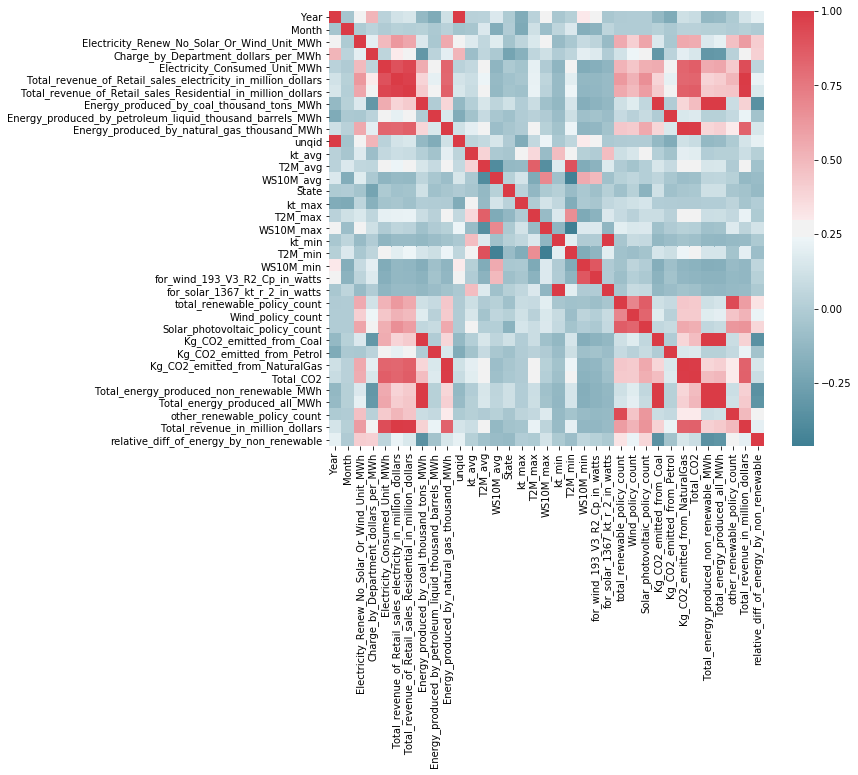

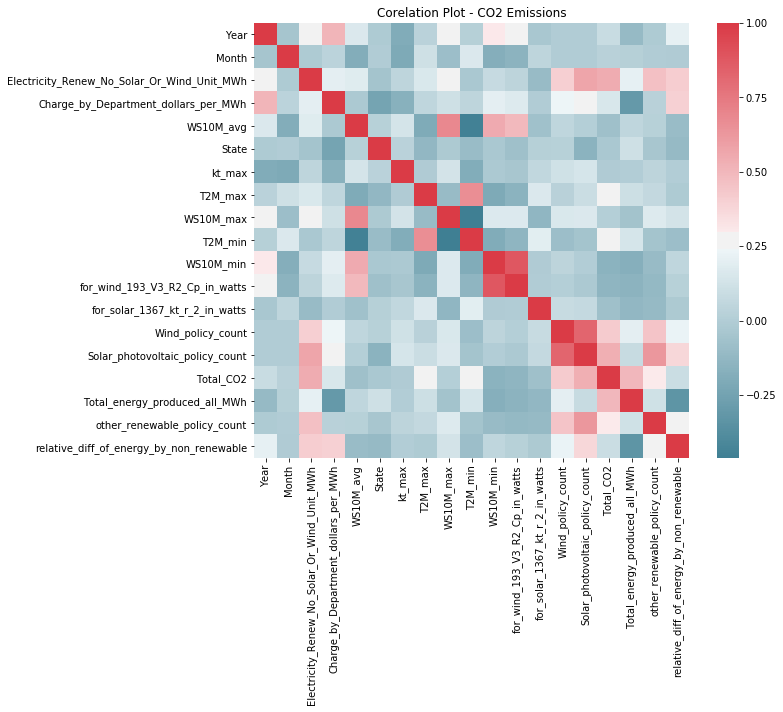

In [5]:
f, ax = plt.subplots(figsize=(10, 8))
corr = new_df.corr()
sns.heatmap(corr, mask=np.zeros_like(corr, dtype=np.bool), cmap=sns.diverging_palette(220, 10, as_cmap=True),
            square=True, ax=ax)
plt.plot()

# correlated list # Electricity_Renew_No_Solar_Or_Wind_Unit_MWh
corr_list = ['Electricity_Consumed_Unit_MWh',
        'Total_revenue_of_Retail_sales_electricity_in_million_dollars',
        'Total_revenue_of_Retail_sales_Residential_in_million_dollars',
        'Energy_produced_by_coal_thousand_tons_MWh',
        'Energy_produced_by_petroleum_liquid_thousand_barrels_MWh',
        'Energy_produced_by_natural_gas_thousand_MWh', 
        'kt_avg', 'kt_min',
        'unqid', 'Total_energy_produced_non_renewable_MWh',
        'T2M_avg', 
        'total_renewable_policy_count',
        'Kg_CO2_emitted_from_Coal', 
        'Kg_CO2_emitted_from_Petrol',
        'Kg_CO2_emitted_from_NaturalGas',
        'Total_revenue_in_million_dollars']

new_df = new_df.drop(corr_list, axis = 1)

# Plot again to see if still correlated columns exists
f, ax = plt.subplots(figsize=(10, 8))
corr = new_df.corr()
sns.heatmap(corr, mask=np.zeros_like(corr, dtype=np.bool), cmap=sns.diverging_palette(220, 10, as_cmap=True),
            square=True, ax=ax)
plt.title('Corelation Plot - CO2 Emissions')
plt.plot()

# Train Test Split

In [6]:
# # Modifying the data before train test split to get more features
print('Shape before One Hot:',new_df.shape)
new_df = pd.get_dummies(new_df, prefix=['other_pcount_', 'wind_pcount_', 'solar_pcount_'], 
                        columns=['other_renewable_policy_count', 'Wind_policy_count',
                                 'Solar_photovoltaic_policy_count'
                                ]
                       )

print('Shape after One Hot:',new_df.shape)

# Step 3: separating the Y from actual data
y = new_df.Total_CO2
x = new_df.drop(['Total_CO2'], axis=1)
y = np.log(y) # Comment this for bad model

# Just to make sure that dimensions are okay to be used for split.
print('Shapes before splitting',y.shape, x.shape, new_df.shape) 

# Preparing Train Test Split
X_train, X_test, y_train, y_test = train_test_split(x, y, test_size=0.15, random_state=1)
print('Shapes after splitting', X_train.shape, y_train.shape, X_test.shape, y_test.shape)

Shape before One Hot: (9084, 19)
Shape after One Hot: (9084, 105)
Shapes before splitting (9084,) (9084, 104) (9084, 105)
Shapes after splitting (7721, 104) (7721,) (1363, 104) (1363,)


In [7]:
# A quick look a final dataset for modeling
X_train.sample(5)

,Year,Month,Electricity_Renew_No_Solar_Or_Wind_Unit_MWh,Charge_by_Department_dollars_per_MWh,WS10M_avg,State,kt_max,T2M_max,WS10M_max,T2M_min,WS10M_min,for_wind_193_V3_R2_Cp_in_watts,for_solar_1367_kt_r_2_in_watts,Total_energy_produced_all_MWh,relative_diff_of_energy_by_non_renewable,other_pcount__5,other_pcount__7,other_pcount__10,other_pcount__11,other_pcount__12,other_pcount__13,other_pcount__16,other_pcount__18,other_pcount__20,other_pcount__21,other_pcount__22,other_pcount__24,other_pcount__25,other_pcount__26,other_pcount__31,other_pcount__33,other_pcount__34,other_pcount__36,other_pcount__39,other_pcount__40,...,wind_pcount__22,wind_pcount__24,wind_pcount__25,wind_pcount__28,wind_pcount__30,solar_pcount__2,solar_pcount__3,solar_pcount__6,solar_pcount__7,solar_pcount__8,solar_pcount__9,solar_pcount__10,solar_pcount__11,solar_pcount__12,solar_pcount__13,solar_pcount__14,solar_pcount__15,solar_pcount__16,solar_pcount__17,solar_pcount__18,solar_pcount__19,solar_pcount__21,solar_pcount__22,solar_pcount__23,solar_pcount__25,solar_pcount__26,solar_pcount__27,solar_pcount__28,solar_pcount__29,solar_pcount__32,solar_pcount__33,solar_pcount__40,solar_pcount__47,solar_pcount__54,solar_pcount__79
4986,2010,10,48863.07,0.000136,4.623226,17,0.72,23.59,8.65,8.80,1.77,4682.643079,51.5359,4.529440e+06,-97.842423,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,...,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0
8850,2017,2,145447.52,0.000199,3.834405,18,0.72,12.24,10.10,0.22,1.55,3144.606818,15.8572,1.584678e+06,-81.643268,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0
5858,2011,6,210616.06,0.000116,3.969951,25,0.77,32.33,7.98,2.35,1.48,2737.514343,67.3931,2.179774e+06,-80.675420,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0
2879,2006,2,88412.90,0.000072,4.614056,45,0.82,29.79,10.13,0.00,1.03,922.747615,39.6430,1.732625e+07,-98.979434,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,...,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0
2374,2005,2,332509.31,0.000094,4.291703,8,0.79,22.93,11.08,4.96,0.95,724.005846,7.9286,1.682956e+07,-96.048509,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0


# Linear Regression

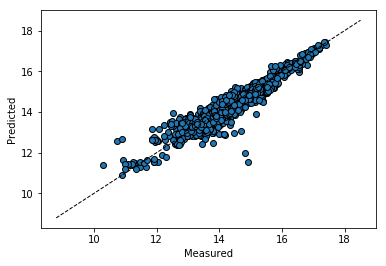

Value of root mean square error: 0.014215548251


In [8]:
lr = linear_model.LinearRegression()
lr.fit(X_train, y_train)

# cross_val_predict returns an array of the same size as `y` where each entry
# is a prediction obtained by cross validation:
predicted = cross_val_predict(lr, X_train, y_train, cv=10)

fig, ax = plt.subplots()
ax.scatter(y_test, lr.predict(X_test), edgecolors=(0, 0, 0))
ax.plot([y.min()-1, y.max()+1], [y.min()-1, y.max()+1], 'k--', lw=1)
ax.set_xlabel('Measured')
ax.set_ylabel('Predicted')
plt.show()

print('Value of root mean square error:', np.square(sum((y_test - lr.predict(X_test))**2)/y_test.shape[0]))

In [9]:
print('Score on training data: ',lr.score(X_train, y_train)) # score on training data
print('Score on test data: ',lr.score(X_test, y_test)) # score on test data

Score on training data:  0.899353789438
Score on test data:  0.893104670529


In [10]:
import statsmodels.api as sm

# Model Training
model = sm.OLS(y_train, X_train).fit()

# Print out the statistics
model.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:              Total_CO2   R-squared:                       0.899
Model:                            OLS   Adj. R-squared:                  0.899
Method:                 Least Squares   F-statistic:                     1160.
Date:                Mon, 11 Dec 2017   Prob (F-statistic):               0.00
Time:                        22:09:08   Log-Likelihood:                -2727.1
No. Observations:                7721   AIC:                             5574.
Df Residuals:                    7661   BIC:                             5991.
Df Model:                          59                                         
Covariance Type:            nonrobust                                         
===============================================================================================================
                                                  coef    std err          t      P>|t|      [0.025      0.975]
---------------------------------------------------------------------------------------------------------------
Year                                            0.0568      0.002     31.111      0.000       0.053       0.060
Month                                           0.0039      0.001      3.148      0.002       0.001       0.006
Electricity_Renew_No_Solar_Or_Wind_Unit_MWh -1.664e-07   1.39e-08    -11.962      0.000   -1.94e-07   -1.39e-07
Charge_by_Department_dollars_per_MWh        -3118.1584    417.210     -7.474      0.000   -3936.004   -2300.312
WS10M_avg                                      -0.0330      0.011     -2.884      0.004      -0.055      -0.011
State                                          -2.1529      0.079    -27.327      0.000      -2.307      -1.998
kt_max                                         -0.1777      0.075     -2.366      0.018      -0.325      -0.030
T2M_max                                         0.0017      0.001      1.571      0.116      -0.000       0.004
WS10M_max                                      -0.0077      0.003     -2.509      0.012      -0.014      -0.002
T2M_min                                         0.0206      0.001     18.977      0.000       0.018       0.023
WS10M_min                                      -0.0795      0.028     -2.814      0.005      -0.135      -0.024
for_wind_193_V3_R2_Cp_in_watts               8.806e-06   5.65e-06      1.560      0.119   -2.26e-06    1.99e-05
for_solar_1367_kt_r_2_in_watts                  0.0006      0.000      2.649      0.008       0.000       0.001
Total_energy_produced_all_MWh               -3.368e-09    1.3e-09     -2.600      0.009   -5.91e-09   -8.29e-10
relative_diff_of_energy_by_non_renewable       -0.0037      0.000    -19.631      0.000      -0.004      -0.003
other_pcount__5                               -34.6147      1.247    -27.767      0.000     -37.058     -32.171
other_pcount__7                                31.5737      1.166     27.071      0.000      29.287      33.860
other_pcount__10                              -19.9660      0.703    -28.387      0.000     -21.345     -18.587
other_pcount__11                               -2.7828      0.117    -23.692      0.000      -3.013      -2.553
other_pcount__12                                8.6201      0.320     26.958      0.000       7.993       9.247
other_pcount__13                              -18.8415      0.646    -29.150      0.000     -20.109     -17.574
other_pcount__16                              -38.4926      1.419    -27.117      0.000     -41.275     -35.710
other_pcount__18                              -34.2190      1.258    -27.194      0.000     -36.686     -31.752
other_pcount__20                               -5.9696      0.210    -28.433      0.000      -6.381      -5.558
other_pcount__21                               -6.2986     

# Predictions on Test Data chart

In [11]:
# predictions = model.predict(X_test) # make the predictions by the model

# # Least Squares
# print('The sum of least squares:',np.square(sum(y_test - predictions)))

# Predictions_df = pd.DataFrame(
#     {
#     'date': (X_test["Year"].map(str) + '-' + X_test["Month"].map(str)),  
#     'y_test':y_test,
#     'predictions': predictions
# })
# # adjusting the size of plot to be displayed
# %pylab inline
# pylab.rcParams['figure.figsize'] = (16, 10)

# Predictions_df.sort_values(['date'], ascending=[1]).plot()

In [12]:
print('Slope:', lr.intercept_)
# print('\nCoefficient:', lr.coef_)


imp_df = pd.DataFrame(lr.coef_, X_train.columns)
imp_df

Slope: -99.2662520249


,0
Year,5.679599e-02
Month,3.890556e-03
Electricity_Renew_No_Solar_Or_Wind_Unit_MWh,-1.664198e-07
Charge_by_Department_dollars_per_MWh,-3.118158e+03
WS10M_avg,-3.299789e-02
State,-9.298033e-03
kt_max,-1.776730e-01
T2M_max,1.666747e-03
WS10M_max,-7.708042e-03
T2M_min,2.060784e-02


# Random Forest

In [13]:
from sklearn.ensemble import RandomForestRegressor
from sklearn.datasets import make_regression

X, y = make_regression(n_features=4, n_informative=2, random_state=0, shuffle=False)
regr = RandomForestRegressor(max_depth=10, random_state=0)
regr.fit(X_train, y_train)

RandomForestRegressor(bootstrap=True, criterion='mse', max_depth=3,
           max_features='auto', max_leaf_nodes=1,
           min_samples_leaf=1, min_samples_split=2,
           min_weight_fraction_leaf=0.0, n_estimators=10, n_jobs=1,
           oob_score=False, random_state=0, verbose=0, warm_start=False)

# print(regr.feature_importances_)

RandomForestRegressor(bootstrap=True, criterion='mse', max_depth=3,
           max_features='auto', max_leaf_nodes=1,
           min_impurity_decrease=0.0, min_impurity_split=None,
           min_samples_leaf=1, min_samples_split=2,
           min_weight_fraction_leaf=0.0, n_estimators=10, n_jobs=1,
           oob_score=False, random_state=0, verbose=0, warm_start=False)

In [14]:
# # Sorting importance matrix
# features = X_train.columns
# importances = regr.feature_importances_
# indices = np.argsort(importances)

# # adjusting the ploting area and aesthetics
# import matplotlib as mpl
# label_size = 7.25
# mpl.rcParams['ytick.labelsize'] = label_size 
# f, ax = plt.subplots(figsize=(10, 16))

# plt.title('Feature Importances')
# plt.barh(range(len(indices)), importances[indices], color='b', align='center')
# plt.yticks(range(len(indices)), features) ## removed [indices]
# plt.xlabel('Relative Importance', fontsize = 5)
# plt.xlabel('Relative Importance', fontsize = 1)
# plt.show()

# Step regression:

In [15]:
import statsmodels.formula.api as smf

def forward_selected(data, response):
    """Linear model designed by forward selection.

    Parameters:
    -----------
    data : pandas DataFrame with all possible predictors and response

    response: string, name of response column in data

    Returns:
    --------
    model: an "optimal" fitted statsmodels linear model with an intercept
           selected by forward selection evaluated by adjusted R-squared
    """
    remaining = set(data.columns)
    remaining.remove(response)
    selected = []
    current_score, best_new_score = 0.0, 0.0
    loop_break = 0
    while remaining and current_score == best_new_score:
        loop_break +=1
        scores_with_candidates = []
        inside_loop = 0
        for candidate in remaining:
            
            formula = "{} ~ {} + 1".format(response, ' + '.join(selected + [candidate]))
            score = smf.ols(formula, data).fit().rsquared_adj
            inside_loop +=1
            print('formula: ',loop_break,': ',inside_loop,':: ', formula)
            print('score: ', score, '\n\n')
            
            if score == 1.0:
                print('score fault, multicolinearity in the provided data, Exiting! \n')
                break
            scores_with_candidates.append((score, candidate))
            
        scores_with_candidates.sort()
        best_new_score, best_candidate = scores_with_candidates.pop()
        if current_score < best_new_score:
            remaining.remove(best_candidate)
            selected.append(best_candidate)
            current_score = best_new_score
        if loop_break == 20000:
            print('breaking....')
            break
            
    formula = "{} ~ {} + 1".format(response, ' + '.join(selected))
    model = smf.ols(formula, data).fit()
    return model

In [16]:
model_co2 = forward_selected(new_df, 'Total_CO2')

formula:  1 :  1 ::  Total_CO2 ~ WS10M_max + 1
score:  2.69336407056e-05 


formula:  1 :  2 ::  Total_CO2 ~ for_solar_1367_kt_r_2_in_watts + 1
score:  0.00521116783222 


formula:  1 :  3 ::  Total_CO2 ~ wind_pcount__8 + 1
score:  0.0173156790917 


formula:  1 :  4 ::  Total_CO2 ~ other_pcount__25 + 1
score:  0.00113629556944 


formula:  1 :  5 ::  Total_CO2 ~ wind_pcount__14 + 1
score:  0.00245616856389 


formula:  1 :  6 ::  Total_CO2 ~ solar_pcount__79 + 1
score:  0.0860562986631 


formula:  1 :  7 ::  Total_CO2 ~ solar_pcount__23 + 1
score:  0.000435082947729 


formula:  1 :  8 ::  Total_CO2 ~ other_pcount__16 + 1
score:  0.0003032730945 


formula:  1 :  9 ::  Total_CO2 ~ other_pcount__142 + 1
score:  0.00436105761714 


formula:  1 :  10 ::  Total_CO2 ~ wind_pcount__17 + 1
score:  0.00570682387615 


formula:  1 :  11 ::  Total_CO2 ~ relative_diff_of_energy_by_non_renewable + 1
score:  0.00920626063894 


formula:  1 :  12 ::  Total_CO2 ~ other_pcount__36 + 1
score:  0.0085

formula:  2 :  10 ::  Total_CO2 ~ wind_pcount__30 + wind_pcount__17 + 1
score:  0.547210538619 


formula:  2 :  11 ::  Total_CO2 ~ wind_pcount__30 + relative_diff_of_energy_by_non_renewable + 1
score:  0.559558164166 


formula:  2 :  12 ::  Total_CO2 ~ wind_pcount__30 + other_pcount__36 + 1
score:  0.549523690724 


formula:  2 :  13 ::  Total_CO2 ~ wind_pcount__30 + T2M_min + 1
score:  0.591672244919 


formula:  2 :  14 ::  Total_CO2 ~ wind_pcount__30 + other_pcount__47 + 1
score:  0.544789303802 


formula:  2 :  15 ::  Total_CO2 ~ wind_pcount__30 + solar_pcount__8 + 1
score:  0.543704168559 


formula:  2 :  16 ::  Total_CO2 ~ wind_pcount__30 + for_wind_193_V3_R2_Cp_in_watts + 1
score:  0.55331808429 


formula:  2 :  17 ::  Total_CO2 ~ wind_pcount__30 + wind_pcount__15 + 1
score:  0.543671465119 


formula:  2 :  18 ::  Total_CO2 ~ wind_pcount__30 + wind_pcount__28 + 1
score:  0.639832505432 


formula:  2 :  19 ::  Total_CO2 ~ wind_pcount__30 + wind_pcount__13 + 1
score:  0.552

formula:  3 :  2 ::  Total_CO2 ~ wind_pcount__30 + solar_pcount__26 + for_solar_1367_kt_r_2_in_watts + 1
score:  0.694013884179 


formula:  3 :  3 ::  Total_CO2 ~ wind_pcount__30 + solar_pcount__26 + wind_pcount__8 + 1
score:  0.701443822956 


formula:  3 :  4 ::  Total_CO2 ~ wind_pcount__30 + solar_pcount__26 + other_pcount__25 + 1
score:  0.698990283234 


formula:  3 :  5 ::  Total_CO2 ~ wind_pcount__30 + solar_pcount__26 + wind_pcount__14 + 1
score:  0.694054082705 


formula:  3 :  6 ::  Total_CO2 ~ wind_pcount__30 + solar_pcount__26 + solar_pcount__79 + 1
score:  0.795694638096 


formula:  3 :  7 ::  Total_CO2 ~ wind_pcount__30 + solar_pcount__26 + solar_pcount__23 + 1
score:  0.693852247434 


formula:  3 :  8 ::  Total_CO2 ~ wind_pcount__30 + solar_pcount__26 + other_pcount__16 + 1
score:  0.694104331625 


formula:  3 :  9 ::  Total_CO2 ~ wind_pcount__30 + solar_pcount__26 + other_pcount__142 + 1
score:  0.695570195967 


formula:  3 :  10 ::  Total_CO2 ~ wind_pcount__30 + 

formula:  3 :  80 ::  Total_CO2 ~ wind_pcount__30 + solar_pcount__26 + solar_pcount__15 + 1
score:  0.694243705146 


formula:  3 :  81 ::  Total_CO2 ~ wind_pcount__30 + solar_pcount__26 + wind_pcount__10 + 1
score:  0.693852797844 


formula:  3 :  82 ::  Total_CO2 ~ wind_pcount__30 + solar_pcount__26 + solar_pcount__22 + 1
score:  0.695009775248 


formula:  3 :  83 ::  Total_CO2 ~ wind_pcount__30 + solar_pcount__26 + wind_pcount__24 + 1
score:  0.693852247434 


formula:  3 :  84 ::  Total_CO2 ~ wind_pcount__30 + solar_pcount__26 + other_pcount__59 + 1
score:  0.694567229756 


formula:  3 :  85 ::  Total_CO2 ~ wind_pcount__30 + solar_pcount__26 + T2M_max + 1
score:  0.713668792133 


formula:  3 :  86 ::  Total_CO2 ~ wind_pcount__30 + solar_pcount__26 + other_pcount__22 + 1
score:  0.693901276671 


formula:  3 :  87 ::  Total_CO2 ~ wind_pcount__30 + solar_pcount__26 + other_pcount__12 + 1
score:  0.695470895321 


formula:  3 :  88 ::  Total_CO2 ~ wind_pcount__30 + solar_pcount__2

formula:  4 :  48 ::  Total_CO2 ~ wind_pcount__30 + solar_pcount__26 + wind_pcount__28 + other_pcount__41 + 1
score:  0.795813465516 


formula:  4 :  49 ::  Total_CO2 ~ wind_pcount__30 + solar_pcount__26 + wind_pcount__28 + Year + 1
score:  0.803633510892 


formula:  4 :  50 ::  Total_CO2 ~ wind_pcount__30 + solar_pcount__26 + wind_pcount__28 + solar_pcount__13 + 1
score:  0.798210076134 


formula:  4 :  51 ::  Total_CO2 ~ wind_pcount__30 + solar_pcount__26 + wind_pcount__28 + other_pcount__43 + 1
score:  0.797954605393 


formula:  4 :  52 ::  Total_CO2 ~ wind_pcount__30 + solar_pcount__26 + wind_pcount__28 + wind_pcount__3 + 1
score:  0.796682146152 


formula:  4 :  53 ::  Total_CO2 ~ wind_pcount__30 + solar_pcount__26 + wind_pcount__28 + other_pcount__24 + 1
score:  0.804314731349 


formula:  4 :  54 ::  Total_CO2 ~ wind_pcount__30 + solar_pcount__26 + wind_pcount__28 + solar_pcount__27 + 1
score:  0.795675591299 


formula:  4 :  55 ::  Total_CO2 ~ wind_pcount__30 + solar_pcou

formula:  5 :  12 ::  Total_CO2 ~ wind_pcount__30 + solar_pcount__26 + wind_pcount__28 + T2M_min + other_pcount__36 + 1
score:  0.827496037631 


formula:  5 :  13 ::  Total_CO2 ~ wind_pcount__30 + solar_pcount__26 + wind_pcount__28 + T2M_min + other_pcount__47 + 1
score:  0.825122634759 


formula:  5 :  14 ::  Total_CO2 ~ wind_pcount__30 + solar_pcount__26 + wind_pcount__28 + T2M_min + solar_pcount__8 + 1
score:  0.824986543795 


formula:  5 :  15 ::  Total_CO2 ~ wind_pcount__30 + solar_pcount__26 + wind_pcount__28 + T2M_min + for_wind_193_V3_R2_Cp_in_watts + 1
score:  0.826099198234 


formula:  5 :  16 ::  Total_CO2 ~ wind_pcount__30 + solar_pcount__26 + wind_pcount__28 + T2M_min + wind_pcount__15 + 1
score:  0.82494009952 


formula:  5 :  17 ::  Total_CO2 ~ wind_pcount__30 + solar_pcount__26 + wind_pcount__28 + T2M_min + wind_pcount__13 + 1
score:  0.826953329185 


formula:  5 :  18 ::  Total_CO2 ~ wind_pcount__30 + solar_pcount__26 + wind_pcount__28 + T2M_min + wind_pcount__7 

formula:  5 :  77 ::  Total_CO2 ~ wind_pcount__30 + solar_pcount__26 + wind_pcount__28 + T2M_min + wind_pcount__5 + 1
score:  0.82497340176 


formula:  5 :  78 ::  Total_CO2 ~ wind_pcount__30 + solar_pcount__26 + wind_pcount__28 + T2M_min + solar_pcount__15 + 1
score:  0.824605906389 


formula:  5 :  79 ::  Total_CO2 ~ wind_pcount__30 + solar_pcount__26 + wind_pcount__28 + T2M_min + wind_pcount__10 + 1
score:  0.824580390818 


formula:  5 :  80 ::  Total_CO2 ~ wind_pcount__30 + solar_pcount__26 + wind_pcount__28 + T2M_min + solar_pcount__22 + 1
score:  0.824658373235 


formula:  5 :  81 ::  Total_CO2 ~ wind_pcount__30 + solar_pcount__26 + wind_pcount__28 + T2M_min + wind_pcount__24 + 1
score:  0.824482785694 


formula:  5 :  82 ::  Total_CO2 ~ wind_pcount__30 + solar_pcount__26 + wind_pcount__28 + T2M_min + other_pcount__59 + 1
score:  0.825096228851 


formula:  5 :  83 ::  Total_CO2 ~ wind_pcount__30 + solar_pcount__26 + wind_pcount__28 + T2M_min + T2M_max + 1
score:  0.82493769

formula:  6 :  33 ::  Total_CO2 ~ wind_pcount__30 + solar_pcount__26 + wind_pcount__28 + T2M_min + solar_pcount__28 + Total_energy_produced_all_MWh + 1
score:  0.852525269793 


formula:  6 :  34 ::  Total_CO2 ~ wind_pcount__30 + solar_pcount__26 + wind_pcount__28 + T2M_min + solar_pcount__28 + other_pcount__31 + 1
score:  0.849279981796 


formula:  6 :  35 ::  Total_CO2 ~ wind_pcount__30 + solar_pcount__26 + wind_pcount__28 + T2M_min + solar_pcount__28 + kt_max + 1
score:  0.848606759564 


formula:  6 :  36 ::  Total_CO2 ~ wind_pcount__30 + solar_pcount__26 + wind_pcount__28 + T2M_min + solar_pcount__28 + other_pcount__42 + 1
score:  0.850295258478 


formula:  6 :  37 ::  Total_CO2 ~ wind_pcount__30 + solar_pcount__26 + wind_pcount__28 + T2M_min + solar_pcount__28 + wind_pcount__4 + 1
score:  0.848160002555 


formula:  6 :  38 ::  Total_CO2 ~ wind_pcount__30 + solar_pcount__26 + wind_pcount__28 + T2M_min + solar_pcount__28 + wind_pcount__11 + 1
score:  0.848097695719 


formula:  

formula:  6 :  87 ::  Total_CO2 ~ wind_pcount__30 + solar_pcount__26 + wind_pcount__28 + T2M_min + solar_pcount__28 + other_pcount__7 + 1
score:  0.848841258803 


formula:  6 :  88 ::  Total_CO2 ~ wind_pcount__30 + solar_pcount__26 + wind_pcount__28 + T2M_min + solar_pcount__28 + solar_pcount__16 + 1
score:  0.848091383942 


formula:  6 :  89 ::  Total_CO2 ~ wind_pcount__30 + solar_pcount__26 + wind_pcount__28 + T2M_min + solar_pcount__28 + other_pcount__73 + 1
score:  0.848100673363 


formula:  6 :  90 ::  Total_CO2 ~ wind_pcount__30 + solar_pcount__26 + wind_pcount__28 + T2M_min + solar_pcount__28 + other_pcount__13 + 1
score:  0.849251683947 


formula:  6 :  91 ::  Total_CO2 ~ wind_pcount__30 + solar_pcount__26 + wind_pcount__28 + T2M_min + solar_pcount__28 + solar_pcount__17 + 1
score:  0.848091909733 


formula:  6 :  92 ::  Total_CO2 ~ wind_pcount__30 + solar_pcount__26 + wind_pcount__28 + T2M_min + solar_pcount__28 + solar_pcount__10 + 1
score:  0.848429549266 


formula:  6

formula:  7 :  37 ::  Total_CO2 ~ wind_pcount__30 + solar_pcount__26 + wind_pcount__28 + T2M_min + solar_pcount__28 + wind_pcount__25 + wind_pcount__4 + 1
score:  0.862265602892 


formula:  7 :  38 ::  Total_CO2 ~ wind_pcount__30 + solar_pcount__26 + wind_pcount__28 + T2M_min + solar_pcount__28 + wind_pcount__25 + wind_pcount__11 + 1
score:  0.86191963488 


formula:  7 :  39 ::  Total_CO2 ~ wind_pcount__30 + solar_pcount__26 + wind_pcount__28 + T2M_min + solar_pcount__28 + wind_pcount__25 + solar_pcount__11 + 1
score:  0.862740005856 


formula:  7 :  40 ::  Total_CO2 ~ wind_pcount__30 + solar_pcount__26 + wind_pcount__28 + T2M_min + solar_pcount__28 + wind_pcount__25 + solar_pcount__9 + 1
score:  0.863479221673 


formula:  7 :  41 ::  Total_CO2 ~ wind_pcount__30 + solar_pcount__26 + wind_pcount__28 + T2M_min + solar_pcount__28 + wind_pcount__25 + solar_pcount__2 + 1
score:  0.86203339474 


formula:  7 :  42 ::  Total_CO2 ~ wind_pcount__30 + solar_pcount__26 + wind_pcount__28 + T2M

formula:  7 :  85 ::  Total_CO2 ~ wind_pcount__30 + solar_pcount__26 + wind_pcount__28 + T2M_min + solar_pcount__28 + wind_pcount__25 + other_pcount__12 + 1
score:  0.862219582979 


formula:  7 :  86 ::  Total_CO2 ~ wind_pcount__30 + solar_pcount__26 + wind_pcount__28 + T2M_min + solar_pcount__28 + wind_pcount__25 + solar_pcount__32 + 1
score:  0.863895972764 


formula:  7 :  87 ::  Total_CO2 ~ wind_pcount__30 + solar_pcount__26 + wind_pcount__28 + T2M_min + solar_pcount__28 + wind_pcount__25 + other_pcount__7 + 1
score:  0.862461622481 


formula:  7 :  88 ::  Total_CO2 ~ wind_pcount__30 + solar_pcount__26 + wind_pcount__28 + T2M_min + solar_pcount__28 + wind_pcount__25 + solar_pcount__16 + 1
score:  0.861990076241 


formula:  7 :  89 ::  Total_CO2 ~ wind_pcount__30 + solar_pcount__26 + wind_pcount__28 + T2M_min + solar_pcount__28 + wind_pcount__25 + other_pcount__73 + 1
score:  0.861929787744 


formula:  7 :  90 ::  Total_CO2 ~ wind_pcount__30 + solar_pcount__26 + wind_pcount__28

formula:  8 :  31 ::  Total_CO2 ~ wind_pcount__30 + solar_pcount__26 + wind_pcount__28 + T2M_min + solar_pcount__28 + wind_pcount__25 + Year + other_pcount__66 + 1
score:  0.869873101054 


formula:  8 :  32 ::  Total_CO2 ~ wind_pcount__30 + solar_pcount__26 + wind_pcount__28 + T2M_min + solar_pcount__28 + wind_pcount__25 + Year + wind_pcount__6 + 1
score:  0.871440097742 


formula:  8 :  33 ::  Total_CO2 ~ wind_pcount__30 + solar_pcount__26 + wind_pcount__28 + T2M_min + solar_pcount__28 + wind_pcount__25 + Year + Total_energy_produced_all_MWh + 1
score:  0.872619568955 


formula:  8 :  34 ::  Total_CO2 ~ wind_pcount__30 + solar_pcount__26 + wind_pcount__28 + T2M_min + solar_pcount__28 + wind_pcount__25 + Year + other_pcount__31 + 1
score:  0.870972548103 


formula:  8 :  35 ::  Total_CO2 ~ wind_pcount__30 + solar_pcount__26 + wind_pcount__28 + T2M_min + solar_pcount__28 + wind_pcount__25 + Year + kt_max + 1
score:  0.869602210901 


formula:  8 :  36 ::  Total_CO2 ~ wind_pcount__30

formula:  8 :  80 ::  Total_CO2 ~ wind_pcount__30 + solar_pcount__26 + wind_pcount__28 + T2M_min + solar_pcount__28 + wind_pcount__25 + Year + wind_pcount__24 + 1
score:  0.869591837132 


formula:  8 :  81 ::  Total_CO2 ~ wind_pcount__30 + solar_pcount__26 + wind_pcount__28 + T2M_min + solar_pcount__28 + wind_pcount__25 + Year + other_pcount__59 + 1
score:  0.869740328625 


formula:  8 :  82 ::  Total_CO2 ~ wind_pcount__30 + solar_pcount__26 + wind_pcount__28 + T2M_min + solar_pcount__28 + wind_pcount__25 + Year + T2M_max + 1
score:  0.8704062404 


formula:  8 :  83 ::  Total_CO2 ~ wind_pcount__30 + solar_pcount__26 + wind_pcount__28 + T2M_min + solar_pcount__28 + wind_pcount__25 + Year + other_pcount__22 + 1
score:  0.870532378479 


formula:  8 :  84 ::  Total_CO2 ~ wind_pcount__30 + solar_pcount__26 + wind_pcount__28 + T2M_min + solar_pcount__28 + wind_pcount__25 + Year + other_pcount__12 + 1
score:  0.869745031441 


formula:  8 :  85 ::  Total_CO2 ~ wind_pcount__30 + solar_pcou

formula:  9 :  25 ::  Total_CO2 ~ wind_pcount__30 + solar_pcount__26 + wind_pcount__28 + T2M_min + solar_pcount__28 + wind_pcount__25 + Year + other_pcount__25 + wind_pcount__9 + 1
score:  0.87847660018 


formula:  9 :  26 ::  Total_CO2 ~ wind_pcount__30 + solar_pcount__26 + wind_pcount__28 + T2M_min + solar_pcount__28 + wind_pcount__25 + Year + other_pcount__25 + other_pcount__26 + 1
score:  0.877327056137 


formula:  9 :  27 ::  Total_CO2 ~ wind_pcount__30 + solar_pcount__26 + wind_pcount__28 + T2M_min + solar_pcount__28 + wind_pcount__25 + Year + other_pcount__25 + wind_pcount__22 + 1
score:  0.876252448334 


formula:  9 :  28 ::  Total_CO2 ~ wind_pcount__30 + solar_pcount__26 + wind_pcount__28 + T2M_min + solar_pcount__28 + wind_pcount__25 + Year + other_pcount__25 + solar_pcount__21 + 1
score:  0.876633064189 


formula:  9 :  29 ::  Total_CO2 ~ wind_pcount__30 + solar_pcount__26 + wind_pcount__28 + T2M_min + solar_pcount__28 + wind_pcount__25 + Year + other_pcount__25 + other_

formula:  9 :  67 ::  Total_CO2 ~ wind_pcount__30 + solar_pcount__26 + wind_pcount__28 + T2M_min + solar_pcount__28 + wind_pcount__25 + Year + other_pcount__25 + solar_pcount__33 + 1
score:  0.876772936531 


formula:  9 :  68 ::  Total_CO2 ~ wind_pcount__30 + solar_pcount__26 + wind_pcount__28 + T2M_min + solar_pcount__28 + wind_pcount__25 + Year + other_pcount__25 + other_pcount__78 + 1
score:  0.876251259935 


formula:  9 :  69 ::  Total_CO2 ~ wind_pcount__30 + solar_pcount__26 + wind_pcount__28 + T2M_min + solar_pcount__28 + wind_pcount__25 + Year + other_pcount__25 + other_pcount__20 + 1
score:  0.876892486125 


formula:  9 :  70 ::  Total_CO2 ~ wind_pcount__30 + solar_pcount__26 + wind_pcount__28 + T2M_min + solar_pcount__28 + wind_pcount__25 + Year + other_pcount__25 + solar_pcount__18 + 1
score:  0.876251259935 


formula:  9 :  71 ::  Total_CO2 ~ wind_pcount__30 + solar_pcount__26 + wind_pcount__28 + T2M_min + solar_pcount__28 + wind_pcount__25 + Year + other_pcount__25 + Mo

formula:  10 :  11 ::  Total_CO2 ~ wind_pcount__30 + solar_pcount__26 + wind_pcount__28 + T2M_min + solar_pcount__28 + wind_pcount__25 + Year + other_pcount__25 + Total_energy_produced_all_MWh + other_pcount__36 + 1
score:  0.880998324685 


formula:  10 :  12 ::  Total_CO2 ~ wind_pcount__30 + solar_pcount__26 + wind_pcount__28 + T2M_min + solar_pcount__28 + wind_pcount__25 + Year + other_pcount__25 + Total_energy_produced_all_MWh + other_pcount__47 + 1
score:  0.879926777003 


formula:  10 :  13 ::  Total_CO2 ~ wind_pcount__30 + solar_pcount__26 + wind_pcount__28 + T2M_min + solar_pcount__28 + wind_pcount__25 + Year + other_pcount__25 + Total_energy_produced_all_MWh + solar_pcount__8 + 1
score:  0.881177807789 


formula:  10 :  14 ::  Total_CO2 ~ wind_pcount__30 + solar_pcount__26 + wind_pcount__28 + T2M_min + solar_pcount__28 + wind_pcount__25 + Year + other_pcount__25 + Total_energy_produced_all_MWh + for_wind_193_V3_R2_Cp_in_watts + 1
score:  0.881879779742 


formula:  10 :  15 

formula:  10 :  47 ::  Total_CO2 ~ wind_pcount__30 + solar_pcount__26 + wind_pcount__28 + T2M_min + solar_pcount__28 + wind_pcount__25 + Year + other_pcount__25 + Total_energy_produced_all_MWh + other_pcount__43 + 1
score:  0.880320195992 


formula:  10 :  48 ::  Total_CO2 ~ wind_pcount__30 + solar_pcount__26 + wind_pcount__28 + T2M_min + solar_pcount__28 + wind_pcount__25 + Year + other_pcount__25 + Total_energy_produced_all_MWh + wind_pcount__3 + 1
score:  0.87999408471 


formula:  10 :  49 ::  Total_CO2 ~ wind_pcount__30 + solar_pcount__26 + wind_pcount__28 + T2M_min + solar_pcount__28 + wind_pcount__25 + Year + other_pcount__25 + Total_energy_produced_all_MWh + other_pcount__24 + 1
score:  0.87994363317 


formula:  10 :  50 ::  Total_CO2 ~ wind_pcount__30 + solar_pcount__26 + wind_pcount__28 + T2M_min + solar_pcount__28 + wind_pcount__25 + Year + other_pcount__25 + Total_energy_produced_all_MWh + solar_pcount__27 + 1
score:  0.880476905218 


formula:  10 :  51 ::  Total_CO2 ~ w

formula:  10 :  83 ::  Total_CO2 ~ wind_pcount__30 + solar_pcount__26 + wind_pcount__28 + T2M_min + solar_pcount__28 + wind_pcount__25 + Year + other_pcount__25 + Total_energy_produced_all_MWh + solar_pcount__32 + 1
score:  0.881032383626 


formula:  10 :  84 ::  Total_CO2 ~ wind_pcount__30 + solar_pcount__26 + wind_pcount__28 + T2M_min + solar_pcount__28 + wind_pcount__25 + Year + other_pcount__25 + Total_energy_produced_all_MWh + other_pcount__7 + 1
score:  0.880694270714 


formula:  10 :  85 ::  Total_CO2 ~ wind_pcount__30 + solar_pcount__26 + wind_pcount__28 + T2M_min + solar_pcount__28 + wind_pcount__25 + Year + other_pcount__25 + Total_energy_produced_all_MWh + solar_pcount__16 + 1
score:  0.879967109474 


formula:  10 :  86 ::  Total_CO2 ~ wind_pcount__30 + solar_pcount__26 + wind_pcount__28 + T2M_min + solar_pcount__28 + wind_pcount__25 + Year + other_pcount__25 + Total_energy_produced_all_MWh + other_pcount__73 + 1
score:  0.879820812553 


formula:  10 :  87 ::  Total_CO2 

formula:  11 :  24 ::  Total_CO2 ~ wind_pcount__30 + solar_pcount__26 + wind_pcount__28 + T2M_min + solar_pcount__28 + wind_pcount__25 + Year + other_pcount__25 + Total_energy_produced_all_MWh + WS10M_avg + Electricity_Renew_No_Solar_Or_Wind_Unit_MWh + 1
score:  0.882619774001 


formula:  11 :  25 ::  Total_CO2 ~ wind_pcount__30 + solar_pcount__26 + wind_pcount__28 + T2M_min + solar_pcount__28 + wind_pcount__25 + Year + other_pcount__25 + Total_energy_produced_all_MWh + WS10M_avg + wind_pcount__9 + 1
score:  0.883696714402 


formula:  11 :  26 ::  Total_CO2 ~ wind_pcount__30 + solar_pcount__26 + wind_pcount__28 + T2M_min + solar_pcount__28 + wind_pcount__25 + Year + other_pcount__25 + Total_energy_produced_all_MWh + WS10M_avg + other_pcount__26 + 1
score:  0.882848400083 


formula:  11 :  27 ::  Total_CO2 ~ wind_pcount__30 + solar_pcount__26 + wind_pcount__28 + T2M_min + solar_pcount__28 + wind_pcount__25 + Year + other_pcount__25 + Total_energy_produced_all_MWh + WS10M_avg + wind_p

formula:  11 :  60 ::  Total_CO2 ~ wind_pcount__30 + solar_pcount__26 + wind_pcount__28 + T2M_min + solar_pcount__28 + wind_pcount__25 + Year + other_pcount__25 + Total_energy_produced_all_MWh + WS10M_avg + wind_pcount__18 + 1
score:  0.882883204748 


formula:  11 :  61 ::  Total_CO2 ~ wind_pcount__30 + solar_pcount__26 + wind_pcount__28 + T2M_min + solar_pcount__28 + wind_pcount__25 + Year + other_pcount__25 + Total_energy_produced_all_MWh + WS10M_avg + other_pcount__11 + 1
score:  0.884635682985 


formula:  11 :  62 ::  Total_CO2 ~ wind_pcount__30 + solar_pcount__26 + wind_pcount__28 + T2M_min + solar_pcount__28 + wind_pcount__25 + Year + other_pcount__25 + Total_energy_produced_all_MWh + WS10M_avg + wind_pcount__12 + 1
score:  0.883491807658 


formula:  11 :  63 ::  Total_CO2 ~ wind_pcount__30 + solar_pcount__26 + wind_pcount__28 + T2M_min + solar_pcount__28 + wind_pcount__25 + Year + other_pcount__25 + Total_energy_produced_all_MWh + WS10M_avg + solar_pcount__14 + 1
score:  0.88

formula:  12 :  2 ::  Total_CO2 ~ wind_pcount__30 + solar_pcount__26 + wind_pcount__28 + T2M_min + solar_pcount__28 + wind_pcount__25 + Year + other_pcount__25 + Total_energy_produced_all_MWh + WS10M_avg + solar_pcount__8 + for_solar_1367_kt_r_2_in_watts + 1
score:  0.885131141804 


formula:  12 :  3 ::  Total_CO2 ~ wind_pcount__30 + solar_pcount__26 + wind_pcount__28 + T2M_min + solar_pcount__28 + wind_pcount__25 + Year + other_pcount__25 + Total_energy_produced_all_MWh + WS10M_avg + solar_pcount__8 + wind_pcount__8 + 1
score:  0.885688433253 


formula:  12 :  4 ::  Total_CO2 ~ wind_pcount__30 + solar_pcount__26 + wind_pcount__28 + T2M_min + solar_pcount__28 + wind_pcount__25 + Year + other_pcount__25 + Total_energy_produced_all_MWh + WS10M_avg + solar_pcount__8 + wind_pcount__14 + 1
score:  0.88611821441 


formula:  12 :  5 ::  Total_CO2 ~ wind_pcount__30 + solar_pcount__26 + wind_pcount__28 + T2M_min + solar_pcount__28 + wind_pcount__25 + Year + other_pcount__25 + Total_energy_pr

formula:  12 :  32 ::  Total_CO2 ~ wind_pcount__30 + solar_pcount__26 + wind_pcount__28 + T2M_min + solar_pcount__28 + wind_pcount__25 + Year + other_pcount__25 + Total_energy_produced_all_MWh + WS10M_avg + solar_pcount__8 + kt_max + 1
score:  0.885126897508 


formula:  12 :  33 ::  Total_CO2 ~ wind_pcount__30 + solar_pcount__26 + wind_pcount__28 + T2M_min + solar_pcount__28 + wind_pcount__25 + Year + other_pcount__25 + Total_energy_produced_all_MWh + WS10M_avg + solar_pcount__8 + other_pcount__42 + 1
score:  0.886653641612 


formula:  12 :  34 ::  Total_CO2 ~ wind_pcount__30 + solar_pcount__26 + wind_pcount__28 + T2M_min + solar_pcount__28 + wind_pcount__25 + Year + other_pcount__25 + Total_energy_produced_all_MWh + WS10M_avg + solar_pcount__8 + wind_pcount__4 + 1
score:  0.885348791393 


formula:  12 :  35 ::  Total_CO2 ~ wind_pcount__30 + solar_pcount__26 + wind_pcount__28 + T2M_min + solar_pcount__28 + wind_pcount__25 + Year + other_pcount__25 + Total_energy_produced_all_MWh + W

formula:  12 :  67 ::  Total_CO2 ~ wind_pcount__30 + solar_pcount__26 + wind_pcount__28 + T2M_min + solar_pcount__28 + wind_pcount__25 + Year + other_pcount__25 + Total_energy_produced_all_MWh + WS10M_avg + solar_pcount__8 + other_pcount__20 + 1
score:  0.885332361809 


formula:  12 :  68 ::  Total_CO2 ~ wind_pcount__30 + solar_pcount__26 + wind_pcount__28 + T2M_min + solar_pcount__28 + wind_pcount__25 + Year + other_pcount__25 + Total_energy_produced_all_MWh + WS10M_avg + solar_pcount__8 + solar_pcount__18 + 1
score:  0.885137259786 


formula:  12 :  69 ::  Total_CO2 ~ wind_pcount__30 + solar_pcount__26 + wind_pcount__28 + T2M_min + solar_pcount__28 + wind_pcount__25 + Year + other_pcount__25 + Total_energy_produced_all_MWh + WS10M_avg + solar_pcount__8 + Month + 1
score:  0.885136177427 


formula:  12 :  70 ::  Total_CO2 ~ wind_pcount__30 + solar_pcount__26 + wind_pcount__28 + T2M_min + solar_pcount__28 + wind_pcount__25 + Year + other_pcount__25 + Total_energy_produced_all_MWh + 

formula:  13 :  4 ::  Total_CO2 ~ wind_pcount__30 + solar_pcount__26 + wind_pcount__28 + T2M_min + solar_pcount__28 + wind_pcount__25 + Year + other_pcount__25 + Total_energy_produced_all_MWh + WS10M_avg + solar_pcount__8 + other_pcount__13 + wind_pcount__14 + 1
score:  0.89115742265 


formula:  13 :  5 ::  Total_CO2 ~ wind_pcount__30 + solar_pcount__26 + wind_pcount__28 + T2M_min + solar_pcount__28 + wind_pcount__25 + Year + other_pcount__25 + Total_energy_produced_all_MWh + WS10M_avg + solar_pcount__8 + other_pcount__13 + solar_pcount__79 + 1
score:  0.890137491906 


formula:  13 :  6 ::  Total_CO2 ~ wind_pcount__30 + solar_pcount__26 + wind_pcount__28 + T2M_min + solar_pcount__28 + wind_pcount__25 + Year + other_pcount__25 + Total_energy_produced_all_MWh + WS10M_avg + solar_pcount__8 + other_pcount__13 + solar_pcount__23 + 1
score:  0.890206763919 


formula:  13 :  7 ::  Total_CO2 ~ wind_pcount__30 + solar_pcount__26 + wind_pcount__28 + T2M_min + solar_pcount__28 + wind_pcount__2

formula:  13 :  34 ::  Total_CO2 ~ wind_pcount__30 + solar_pcount__26 + wind_pcount__28 + T2M_min + solar_pcount__28 + wind_pcount__25 + Year + other_pcount__25 + Total_energy_produced_all_MWh + WS10M_avg + solar_pcount__8 + other_pcount__13 + wind_pcount__4 + 1
score:  0.890413756655 


formula:  13 :  35 ::  Total_CO2 ~ wind_pcount__30 + solar_pcount__26 + wind_pcount__28 + T2M_min + solar_pcount__28 + wind_pcount__25 + Year + other_pcount__25 + Total_energy_produced_all_MWh + WS10M_avg + solar_pcount__8 + other_pcount__13 + wind_pcount__11 + 1
score:  0.890544832048 


formula:  13 :  36 ::  Total_CO2 ~ wind_pcount__30 + solar_pcount__26 + wind_pcount__28 + T2M_min + solar_pcount__28 + wind_pcount__25 + Year + other_pcount__25 + Total_energy_produced_all_MWh + WS10M_avg + solar_pcount__8 + other_pcount__13 + solar_pcount__11 + 1
score:  0.890472248283 


formula:  13 :  37 ::  Total_CO2 ~ wind_pcount__30 + solar_pcount__26 + wind_pcount__28 + T2M_min + solar_pcount__28 + wind_pcount

formula:  13 :  64 ::  Total_CO2 ~ wind_pcount__30 + solar_pcount__26 + wind_pcount__28 + T2M_min + solar_pcount__28 + wind_pcount__25 + Year + other_pcount__25 + Total_energy_produced_all_MWh + WS10M_avg + solar_pcount__8 + other_pcount__13 + solar_pcount__29 + 1
score:  0.890230106035 


formula:  13 :  65 ::  Total_CO2 ~ wind_pcount__30 + solar_pcount__26 + wind_pcount__28 + T2M_min + solar_pcount__28 + wind_pcount__25 + Year + other_pcount__25 + Total_energy_produced_all_MWh + WS10M_avg + solar_pcount__8 + other_pcount__13 + solar_pcount__33 + 1
score:  0.890164340936 


formula:  13 :  66 ::  Total_CO2 ~ wind_pcount__30 + solar_pcount__26 + wind_pcount__28 + T2M_min + solar_pcount__28 + wind_pcount__25 + Year + other_pcount__25 + Total_energy_produced_all_MWh + WS10M_avg + solar_pcount__8 + other_pcount__13 + other_pcount__78 + 1
score:  0.890132929955 


formula:  13 :  67 ::  Total_CO2 ~ wind_pcount__30 + solar_pcount__26 + wind_pcount__28 + T2M_min + solar_pcount__28 + wind_pco

formula:  14 :  2 ::  Total_CO2 ~ wind_pcount__30 + solar_pcount__26 + wind_pcount__28 + T2M_min + solar_pcount__28 + wind_pcount__25 + Year + other_pcount__25 + Total_energy_produced_all_MWh + WS10M_avg + solar_pcount__8 + other_pcount__13 + other_pcount__16 + for_solar_1367_kt_r_2_in_watts + 1
score:  0.892864469603 


formula:  14 :  3 ::  Total_CO2 ~ wind_pcount__30 + solar_pcount__26 + wind_pcount__28 + T2M_min + solar_pcount__28 + wind_pcount__25 + Year + other_pcount__25 + Total_energy_produced_all_MWh + WS10M_avg + solar_pcount__8 + other_pcount__13 + other_pcount__16 + wind_pcount__8 + 1
score:  0.894844756618 


formula:  14 :  4 ::  Total_CO2 ~ wind_pcount__30 + solar_pcount__26 + wind_pcount__28 + T2M_min + solar_pcount__28 + wind_pcount__25 + Year + other_pcount__25 + Total_energy_produced_all_MWh + WS10M_avg + solar_pcount__8 + other_pcount__13 + other_pcount__16 + wind_pcount__14 + 1
score:  0.89422208277 


formula:  14 :  5 ::  Total_CO2 ~ wind_pcount__30 + solar_pcoun

formula:  14 :  32 ::  Total_CO2 ~ wind_pcount__30 + solar_pcount__26 + wind_pcount__28 + T2M_min + solar_pcount__28 + wind_pcount__25 + Year + other_pcount__25 + Total_energy_produced_all_MWh + WS10M_avg + solar_pcount__8 + other_pcount__13 + other_pcount__16 + other_pcount__42 + 1
score:  0.894441239052 


formula:  14 :  33 ::  Total_CO2 ~ wind_pcount__30 + solar_pcount__26 + wind_pcount__28 + T2M_min + solar_pcount__28 + wind_pcount__25 + Year + other_pcount__25 + Total_energy_produced_all_MWh + WS10M_avg + solar_pcount__8 + other_pcount__13 + other_pcount__16 + wind_pcount__4 + 1
score:  0.892835397795 


formula:  14 :  34 ::  Total_CO2 ~ wind_pcount__30 + solar_pcount__26 + wind_pcount__28 + T2M_min + solar_pcount__28 + wind_pcount__25 + Year + other_pcount__25 + Total_energy_produced_all_MWh + WS10M_avg + solar_pcount__8 + other_pcount__13 + other_pcount__16 + wind_pcount__11 + 1
score:  0.893250719416 


formula:  14 :  35 ::  Total_CO2 ~ wind_pcount__30 + solar_pcount__26 + w

formula:  14 :  62 ::  Total_CO2 ~ wind_pcount__30 + solar_pcount__26 + wind_pcount__28 + T2M_min + solar_pcount__28 + wind_pcount__25 + Year + other_pcount__25 + Total_energy_produced_all_MWh + WS10M_avg + solar_pcount__8 + other_pcount__13 + other_pcount__16 + other_pcount__34 + 1
score:  0.895359328731 


formula:  14 :  63 ::  Total_CO2 ~ wind_pcount__30 + solar_pcount__26 + wind_pcount__28 + T2M_min + solar_pcount__28 + wind_pcount__25 + Year + other_pcount__25 + Total_energy_produced_all_MWh + WS10M_avg + solar_pcount__8 + other_pcount__13 + other_pcount__16 + solar_pcount__29 + 1
score:  0.892887853917 


formula:  14 :  64 ::  Total_CO2 ~ wind_pcount__30 + solar_pcount__26 + wind_pcount__28 + T2M_min + solar_pcount__28 + wind_pcount__25 + Year + other_pcount__25 + Total_energy_produced_all_MWh + WS10M_avg + solar_pcount__8 + other_pcount__13 + other_pcount__16 + solar_pcount__33 + 1
score:  0.892842644281 


formula:  14 :  65 ::  Total_CO2 ~ wind_pcount__30 + solar_pcount__26 

formula:  15 :  1 ::  Total_CO2 ~ wind_pcount__30 + solar_pcount__26 + wind_pcount__28 + T2M_min + solar_pcount__28 + wind_pcount__25 + Year + other_pcount__25 + Total_energy_produced_all_MWh + WS10M_avg + solar_pcount__8 + other_pcount__13 + other_pcount__16 + other_pcount__11 + WS10M_max + 1
score:  0.895446241308 


formula:  15 :  2 ::  Total_CO2 ~ wind_pcount__30 + solar_pcount__26 + wind_pcount__28 + T2M_min + solar_pcount__28 + wind_pcount__25 + Year + other_pcount__25 + Total_energy_produced_all_MWh + WS10M_avg + solar_pcount__8 + other_pcount__13 + other_pcount__16 + other_pcount__11 + for_solar_1367_kt_r_2_in_watts + 1
score:  0.895448015771 


formula:  15 :  3 ::  Total_CO2 ~ wind_pcount__30 + solar_pcount__26 + wind_pcount__28 + T2M_min + solar_pcount__28 + wind_pcount__25 + Year + other_pcount__25 + Total_energy_produced_all_MWh + WS10M_avg + solar_pcount__8 + other_pcount__13 + other_pcount__16 + other_pcount__11 + wind_pcount__8 + 1
score:  0.89716334826 


formula:  15

formula:  15 :  26 ::  Total_CO2 ~ wind_pcount__30 + solar_pcount__26 + wind_pcount__28 + T2M_min + solar_pcount__28 + wind_pcount__25 + Year + other_pcount__25 + Total_energy_produced_all_MWh + WS10M_avg + solar_pcount__8 + other_pcount__13 + other_pcount__16 + other_pcount__11 + solar_pcount__21 + 1
score:  0.895942791605 


formula:  15 :  27 ::  Total_CO2 ~ wind_pcount__30 + solar_pcount__26 + wind_pcount__28 + T2M_min + solar_pcount__28 + wind_pcount__25 + Year + other_pcount__25 + Total_energy_produced_all_MWh + WS10M_avg + solar_pcount__8 + other_pcount__13 + other_pcount__16 + other_pcount__11 + other_pcount__86 + 1
score:  0.895719883209 


formula:  15 :  28 ::  Total_CO2 ~ wind_pcount__30 + solar_pcount__26 + wind_pcount__28 + T2M_min + solar_pcount__28 + wind_pcount__25 + Year + other_pcount__25 + Total_energy_produced_all_MWh + WS10M_avg + solar_pcount__8 + other_pcount__13 + other_pcount__16 + other_pcount__11 + other_pcount__66 + 1
score:  0.895460105906 


formula:  15 

formula:  15 :  51 ::  Total_CO2 ~ wind_pcount__30 + solar_pcount__26 + wind_pcount__28 + T2M_min + solar_pcount__28 + wind_pcount__25 + Year + other_pcount__25 + Total_energy_produced_all_MWh + WS10M_avg + solar_pcount__8 + other_pcount__13 + other_pcount__16 + other_pcount__11 + other_pcount__54 + 1
score:  0.897729733782 


formula:  15 :  52 ::  Total_CO2 ~ wind_pcount__30 + solar_pcount__26 + wind_pcount__28 + T2M_min + solar_pcount__28 + wind_pcount__25 + Year + other_pcount__25 + Total_energy_produced_all_MWh + WS10M_avg + solar_pcount__8 + other_pcount__13 + other_pcount__16 + other_pcount__11 + other_pcount__40 + 1
score:  0.896459959514 


formula:  15 :  53 ::  Total_CO2 ~ wind_pcount__30 + solar_pcount__26 + wind_pcount__28 + T2M_min + solar_pcount__28 + wind_pcount__25 + Year + other_pcount__25 + Total_energy_produced_all_MWh + WS10M_avg + solar_pcount__8 + other_pcount__13 + other_pcount__16 + other_pcount__11 + other_pcount__39 + 1
score:  0.895837343701 


formula:  15 

formula:  15 :  76 ::  Total_CO2 ~ wind_pcount__30 + solar_pcount__26 + wind_pcount__28 + T2M_min + solar_pcount__28 + wind_pcount__25 + Year + other_pcount__25 + Total_energy_produced_all_MWh + WS10M_avg + solar_pcount__8 + other_pcount__13 + other_pcount__16 + other_pcount__11 + T2M_max + 1
score:  0.896051638822 


formula:  15 :  77 ::  Total_CO2 ~ wind_pcount__30 + solar_pcount__26 + wind_pcount__28 + T2M_min + solar_pcount__28 + wind_pcount__25 + Year + other_pcount__25 + Total_energy_produced_all_MWh + WS10M_avg + solar_pcount__8 + other_pcount__13 + other_pcount__16 + other_pcount__11 + other_pcount__22 + 1
score:  0.895689805156 


formula:  15 :  78 ::  Total_CO2 ~ wind_pcount__30 + solar_pcount__26 + wind_pcount__28 + T2M_min + solar_pcount__28 + wind_pcount__25 + Year + other_pcount__25 + Total_energy_produced_all_MWh + WS10M_avg + solar_pcount__8 + other_pcount__13 + other_pcount__16 + other_pcount__11 + other_pcount__12 + 1
score:  0.895543914117 


formula:  15 :  79 :: 

formula:  16 :  13 ::  Total_CO2 ~ wind_pcount__30 + solar_pcount__26 + wind_pcount__28 + T2M_min + solar_pcount__28 + wind_pcount__25 + Year + other_pcount__25 + Total_energy_produced_all_MWh + WS10M_avg + solar_pcount__8 + other_pcount__13 + other_pcount__16 + other_pcount__11 + other_pcount__31 + wind_pcount__15 + 1
score:  0.898440688286 


formula:  16 :  14 ::  Total_CO2 ~ wind_pcount__30 + solar_pcount__26 + wind_pcount__28 + T2M_min + solar_pcount__28 + wind_pcount__25 + Year + other_pcount__25 + Total_energy_produced_all_MWh + WS10M_avg + solar_pcount__8 + other_pcount__13 + other_pcount__16 + other_pcount__11 + other_pcount__31 + wind_pcount__13 + 1
score:  0.898563168567 


formula:  16 :  15 ::  Total_CO2 ~ wind_pcount__30 + solar_pcount__26 + wind_pcount__28 + T2M_min + solar_pcount__28 + wind_pcount__25 + Year + other_pcount__25 + Total_energy_produced_all_MWh + WS10M_avg + solar_pcount__8 + other_pcount__13 + other_pcount__16 + other_pcount__11 + other_pcount__31 + wind_

formula:  16 :  37 ::  Total_CO2 ~ wind_pcount__30 + solar_pcount__26 + wind_pcount__28 + T2M_min + solar_pcount__28 + wind_pcount__25 + Year + other_pcount__25 + Total_energy_produced_all_MWh + WS10M_avg + solar_pcount__8 + other_pcount__13 + other_pcount__16 + other_pcount__11 + other_pcount__31 + other_pcount__21 + 1
score:  0.898452300079 


formula:  16 :  38 ::  Total_CO2 ~ wind_pcount__30 + solar_pcount__26 + wind_pcount__28 + T2M_min + solar_pcount__28 + wind_pcount__25 + Year + other_pcount__25 + Total_energy_produced_all_MWh + WS10M_avg + solar_pcount__8 + other_pcount__13 + other_pcount__16 + other_pcount__11 + other_pcount__31 + other_pcount__53 + 1
score:  0.898502447352 


formula:  16 :  39 ::  Total_CO2 ~ wind_pcount__30 + solar_pcount__26 + wind_pcount__28 + T2M_min + solar_pcount__28 + wind_pcount__25 + Year + other_pcount__25 + Total_energy_produced_all_MWh + WS10M_avg + solar_pcount__8 + other_pcount__13 + other_pcount__16 + other_pcount__11 + other_pcount__31 + oth

formula:  16 :  61 ::  Total_CO2 ~ wind_pcount__30 + solar_pcount__26 + wind_pcount__28 + T2M_min + solar_pcount__28 + wind_pcount__25 + Year + other_pcount__25 + Total_energy_produced_all_MWh + WS10M_avg + solar_pcount__8 + other_pcount__13 + other_pcount__16 + other_pcount__11 + other_pcount__31 + solar_pcount__29 + 1
score:  0.898268329504 


formula:  16 :  62 ::  Total_CO2 ~ wind_pcount__30 + solar_pcount__26 + wind_pcount__28 + T2M_min + solar_pcount__28 + wind_pcount__25 + Year + other_pcount__25 + Total_energy_produced_all_MWh + WS10M_avg + solar_pcount__8 + other_pcount__13 + other_pcount__16 + other_pcount__11 + other_pcount__31 + solar_pcount__33 + 1
score:  0.898243893326 


formula:  16 :  63 ::  Total_CO2 ~ wind_pcount__30 + solar_pcount__26 + wind_pcount__28 + T2M_min + solar_pcount__28 + wind_pcount__25 + Year + other_pcount__25 + Total_energy_produced_all_MWh + WS10M_avg + solar_pcount__8 + other_pcount__13 + other_pcount__16 + other_pcount__11 + other_pcount__31 + oth

formula:  16 :  85 ::  Total_CO2 ~ wind_pcount__30 + solar_pcount__26 + wind_pcount__28 + T2M_min + solar_pcount__28 + wind_pcount__25 + Year + other_pcount__25 + Total_energy_produced_all_MWh + WS10M_avg + solar_pcount__8 + other_pcount__13 + other_pcount__16 + other_pcount__11 + other_pcount__31 + other_pcount__148 + 1
score:  0.898250337505 


formula:  16 :  86 ::  Total_CO2 ~ wind_pcount__30 + solar_pcount__26 + wind_pcount__28 + T2M_min + solar_pcount__28 + wind_pcount__25 + Year + other_pcount__25 + Total_energy_produced_all_MWh + WS10M_avg + solar_pcount__8 + other_pcount__13 + other_pcount__16 + other_pcount__11 + other_pcount__31 + Charge_by_Department_dollars_per_MWh + 1
score:  0.898273872769 


formula:  16 :  87 ::  Total_CO2 ~ wind_pcount__30 + solar_pcount__26 + wind_pcount__28 + T2M_min + solar_pcount__28 + wind_pcount__25 + Year + other_pcount__25 + Total_energy_produced_all_MWh + WS10M_avg + solar_pcount__8 + other_pcount__13 + other_pcount__16 + other_pcount__11 + o

formula:  17 :  20 ::  Total_CO2 ~ wind_pcount__30 + solar_pcount__26 + wind_pcount__28 + T2M_min + solar_pcount__28 + wind_pcount__25 + Year + other_pcount__25 + Total_energy_produced_all_MWh + WS10M_avg + solar_pcount__8 + other_pcount__13 + other_pcount__16 + other_pcount__11 + other_pcount__31 + other_pcount__54 + other_pcount__55 + 1
score:  0.901071984486 


formula:  17 :  21 ::  Total_CO2 ~ wind_pcount__30 + solar_pcount__26 + wind_pcount__28 + T2M_min + solar_pcount__28 + wind_pcount__25 + Year + other_pcount__25 + Total_energy_produced_all_MWh + WS10M_avg + solar_pcount__8 + other_pcount__13 + other_pcount__16 + other_pcount__11 + other_pcount__31 + other_pcount__54 + solar_pcount__12 + 1
score:  0.900845128564 


formula:  17 :  22 ::  Total_CO2 ~ wind_pcount__30 + solar_pcount__26 + wind_pcount__28 + T2M_min + solar_pcount__28 + wind_pcount__25 + Year + other_pcount__25 + Total_energy_produced_all_MWh + WS10M_avg + solar_pcount__8 + other_pcount__13 + other_pcount__16 + oth

formula:  17 :  44 ::  Total_CO2 ~ wind_pcount__30 + solar_pcount__26 + wind_pcount__28 + T2M_min + solar_pcount__28 + wind_pcount__25 + Year + other_pcount__25 + Total_energy_produced_all_MWh + WS10M_avg + solar_pcount__8 + other_pcount__13 + other_pcount__16 + other_pcount__11 + other_pcount__31 + other_pcount__54 + other_pcount__43 + 1
score:  0.901048153422 


formula:  17 :  45 ::  Total_CO2 ~ wind_pcount__30 + solar_pcount__26 + wind_pcount__28 + T2M_min + solar_pcount__28 + wind_pcount__25 + Year + other_pcount__25 + Total_energy_produced_all_MWh + WS10M_avg + solar_pcount__8 + other_pcount__13 + other_pcount__16 + other_pcount__11 + other_pcount__31 + other_pcount__54 + wind_pcount__3 + 1
score:  0.900870524167 


formula:  17 :  46 ::  Total_CO2 ~ wind_pcount__30 + solar_pcount__26 + wind_pcount__28 + T2M_min + solar_pcount__28 + wind_pcount__25 + Year + other_pcount__25 + Total_energy_produced_all_MWh + WS10M_avg + solar_pcount__8 + other_pcount__13 + other_pcount__16 + other

formula:  17 :  68 ::  Total_CO2 ~ wind_pcount__30 + solar_pcount__26 + wind_pcount__28 + T2M_min + solar_pcount__28 + wind_pcount__25 + Year + other_pcount__25 + Total_energy_produced_all_MWh + WS10M_avg + solar_pcount__8 + other_pcount__13 + other_pcount__16 + other_pcount__11 + other_pcount__31 + other_pcount__54 + wind_pcount__5 + 1
score:  0.900860840096 


formula:  17 :  69 ::  Total_CO2 ~ wind_pcount__30 + solar_pcount__26 + wind_pcount__28 + T2M_min + solar_pcount__28 + wind_pcount__25 + Year + other_pcount__25 + Total_energy_produced_all_MWh + WS10M_avg + solar_pcount__8 + other_pcount__13 + other_pcount__16 + other_pcount__11 + other_pcount__31 + other_pcount__54 + solar_pcount__15 + 1
score:  0.901193968442 


formula:  17 :  70 ::  Total_CO2 ~ wind_pcount__30 + solar_pcount__26 + wind_pcount__28 + T2M_min + solar_pcount__28 + wind_pcount__25 + Year + other_pcount__25 + Total_energy_produced_all_MWh + WS10M_avg + solar_pcount__8 + other_pcount__13 + other_pcount__16 + other

formula:  18 :  3 ::  Total_CO2 ~ wind_pcount__30 + solar_pcount__26 + wind_pcount__28 + T2M_min + solar_pcount__28 + wind_pcount__25 + Year + other_pcount__25 + Total_energy_produced_all_MWh + WS10M_avg + solar_pcount__8 + other_pcount__13 + other_pcount__16 + other_pcount__11 + other_pcount__31 + other_pcount__54 + other_pcount__34 + wind_pcount__8 + 1
score:  0.904522667991 


formula:  18 :  4 ::  Total_CO2 ~ wind_pcount__30 + solar_pcount__26 + wind_pcount__28 + T2M_min + solar_pcount__28 + wind_pcount__25 + Year + other_pcount__25 + Total_energy_produced_all_MWh + WS10M_avg + solar_pcount__8 + other_pcount__13 + other_pcount__16 + other_pcount__11 + other_pcount__31 + other_pcount__54 + other_pcount__34 + wind_pcount__14 + 1
score:  0.903485464044 


formula:  18 :  5 ::  Total_CO2 ~ wind_pcount__30 + solar_pcount__26 + wind_pcount__28 + T2M_min + solar_pcount__28 + wind_pcount__25 + Year + other_pcount__25 + Total_energy_produced_all_MWh + WS10M_avg + solar_pcount__8 + other_pco

formula:  18 :  27 ::  Total_CO2 ~ wind_pcount__30 + solar_pcount__26 + wind_pcount__28 + T2M_min + solar_pcount__28 + wind_pcount__25 + Year + other_pcount__25 + Total_energy_produced_all_MWh + WS10M_avg + solar_pcount__8 + other_pcount__13 + other_pcount__16 + other_pcount__11 + other_pcount__31 + other_pcount__54 + other_pcount__34 + other_pcount__86 + 1
score:  0.903945982887 


formula:  18 :  28 ::  Total_CO2 ~ wind_pcount__30 + solar_pcount__26 + wind_pcount__28 + T2M_min + solar_pcount__28 + wind_pcount__25 + Year + other_pcount__25 + Total_energy_produced_all_MWh + WS10M_avg + solar_pcount__8 + other_pcount__13 + other_pcount__16 + other_pcount__11 + other_pcount__31 + other_pcount__54 + other_pcount__34 + other_pcount__66 + 1
score:  0.903428287828 


formula:  18 :  29 ::  Total_CO2 ~ wind_pcount__30 + solar_pcount__26 + wind_pcount__28 + T2M_min + solar_pcount__28 + wind_pcount__25 + Year + other_pcount__25 + Total_energy_produced_all_MWh + WS10M_avg + solar_pcount__8 + oth

formula:  18 :  51 ::  Total_CO2 ~ wind_pcount__30 + solar_pcount__26 + wind_pcount__28 + T2M_min + solar_pcount__28 + wind_pcount__25 + Year + other_pcount__25 + Total_energy_produced_all_MWh + WS10M_avg + solar_pcount__8 + other_pcount__13 + other_pcount__16 + other_pcount__11 + other_pcount__31 + other_pcount__54 + other_pcount__34 + other_pcount__39 + 1
score:  0.903585471293 


formula:  18 :  52 ::  Total_CO2 ~ wind_pcount__30 + solar_pcount__26 + wind_pcount__28 + T2M_min + solar_pcount__28 + wind_pcount__25 + Year + other_pcount__25 + Total_energy_produced_all_MWh + WS10M_avg + solar_pcount__8 + other_pcount__13 + other_pcount__16 + other_pcount__11 + other_pcount__31 + other_pcount__54 + other_pcount__34 + solar_pcount__7 + 1
score:  0.903762353056 


formula:  18 :  53 ::  Total_CO2 ~ wind_pcount__30 + solar_pcount__26 + wind_pcount__28 + T2M_min + solar_pcount__28 + wind_pcount__25 + Year + other_pcount__25 + Total_energy_produced_all_MWh + WS10M_avg + solar_pcount__8 + othe

formula:  18 :  75 ::  Total_CO2 ~ wind_pcount__30 + solar_pcount__26 + wind_pcount__28 + T2M_min + solar_pcount__28 + wind_pcount__25 + Year + other_pcount__25 + Total_energy_produced_all_MWh + WS10M_avg + solar_pcount__8 + other_pcount__13 + other_pcount__16 + other_pcount__11 + other_pcount__31 + other_pcount__54 + other_pcount__34 + other_pcount__12 + 1
score:  0.903416471431 


formula:  18 :  76 ::  Total_CO2 ~ wind_pcount__30 + solar_pcount__26 + wind_pcount__28 + T2M_min + solar_pcount__28 + wind_pcount__25 + Year + other_pcount__25 + Total_energy_produced_all_MWh + WS10M_avg + solar_pcount__8 + other_pcount__13 + other_pcount__16 + other_pcount__11 + other_pcount__31 + other_pcount__54 + other_pcount__34 + solar_pcount__32 + 1
score:  0.903585471293 


formula:  18 :  77 ::  Total_CO2 ~ wind_pcount__30 + solar_pcount__26 + wind_pcount__28 + T2M_min + solar_pcount__28 + wind_pcount__25 + Year + other_pcount__25 + Total_energy_produced_all_MWh + WS10M_avg + solar_pcount__8 + oth

formula:  19 :  12 ::  Total_CO2 ~ wind_pcount__30 + solar_pcount__26 + wind_pcount__28 + T2M_min + solar_pcount__28 + wind_pcount__25 + Year + other_pcount__25 + Total_energy_produced_all_MWh + WS10M_avg + solar_pcount__8 + other_pcount__13 + other_pcount__16 + other_pcount__11 + other_pcount__31 + other_pcount__54 + other_pcount__34 + other_pcount__42 + for_wind_193_V3_R2_Cp_in_watts + 1
score:  0.905467084495 


formula:  19 :  13 ::  Total_CO2 ~ wind_pcount__30 + solar_pcount__26 + wind_pcount__28 + T2M_min + solar_pcount__28 + wind_pcount__25 + Year + other_pcount__25 + Total_energy_produced_all_MWh + WS10M_avg + solar_pcount__8 + other_pcount__13 + other_pcount__16 + other_pcount__11 + other_pcount__31 + other_pcount__54 + other_pcount__34 + other_pcount__42 + wind_pcount__15 + 1
score:  0.905775649949 


formula:  19 :  14 ::  Total_CO2 ~ wind_pcount__30 + solar_pcount__26 + wind_pcount__28 + T2M_min + solar_pcount__28 + wind_pcount__25 + Year + other_pcount__25 + Total_energy_p

formula:  19 :  36 ::  Total_CO2 ~ wind_pcount__30 + solar_pcount__26 + wind_pcount__28 + T2M_min + solar_pcount__28 + wind_pcount__25 + Year + other_pcount__25 + Total_energy_produced_all_MWh + WS10M_avg + solar_pcount__8 + other_pcount__13 + other_pcount__16 + other_pcount__11 + other_pcount__31 + other_pcount__54 + other_pcount__34 + other_pcount__42 + other_pcount__21 + 1
score:  0.905567131079 


formula:  19 :  37 ::  Total_CO2 ~ wind_pcount__30 + solar_pcount__26 + wind_pcount__28 + T2M_min + solar_pcount__28 + wind_pcount__25 + Year + other_pcount__25 + Total_energy_produced_all_MWh + WS10M_avg + solar_pcount__8 + other_pcount__13 + other_pcount__16 + other_pcount__11 + other_pcount__31 + other_pcount__54 + other_pcount__34 + other_pcount__42 + other_pcount__53 + 1
score:  0.90551444766 


formula:  19 :  38 ::  Total_CO2 ~ wind_pcount__30 + solar_pcount__26 + wind_pcount__28 + T2M_min + solar_pcount__28 + wind_pcount__25 + Year + other_pcount__25 + Total_energy_produced_all_MW

formula:  19 :  60 ::  Total_CO2 ~ wind_pcount__30 + solar_pcount__26 + wind_pcount__28 + T2M_min + solar_pcount__28 + wind_pcount__25 + Year + other_pcount__25 + Total_energy_produced_all_MWh + WS10M_avg + solar_pcount__8 + other_pcount__13 + other_pcount__16 + other_pcount__11 + other_pcount__31 + other_pcount__54 + other_pcount__34 + other_pcount__42 + other_pcount__78 + 1
score:  0.905619715187 


formula:  19 :  61 ::  Total_CO2 ~ wind_pcount__30 + solar_pcount__26 + wind_pcount__28 + T2M_min + solar_pcount__28 + wind_pcount__25 + Year + other_pcount__25 + Total_energy_produced_all_MWh + WS10M_avg + solar_pcount__8 + other_pcount__13 + other_pcount__16 + other_pcount__11 + other_pcount__31 + other_pcount__54 + other_pcount__34 + other_pcount__42 + other_pcount__20 + 1
score:  0.90551524276 


formula:  19 :  62 ::  Total_CO2 ~ wind_pcount__30 + solar_pcount__26 + wind_pcount__28 + T2M_min + solar_pcount__28 + wind_pcount__25 + Year + other_pcount__25 + Total_energy_produced_all_MW

formula:  19 :  84 ::  Total_CO2 ~ wind_pcount__30 + solar_pcount__26 + wind_pcount__28 + T2M_min + solar_pcount__28 + wind_pcount__25 + Year + other_pcount__25 + Total_energy_produced_all_MWh + WS10M_avg + solar_pcount__8 + other_pcount__13 + other_pcount__16 + other_pcount__11 + other_pcount__31 + other_pcount__54 + other_pcount__34 + other_pcount__42 + other_pcount__5 + 1
score:  0.90582458219 


formula:  19 :  85 ::  Total_CO2 ~ wind_pcount__30 + solar_pcount__26 + wind_pcount__28 + T2M_min + solar_pcount__28 + wind_pcount__25 + Year + other_pcount__25 + Total_energy_produced_all_MWh + WS10M_avg + solar_pcount__8 + other_pcount__13 + other_pcount__16 + other_pcount__11 + other_pcount__31 + other_pcount__54 + other_pcount__34 + other_pcount__42 + solar_pcount__19 + 1
score:  0.905470591566 


formula:  19 :  86 ::  Total_CO2 ~ wind_pcount__30 + solar_pcount__26 + wind_pcount__28 + T2M_min + solar_pcount__28 + wind_pcount__25 + Year + other_pcount__25 + Total_energy_produced_all_MWh

formula:  20 :  18 ::  Total_CO2 ~ wind_pcount__30 + solar_pcount__26 + wind_pcount__28 + T2M_min + solar_pcount__28 + wind_pcount__25 + Year + other_pcount__25 + Total_energy_produced_all_MWh + WS10M_avg + solar_pcount__8 + other_pcount__13 + other_pcount__16 + other_pcount__11 + other_pcount__31 + other_pcount__54 + other_pcount__34 + other_pcount__42 + solar_pcount__9 + wind_pcount__16 + 1
score:  0.907868105346 


formula:  20 :  19 ::  Total_CO2 ~ wind_pcount__30 + solar_pcount__26 + wind_pcount__28 + T2M_min + solar_pcount__28 + wind_pcount__25 + Year + other_pcount__25 + Total_energy_produced_all_MWh + WS10M_avg + solar_pcount__8 + other_pcount__13 + other_pcount__16 + other_pcount__11 + other_pcount__31 + other_pcount__54 + other_pcount__34 + other_pcount__42 + solar_pcount__9 + solar_pcount__3 + 1
score:  0.907368213516 


formula:  20 :  20 ::  Total_CO2 ~ wind_pcount__30 + solar_pcount__26 + wind_pcount__28 + T2M_min + solar_pcount__28 + wind_pcount__25 + Year + other_pcount

formula:  20 :  38 ::  Total_CO2 ~ wind_pcount__30 + solar_pcount__26 + wind_pcount__28 + T2M_min + solar_pcount__28 + wind_pcount__25 + Year + other_pcount__25 + Total_energy_produced_all_MWh + WS10M_avg + solar_pcount__8 + other_pcount__13 + other_pcount__16 + other_pcount__11 + other_pcount__31 + other_pcount__54 + other_pcount__34 + other_pcount__42 + solar_pcount__9 + other_pcount__18 + 1
score:  0.907001154905 


formula:  20 :  39 ::  Total_CO2 ~ wind_pcount__30 + solar_pcount__26 + wind_pcount__28 + T2M_min + solar_pcount__28 + wind_pcount__25 + Year + other_pcount__25 + Total_energy_produced_all_MWh + WS10M_avg + solar_pcount__8 + other_pcount__13 + other_pcount__16 + other_pcount__11 + other_pcount__31 + other_pcount__54 + other_pcount__34 + other_pcount__42 + solar_pcount__9 + State + 1
score:  0.906960775173 


formula:  20 :  40 ::  Total_CO2 ~ wind_pcount__30 + solar_pcount__26 + wind_pcount__28 + T2M_min + solar_pcount__28 + wind_pcount__25 + Year + other_pcount__25 + To

formula:  20 :  58 ::  Total_CO2 ~ wind_pcount__30 + solar_pcount__26 + wind_pcount__28 + T2M_min + solar_pcount__28 + wind_pcount__25 + Year + other_pcount__25 + Total_energy_produced_all_MWh + WS10M_avg + solar_pcount__8 + other_pcount__13 + other_pcount__16 + other_pcount__11 + other_pcount__31 + other_pcount__54 + other_pcount__34 + other_pcount__42 + solar_pcount__9 + solar_pcount__33 + 1
score:  0.907001154905 


formula:  20 :  59 ::  Total_CO2 ~ wind_pcount__30 + solar_pcount__26 + wind_pcount__28 + T2M_min + solar_pcount__28 + wind_pcount__25 + Year + other_pcount__25 + Total_energy_produced_all_MWh + WS10M_avg + solar_pcount__8 + other_pcount__13 + other_pcount__16 + other_pcount__11 + other_pcount__31 + other_pcount__54 + other_pcount__34 + other_pcount__42 + solar_pcount__9 + other_pcount__78 + 1
score:  0.907069966238 


formula:  20 :  60 ::  Total_CO2 ~ wind_pcount__30 + solar_pcount__26 + wind_pcount__28 + T2M_min + solar_pcount__28 + wind_pcount__25 + Year + other_pcou

formula:  20 :  78 ::  Total_CO2 ~ wind_pcount__30 + solar_pcount__26 + wind_pcount__28 + T2M_min + solar_pcount__28 + wind_pcount__25 + Year + other_pcount__25 + Total_energy_produced_all_MWh + WS10M_avg + solar_pcount__8 + other_pcount__13 + other_pcount__16 + other_pcount__11 + other_pcount__31 + other_pcount__54 + other_pcount__34 + other_pcount__42 + solar_pcount__9 + solar_pcount__17 + 1
score:  0.907137993235 


formula:  20 :  79 ::  Total_CO2 ~ wind_pcount__30 + solar_pcount__26 + wind_pcount__28 + T2M_min + solar_pcount__28 + wind_pcount__25 + Year + other_pcount__25 + Total_energy_produced_all_MWh + WS10M_avg + solar_pcount__8 + other_pcount__13 + other_pcount__16 + other_pcount__11 + other_pcount__31 + other_pcount__54 + other_pcount__34 + other_pcount__42 + solar_pcount__9 + solar_pcount__10 + 1
score:  0.907040503547 


formula:  20 :  80 ::  Total_CO2 ~ wind_pcount__30 + solar_pcount__26 + wind_pcount__28 + T2M_min + solar_pcount__28 + wind_pcount__25 + Year + other_pcou

formula:  21 :  13 ::  Total_CO2 ~ wind_pcount__30 + solar_pcount__26 + wind_pcount__28 + T2M_min + solar_pcount__28 + wind_pcount__25 + Year + other_pcount__25 + Total_energy_produced_all_MWh + WS10M_avg + solar_pcount__8 + other_pcount__13 + other_pcount__16 + other_pcount__11 + other_pcount__31 + other_pcount__54 + other_pcount__34 + other_pcount__42 + solar_pcount__9 + other_pcount__26 + wind_pcount__15 + 1
score:  0.909194634403 


formula:  21 :  14 ::  Total_CO2 ~ wind_pcount__30 + solar_pcount__26 + wind_pcount__28 + T2M_min + solar_pcount__28 + wind_pcount__25 + Year + other_pcount__25 + Total_energy_produced_all_MWh + WS10M_avg + solar_pcount__8 + other_pcount__13 + other_pcount__16 + other_pcount__11 + other_pcount__31 + other_pcount__54 + other_pcount__34 + other_pcount__42 + solar_pcount__9 + other_pcount__26 + wind_pcount__13 + 1
score:  0.90890514669 


formula:  21 :  15 ::  Total_CO2 ~ wind_pcount__30 + solar_pcount__26 + wind_pcount__28 + T2M_min + solar_pcount__28 + 

formula:  21 :  34 ::  Total_CO2 ~ wind_pcount__30 + solar_pcount__26 + wind_pcount__28 + T2M_min + solar_pcount__28 + wind_pcount__25 + Year + other_pcount__25 + Total_energy_produced_all_MWh + WS10M_avg + solar_pcount__8 + other_pcount__13 + other_pcount__16 + other_pcount__11 + other_pcount__31 + other_pcount__54 + other_pcount__34 + other_pcount__42 + solar_pcount__9 + other_pcount__26 + other_pcount__21 + 1
score:  0.90901930843 


formula:  21 :  35 ::  Total_CO2 ~ wind_pcount__30 + solar_pcount__26 + wind_pcount__28 + T2M_min + solar_pcount__28 + wind_pcount__25 + Year + other_pcount__25 + Total_energy_produced_all_MWh + WS10M_avg + solar_pcount__8 + other_pcount__13 + other_pcount__16 + other_pcount__11 + other_pcount__31 + other_pcount__54 + other_pcount__34 + other_pcount__42 + solar_pcount__9 + other_pcount__26 + other_pcount__53 + 1
score:  0.908905549133 


formula:  21 :  36 ::  Total_CO2 ~ wind_pcount__30 + solar_pcount__26 + wind_pcount__28 + T2M_min + solar_pcount__28 

formula:  21 :  55 ::  Total_CO2 ~ wind_pcount__30 + solar_pcount__26 + wind_pcount__28 + T2M_min + solar_pcount__28 + wind_pcount__25 + Year + other_pcount__25 + Total_energy_produced_all_MWh + WS10M_avg + solar_pcount__8 + other_pcount__13 + other_pcount__16 + other_pcount__11 + other_pcount__31 + other_pcount__54 + other_pcount__34 + other_pcount__42 + solar_pcount__9 + other_pcount__26 + solar_pcount__14 + 1
score:  0.909416648872 


formula:  21 :  56 ::  Total_CO2 ~ wind_pcount__30 + solar_pcount__26 + wind_pcount__28 + T2M_min + solar_pcount__28 + wind_pcount__25 + Year + other_pcount__25 + Total_energy_produced_all_MWh + WS10M_avg + solar_pcount__8 + other_pcount__13 + other_pcount__16 + other_pcount__11 + other_pcount__31 + other_pcount__54 + other_pcount__34 + other_pcount__42 + solar_pcount__9 + other_pcount__26 + solar_pcount__29 + 1
score:  0.908877942776 


formula:  21 :  57 ::  Total_CO2 ~ wind_pcount__30 + solar_pcount__26 + wind_pcount__28 + T2M_min + solar_pcount__28

formula:  21 :  76 ::  Total_CO2 ~ wind_pcount__30 + solar_pcount__26 + wind_pcount__28 + T2M_min + solar_pcount__28 + wind_pcount__25 + Year + other_pcount__25 + Total_energy_produced_all_MWh + WS10M_avg + solar_pcount__8 + other_pcount__13 + other_pcount__16 + other_pcount__11 + other_pcount__31 + other_pcount__54 + other_pcount__34 + other_pcount__42 + solar_pcount__9 + other_pcount__26 + other_pcount__73 + 1
score:  0.908887146554 


formula:  21 :  77 ::  Total_CO2 ~ wind_pcount__30 + solar_pcount__26 + wind_pcount__28 + T2M_min + solar_pcount__28 + wind_pcount__25 + Year + other_pcount__25 + Total_energy_produced_all_MWh + WS10M_avg + solar_pcount__8 + other_pcount__13 + other_pcount__16 + other_pcount__11 + other_pcount__31 + other_pcount__54 + other_pcount__34 + other_pcount__42 + solar_pcount__9 + other_pcount__26 + solar_pcount__17 + 1
score:  0.909041621492 


formula:  21 :  78 ::  Total_CO2 ~ wind_pcount__30 + solar_pcount__26 + wind_pcount__28 + T2M_min + solar_pcount__28

formula:  22 :  13 ::  Total_CO2 ~ wind_pcount__30 + solar_pcount__26 + wind_pcount__28 + T2M_min + solar_pcount__28 + wind_pcount__25 + Year + other_pcount__25 + Total_energy_produced_all_MWh + WS10M_avg + solar_pcount__8 + other_pcount__13 + other_pcount__16 + other_pcount__11 + other_pcount__31 + other_pcount__54 + other_pcount__34 + other_pcount__42 + solar_pcount__9 + other_pcount__26 + wind_pcount__16 + wind_pcount__15 + 1
score:  0.910200421487 


formula:  22 :  14 ::  Total_CO2 ~ wind_pcount__30 + solar_pcount__26 + wind_pcount__28 + T2M_min + solar_pcount__28 + wind_pcount__25 + Year + other_pcount__25 + Total_energy_produced_all_MWh + WS10M_avg + solar_pcount__8 + other_pcount__13 + other_pcount__16 + other_pcount__11 + other_pcount__31 + other_pcount__54 + other_pcount__34 + other_pcount__42 + solar_pcount__9 + other_pcount__26 + wind_pcount__16 + wind_pcount__13 + 1
score:  0.909876685982 


formula:  22 :  15 ::  Total_CO2 ~ wind_pcount__30 + solar_pcount__26 + wind_pcoun

formula:  22 :  31 ::  Total_CO2 ~ wind_pcount__30 + solar_pcount__26 + wind_pcount__28 + T2M_min + solar_pcount__28 + wind_pcount__25 + Year + other_pcount__25 + Total_energy_produced_all_MWh + WS10M_avg + solar_pcount__8 + other_pcount__13 + other_pcount__16 + other_pcount__11 + other_pcount__31 + other_pcount__54 + other_pcount__34 + other_pcount__42 + solar_pcount__9 + other_pcount__26 + wind_pcount__16 + solar_pcount__11 + 1
score:  0.909887562012 


formula:  22 :  32 ::  Total_CO2 ~ wind_pcount__30 + solar_pcount__26 + wind_pcount__28 + T2M_min + solar_pcount__28 + wind_pcount__25 + Year + other_pcount__25 + Total_energy_produced_all_MWh + WS10M_avg + solar_pcount__8 + other_pcount__13 + other_pcount__16 + other_pcount__11 + other_pcount__31 + other_pcount__54 + other_pcount__34 + other_pcount__42 + solar_pcount__9 + other_pcount__26 + wind_pcount__16 + solar_pcount__2 + 1
score:  0.909881094702 


formula:  22 :  33 ::  Total_CO2 ~ wind_pcount__30 + solar_pcount__26 + wind_pcou

formula:  22 :  49 ::  Total_CO2 ~ wind_pcount__30 + solar_pcount__26 + wind_pcount__28 + T2M_min + solar_pcount__28 + wind_pcount__25 + Year + other_pcount__25 + Total_energy_produced_all_MWh + WS10M_avg + solar_pcount__8 + other_pcount__13 + other_pcount__16 + other_pcount__11 + other_pcount__31 + other_pcount__54 + other_pcount__34 + other_pcount__42 + solar_pcount__9 + other_pcount__26 + wind_pcount__16 + solar_pcount__54 + 1
score:  0.909886297469 


formula:  22 :  50 ::  Total_CO2 ~ wind_pcount__30 + solar_pcount__26 + wind_pcount__28 + T2M_min + solar_pcount__28 + wind_pcount__25 + Year + other_pcount__25 + Total_energy_produced_all_MWh + WS10M_avg + solar_pcount__8 + other_pcount__13 + other_pcount__16 + other_pcount__11 + other_pcount__31 + other_pcount__54 + other_pcount__34 + other_pcount__42 + solar_pcount__9 + other_pcount__26 + wind_pcount__16 + other_pcount__10 + 1
score:  0.909887562012 


formula:  22 :  51 ::  Total_CO2 ~ wind_pcount__30 + solar_pcount__26 + wind_pco

formula:  22 :  67 ::  Total_CO2 ~ wind_pcount__30 + solar_pcount__26 + wind_pcount__28 + T2M_min + solar_pcount__28 + wind_pcount__25 + Year + other_pcount__25 + Total_energy_produced_all_MWh + WS10M_avg + solar_pcount__8 + other_pcount__13 + other_pcount__16 + other_pcount__11 + other_pcount__31 + other_pcount__54 + other_pcount__34 + other_pcount__42 + solar_pcount__9 + other_pcount__26 + wind_pcount__16 + wind_pcount__24 + 1
score:  0.910434894899 


formula:  22 :  68 ::  Total_CO2 ~ wind_pcount__30 + solar_pcount__26 + wind_pcount__28 + T2M_min + solar_pcount__28 + wind_pcount__25 + Year + other_pcount__25 + Total_energy_produced_all_MWh + WS10M_avg + solar_pcount__8 + other_pcount__13 + other_pcount__16 + other_pcount__11 + other_pcount__31 + other_pcount__54 + other_pcount__34 + other_pcount__42 + solar_pcount__9 + other_pcount__26 + wind_pcount__16 + other_pcount__59 + 1
score:  0.910209977149 


formula:  22 :  69 ::  Total_CO2 ~ wind_pcount__30 + solar_pcount__26 + wind_pcou

formula:  23 :  2 ::  Total_CO2 ~ wind_pcount__30 + solar_pcount__26 + wind_pcount__28 + T2M_min + solar_pcount__28 + wind_pcount__25 + Year + other_pcount__25 + Total_energy_produced_all_MWh + WS10M_avg + solar_pcount__8 + other_pcount__13 + other_pcount__16 + other_pcount__11 + other_pcount__31 + other_pcount__54 + other_pcount__34 + other_pcount__42 + solar_pcount__9 + other_pcount__26 + wind_pcount__16 + other_pcount__69 + for_solar_1367_kt_r_2_in_watts + 1
score:  0.911010508821 


formula:  23 :  3 ::  Total_CO2 ~ wind_pcount__30 + solar_pcount__26 + wind_pcount__28 + T2M_min + solar_pcount__28 + wind_pcount__25 + Year + other_pcount__25 + Total_energy_produced_all_MWh + WS10M_avg + solar_pcount__8 + other_pcount__13 + other_pcount__16 + other_pcount__11 + other_pcount__31 + other_pcount__54 + other_pcount__34 + other_pcount__42 + solar_pcount__9 + other_pcount__26 + wind_pcount__16 + other_pcount__69 + wind_pcount__8 + 1
score:  0.91101928968 


formula:  23 :  4 ::  Total_CO2 ~

formula:  23 :  20 ::  Total_CO2 ~ wind_pcount__30 + solar_pcount__26 + wind_pcount__28 + T2M_min + solar_pcount__28 + wind_pcount__25 + Year + other_pcount__25 + Total_energy_produced_all_MWh + WS10M_avg + solar_pcount__8 + other_pcount__13 + other_pcount__16 + other_pcount__11 + other_pcount__31 + other_pcount__54 + other_pcount__34 + other_pcount__42 + solar_pcount__9 + other_pcount__26 + wind_pcount__16 + other_pcount__69 + solar_pcount__12 + 1
score:  0.911397906921 


formula:  23 :  21 ::  Total_CO2 ~ wind_pcount__30 + solar_pcount__26 + wind_pcount__28 + T2M_min + solar_pcount__28 + wind_pcount__25 + Year + other_pcount__25 + Total_energy_produced_all_MWh + WS10M_avg + solar_pcount__8 + other_pcount__13 + other_pcount__16 + other_pcount__11 + other_pcount__31 + other_pcount__54 + other_pcount__34 + other_pcount__42 + solar_pcount__9 + other_pcount__26 + wind_pcount__16 + other_pcount__69 + Electricity_Renew_No_Solar_Or_Wind_Unit_MWh + 1
score:  0.911673260058 


formula:  23 : 

formula:  23 :  38 ::  Total_CO2 ~ wind_pcount__30 + solar_pcount__26 + wind_pcount__28 + T2M_min + solar_pcount__28 + wind_pcount__25 + Year + other_pcount__25 + Total_energy_produced_all_MWh + WS10M_avg + solar_pcount__8 + other_pcount__13 + other_pcount__16 + other_pcount__11 + other_pcount__31 + other_pcount__54 + other_pcount__34 + other_pcount__42 + solar_pcount__9 + other_pcount__26 + wind_pcount__16 + other_pcount__69 + other_pcount__41 + 1
score:  0.91102090332 


formula:  23 :  39 ::  Total_CO2 ~ wind_pcount__30 + solar_pcount__26 + wind_pcount__28 + T2M_min + solar_pcount__28 + wind_pcount__25 + Year + other_pcount__25 + Total_energy_produced_all_MWh + WS10M_avg + solar_pcount__8 + other_pcount__13 + other_pcount__16 + other_pcount__11 + other_pcount__31 + other_pcount__54 + other_pcount__34 + other_pcount__42 + solar_pcount__9 + other_pcount__26 + wind_pcount__16 + other_pcount__69 + solar_pcount__13 + 1
score:  0.91132075052 


formula:  23 :  40 ::  Total_CO2 ~ wind_pcou

formula:  23 :  56 ::  Total_CO2 ~ wind_pcount__30 + solar_pcount__26 + wind_pcount__28 + T2M_min + solar_pcount__28 + wind_pcount__25 + Year + other_pcount__25 + Total_energy_produced_all_MWh + WS10M_avg + solar_pcount__8 + other_pcount__13 + other_pcount__16 + other_pcount__11 + other_pcount__31 + other_pcount__54 + other_pcount__34 + other_pcount__42 + solar_pcount__9 + other_pcount__26 + wind_pcount__16 + other_pcount__69 + solar_pcount__33 + 1
score:  0.911040638657 


formula:  23 :  57 ::  Total_CO2 ~ wind_pcount__30 + solar_pcount__26 + wind_pcount__28 + T2M_min + solar_pcount__28 + wind_pcount__25 + Year + other_pcount__25 + Total_energy_produced_all_MWh + WS10M_avg + solar_pcount__8 + other_pcount__13 + other_pcount__16 + other_pcount__11 + other_pcount__31 + other_pcount__54 + other_pcount__34 + other_pcount__42 + solar_pcount__9 + other_pcount__26 + wind_pcount__16 + other_pcount__69 + other_pcount__78 + 1
score:  0.911054234108 


formula:  23 :  58 ::  Total_CO2 ~ wind_pc

formula:  23 :  74 ::  Total_CO2 ~ wind_pcount__30 + solar_pcount__26 + wind_pcount__28 + T2M_min + solar_pcount__28 + wind_pcount__25 + Year + other_pcount__25 + Total_energy_produced_all_MWh + WS10M_avg + solar_pcount__8 + other_pcount__13 + other_pcount__16 + other_pcount__11 + other_pcount__31 + other_pcount__54 + other_pcount__34 + other_pcount__42 + solar_pcount__9 + other_pcount__26 + wind_pcount__16 + other_pcount__69 + solar_pcount__16 + 1
score:  0.9112133223 


formula:  23 :  75 ::  Total_CO2 ~ wind_pcount__30 + solar_pcount__26 + wind_pcount__28 + T2M_min + solar_pcount__28 + wind_pcount__25 + Year + other_pcount__25 + Total_energy_produced_all_MWh + WS10M_avg + solar_pcount__8 + other_pcount__13 + other_pcount__16 + other_pcount__11 + other_pcount__31 + other_pcount__54 + other_pcount__34 + other_pcount__42 + solar_pcount__9 + other_pcount__26 + wind_pcount__16 + other_pcount__69 + other_pcount__73 + 1
score:  0.911013848246 


formula:  23 :  76 ::  Total_CO2 ~ wind_pcou

formula:  24 :  10 ::  Total_CO2 ~ wind_pcount__30 + solar_pcount__26 + wind_pcount__28 + T2M_min + solar_pcount__28 + wind_pcount__25 + Year + other_pcount__25 + Total_energy_produced_all_MWh + WS10M_avg + solar_pcount__8 + other_pcount__13 + other_pcount__16 + other_pcount__11 + other_pcount__31 + other_pcount__54 + other_pcount__34 + other_pcount__42 + solar_pcount__9 + other_pcount__26 + wind_pcount__16 + other_pcount__69 + wind_pcount__22 + other_pcount__36 + 1
score:  0.911697400296 


formula:  24 :  11 ::  Total_CO2 ~ wind_pcount__30 + solar_pcount__26 + wind_pcount__28 + T2M_min + solar_pcount__28 + wind_pcount__25 + Year + other_pcount__25 + Total_energy_produced_all_MWh + WS10M_avg + solar_pcount__8 + other_pcount__13 + other_pcount__16 + other_pcount__11 + other_pcount__31 + other_pcount__54 + other_pcount__34 + other_pcount__42 + solar_pcount__9 + other_pcount__26 + wind_pcount__16 + other_pcount__69 + wind_pcount__22 + other_pcount__47 + 1
score:  0.911679973367 


formul

formula:  24 :  28 ::  Total_CO2 ~ wind_pcount__30 + solar_pcount__26 + wind_pcount__28 + T2M_min + solar_pcount__28 + wind_pcount__25 + Year + other_pcount__25 + Total_energy_produced_all_MWh + WS10M_avg + solar_pcount__8 + other_pcount__13 + other_pcount__16 + other_pcount__11 + other_pcount__31 + other_pcount__54 + other_pcount__34 + other_pcount__42 + solar_pcount__9 + other_pcount__26 + wind_pcount__16 + other_pcount__69 + wind_pcount__22 + wind_pcount__4 + 1
score:  0.912143119339 


formula:  24 :  29 ::  Total_CO2 ~ wind_pcount__30 + solar_pcount__26 + wind_pcount__28 + T2M_min + solar_pcount__28 + wind_pcount__25 + Year + other_pcount__25 + Total_energy_produced_all_MWh + WS10M_avg + solar_pcount__8 + other_pcount__13 + other_pcount__16 + other_pcount__11 + other_pcount__31 + other_pcount__54 + other_pcount__34 + other_pcount__42 + solar_pcount__9 + other_pcount__26 + wind_pcount__16 + other_pcount__69 + wind_pcount__22 + wind_pcount__11 + 1
score:  0.911667420573 


formula: 

formula:  24 :  46 ::  Total_CO2 ~ wind_pcount__30 + solar_pcount__26 + wind_pcount__28 + T2M_min + solar_pcount__28 + wind_pcount__25 + Year + other_pcount__25 + Total_energy_produced_all_MWh + WS10M_avg + solar_pcount__8 + other_pcount__13 + other_pcount__16 + other_pcount__11 + other_pcount__31 + other_pcount__54 + other_pcount__34 + other_pcount__42 + solar_pcount__9 + other_pcount__26 + wind_pcount__16 + other_pcount__69 + wind_pcount__22 + other_pcount__39 + 1
score:  0.911750357719 


formula:  24 :  47 ::  Total_CO2 ~ wind_pcount__30 + solar_pcount__26 + wind_pcount__28 + T2M_min + solar_pcount__28 + wind_pcount__25 + Year + other_pcount__25 + Total_energy_produced_all_MWh + WS10M_avg + solar_pcount__8 + other_pcount__13 + other_pcount__16 + other_pcount__11 + other_pcount__31 + other_pcount__54 + other_pcount__34 + other_pcount__42 + solar_pcount__9 + other_pcount__26 + wind_pcount__16 + other_pcount__69 + wind_pcount__22 + solar_pcount__7 + 1
score:  0.91177335148 


formula:

formula:  24 :  64 ::  Total_CO2 ~ wind_pcount__30 + solar_pcount__26 + wind_pcount__28 + T2M_min + solar_pcount__28 + wind_pcount__25 + Year + other_pcount__25 + Total_energy_produced_all_MWh + WS10M_avg + solar_pcount__8 + other_pcount__13 + other_pcount__16 + other_pcount__11 + other_pcount__31 + other_pcount__54 + other_pcount__34 + other_pcount__42 + solar_pcount__9 + other_pcount__26 + wind_pcount__16 + other_pcount__69 + wind_pcount__22 + wind_pcount__10 + 1
score:  0.911667479165 


formula:  24 :  65 ::  Total_CO2 ~ wind_pcount__30 + solar_pcount__26 + wind_pcount__28 + T2M_min + solar_pcount__28 + wind_pcount__25 + Year + other_pcount__25 + Total_energy_produced_all_MWh + WS10M_avg + solar_pcount__8 + other_pcount__13 + other_pcount__16 + other_pcount__11 + other_pcount__31 + other_pcount__54 + other_pcount__34 + other_pcount__42 + solar_pcount__9 + other_pcount__26 + wind_pcount__16 + other_pcount__69 + wind_pcount__22 + solar_pcount__22 + 1
score:  0.911916714614 


formula

formula:  25 :  1 ::  Total_CO2 ~ wind_pcount__30 + solar_pcount__26 + wind_pcount__28 + T2M_min + solar_pcount__28 + wind_pcount__25 + Year + other_pcount__25 + Total_energy_produced_all_MWh + WS10M_avg + solar_pcount__8 + other_pcount__13 + other_pcount__16 + other_pcount__11 + other_pcount__31 + other_pcount__54 + other_pcount__34 + other_pcount__42 + solar_pcount__9 + other_pcount__26 + wind_pcount__16 + other_pcount__69 + wind_pcount__22 + Electricity_Renew_No_Solar_Or_Wind_Unit_MWh + WS10M_max + 1
score:  0.91253451154 


formula:  25 :  2 ::  Total_CO2 ~ wind_pcount__30 + solar_pcount__26 + wind_pcount__28 + T2M_min + solar_pcount__28 + wind_pcount__25 + Year + other_pcount__25 + Total_energy_produced_all_MWh + WS10M_avg + solar_pcount__8 + other_pcount__13 + other_pcount__16 + other_pcount__11 + other_pcount__31 + other_pcount__54 + other_pcount__34 + other_pcount__42 + solar_pcount__9 + other_pcount__26 + wind_pcount__16 + other_pcount__69 + wind_pcount__22 + Electricity_Renew

formula:  25 :  19 ::  Total_CO2 ~ wind_pcount__30 + solar_pcount__26 + wind_pcount__28 + T2M_min + solar_pcount__28 + wind_pcount__25 + Year + other_pcount__25 + Total_energy_produced_all_MWh + WS10M_avg + solar_pcount__8 + other_pcount__13 + other_pcount__16 + other_pcount__11 + other_pcount__31 + other_pcount__54 + other_pcount__34 + other_pcount__42 + solar_pcount__9 + other_pcount__26 + wind_pcount__16 + other_pcount__69 + wind_pcount__22 + Electricity_Renew_No_Solar_Or_Wind_Unit_MWh + other_pcount__55 + 1
score:  0.913169667549 


formula:  25 :  20 ::  Total_CO2 ~ wind_pcount__30 + solar_pcount__26 + wind_pcount__28 + T2M_min + solar_pcount__28 + wind_pcount__25 + Year + other_pcount__25 + Total_energy_produced_all_MWh + WS10M_avg + solar_pcount__8 + other_pcount__13 + other_pcount__16 + other_pcount__11 + other_pcount__31 + other_pcount__54 + other_pcount__34 + other_pcount__42 + solar_pcount__9 + other_pcount__26 + wind_pcount__16 + other_pcount__69 + wind_pcount__22 + Electri

formula:  25 :  37 ::  Total_CO2 ~ wind_pcount__30 + solar_pcount__26 + wind_pcount__28 + T2M_min + solar_pcount__28 + wind_pcount__25 + Year + other_pcount__25 + Total_energy_produced_all_MWh + WS10M_avg + solar_pcount__8 + other_pcount__13 + other_pcount__16 + other_pcount__11 + other_pcount__31 + other_pcount__54 + other_pcount__34 + other_pcount__42 + solar_pcount__9 + other_pcount__26 + wind_pcount__16 + other_pcount__69 + wind_pcount__22 + Electricity_Renew_No_Solar_Or_Wind_Unit_MWh + solar_pcount__13 + 1
score:  0.912927766043 


formula:  25 :  38 ::  Total_CO2 ~ wind_pcount__30 + solar_pcount__26 + wind_pcount__28 + T2M_min + solar_pcount__28 + wind_pcount__25 + Year + other_pcount__25 + Total_energy_produced_all_MWh + WS10M_avg + solar_pcount__8 + other_pcount__13 + other_pcount__16 + other_pcount__11 + other_pcount__31 + other_pcount__54 + other_pcount__34 + other_pcount__42 + solar_pcount__9 + other_pcount__26 + wind_pcount__16 + other_pcount__69 + wind_pcount__22 + Electri

formula:  25 :  55 ::  Total_CO2 ~ wind_pcount__30 + solar_pcount__26 + wind_pcount__28 + T2M_min + solar_pcount__28 + wind_pcount__25 + Year + other_pcount__25 + Total_energy_produced_all_MWh + WS10M_avg + solar_pcount__8 + other_pcount__13 + other_pcount__16 + other_pcount__11 + other_pcount__31 + other_pcount__54 + other_pcount__34 + other_pcount__42 + solar_pcount__9 + other_pcount__26 + wind_pcount__16 + other_pcount__69 + wind_pcount__22 + Electricity_Renew_No_Solar_Or_Wind_Unit_MWh + other_pcount__78 + 1
score:  0.912530862806 


formula:  25 :  56 ::  Total_CO2 ~ wind_pcount__30 + solar_pcount__26 + wind_pcount__28 + T2M_min + solar_pcount__28 + wind_pcount__25 + Year + other_pcount__25 + Total_energy_produced_all_MWh + WS10M_avg + solar_pcount__8 + other_pcount__13 + other_pcount__16 + other_pcount__11 + other_pcount__31 + other_pcount__54 + other_pcount__34 + other_pcount__42 + solar_pcount__9 + other_pcount__26 + wind_pcount__16 + other_pcount__69 + wind_pcount__22 + Electri

formula:  25 :  73 ::  Total_CO2 ~ wind_pcount__30 + solar_pcount__26 + wind_pcount__28 + T2M_min + solar_pcount__28 + wind_pcount__25 + Year + other_pcount__25 + Total_energy_produced_all_MWh + WS10M_avg + solar_pcount__8 + other_pcount__13 + other_pcount__16 + other_pcount__11 + other_pcount__31 + other_pcount__54 + other_pcount__34 + other_pcount__42 + solar_pcount__9 + other_pcount__26 + wind_pcount__16 + other_pcount__69 + wind_pcount__22 + Electricity_Renew_No_Solar_Or_Wind_Unit_MWh + other_pcount__73 + 1
score:  0.912466822434 


formula:  25 :  74 ::  Total_CO2 ~ wind_pcount__30 + solar_pcount__26 + wind_pcount__28 + T2M_min + solar_pcount__28 + wind_pcount__25 + Year + other_pcount__25 + Total_energy_produced_all_MWh + WS10M_avg + solar_pcount__8 + other_pcount__13 + other_pcount__16 + other_pcount__11 + other_pcount__31 + other_pcount__54 + other_pcount__34 + other_pcount__42 + solar_pcount__9 + other_pcount__26 + wind_pcount__16 + other_pcount__69 + wind_pcount__22 + Electri

formula:  26 :  8 ::  Total_CO2 ~ wind_pcount__30 + solar_pcount__26 + wind_pcount__28 + T2M_min + solar_pcount__28 + wind_pcount__25 + Year + other_pcount__25 + Total_energy_produced_all_MWh + WS10M_avg + solar_pcount__8 + other_pcount__13 + other_pcount__16 + other_pcount__11 + other_pcount__31 + other_pcount__54 + other_pcount__34 + other_pcount__42 + solar_pcount__9 + other_pcount__26 + wind_pcount__16 + other_pcount__69 + wind_pcount__22 + Electricity_Renew_No_Solar_Or_Wind_Unit_MWh + wind_pcount__24 + wind_pcount__17 + 1
score:  0.913276691857 


formula:  26 :  9 ::  Total_CO2 ~ wind_pcount__30 + solar_pcount__26 + wind_pcount__28 + T2M_min + solar_pcount__28 + wind_pcount__25 + Year + other_pcount__25 + Total_energy_produced_all_MWh + WS10M_avg + solar_pcount__8 + other_pcount__13 + other_pcount__16 + other_pcount__11 + other_pcount__31 + other_pcount__54 + other_pcount__34 + other_pcount__42 + solar_pcount__9 + other_pcount__26 + wind_pcount__16 + other_pcount__69 + wind_pcoun

formula:  26 :  23 ::  Total_CO2 ~ wind_pcount__30 + solar_pcount__26 + wind_pcount__28 + T2M_min + solar_pcount__28 + wind_pcount__25 + Year + other_pcount__25 + Total_energy_produced_all_MWh + WS10M_avg + solar_pcount__8 + other_pcount__13 + other_pcount__16 + other_pcount__11 + other_pcount__31 + other_pcount__54 + other_pcount__34 + other_pcount__42 + solar_pcount__9 + other_pcount__26 + wind_pcount__16 + other_pcount__69 + wind_pcount__22 + Electricity_Renew_No_Solar_Or_Wind_Unit_MWh + wind_pcount__24 + other_pcount__86 + 1
score:  0.913169667549 


formula:  26 :  24 ::  Total_CO2 ~ wind_pcount__30 + solar_pcount__26 + wind_pcount__28 + T2M_min + solar_pcount__28 + wind_pcount__25 + Year + other_pcount__25 + Total_energy_produced_all_MWh + WS10M_avg + solar_pcount__8 + other_pcount__13 + other_pcount__16 + other_pcount__11 + other_pcount__31 + other_pcount__54 + other_pcount__34 + other_pcount__42 + solar_pcount__9 + other_pcount__26 + wind_pcount__16 + other_pcount__69 + wind_pc

formula:  26 :  38 ::  Total_CO2 ~ wind_pcount__30 + solar_pcount__26 + wind_pcount__28 + T2M_min + solar_pcount__28 + wind_pcount__25 + Year + other_pcount__25 + Total_energy_produced_all_MWh + WS10M_avg + solar_pcount__8 + other_pcount__13 + other_pcount__16 + other_pcount__11 + other_pcount__31 + other_pcount__54 + other_pcount__34 + other_pcount__42 + solar_pcount__9 + other_pcount__26 + wind_pcount__16 + other_pcount__69 + wind_pcount__22 + Electricity_Renew_No_Solar_Or_Wind_Unit_MWh + wind_pcount__24 + other_pcount__43 + 1
score:  0.91322554944 


formula:  26 :  39 ::  Total_CO2 ~ wind_pcount__30 + solar_pcount__26 + wind_pcount__28 + T2M_min + solar_pcount__28 + wind_pcount__25 + Year + other_pcount__25 + Total_energy_produced_all_MWh + WS10M_avg + solar_pcount__8 + other_pcount__13 + other_pcount__16 + other_pcount__11 + other_pcount__31 + other_pcount__54 + other_pcount__34 + other_pcount__42 + solar_pcount__9 + other_pcount__26 + wind_pcount__16 + other_pcount__69 + wind_pco

formula:  26 :  53 ::  Total_CO2 ~ wind_pcount__30 + solar_pcount__26 + wind_pcount__28 + T2M_min + solar_pcount__28 + wind_pcount__25 + Year + other_pcount__25 + Total_energy_produced_all_MWh + WS10M_avg + solar_pcount__8 + other_pcount__13 + other_pcount__16 + other_pcount__11 + other_pcount__31 + other_pcount__54 + other_pcount__34 + other_pcount__42 + solar_pcount__9 + other_pcount__26 + wind_pcount__16 + other_pcount__69 + wind_pcount__22 + Electricity_Renew_No_Solar_Or_Wind_Unit_MWh + wind_pcount__24 + solar_pcount__29 + 1
score:  0.913251347525 


formula:  26 :  54 ::  Total_CO2 ~ wind_pcount__30 + solar_pcount__26 + wind_pcount__28 + T2M_min + solar_pcount__28 + wind_pcount__25 + Year + other_pcount__25 + Total_energy_produced_all_MWh + WS10M_avg + solar_pcount__8 + other_pcount__13 + other_pcount__16 + other_pcount__11 + other_pcount__31 + other_pcount__54 + other_pcount__34 + other_pcount__42 + solar_pcount__9 + other_pcount__26 + wind_pcount__16 + other_pcount__69 + wind_pc

formula:  26 :  68 ::  Total_CO2 ~ wind_pcount__30 + solar_pcount__26 + wind_pcount__28 + T2M_min + solar_pcount__28 + wind_pcount__25 + Year + other_pcount__25 + Total_energy_produced_all_MWh + WS10M_avg + solar_pcount__8 + other_pcount__13 + other_pcount__16 + other_pcount__11 + other_pcount__31 + other_pcount__54 + other_pcount__34 + other_pcount__42 + solar_pcount__9 + other_pcount__26 + wind_pcount__16 + other_pcount__69 + wind_pcount__22 + Electricity_Renew_No_Solar_Or_Wind_Unit_MWh + wind_pcount__24 + other_pcount__12 + 1
score:  0.913164041146 


formula:  26 :  69 ::  Total_CO2 ~ wind_pcount__30 + solar_pcount__26 + wind_pcount__28 + T2M_min + solar_pcount__28 + wind_pcount__25 + Year + other_pcount__25 + Total_energy_produced_all_MWh + WS10M_avg + solar_pcount__8 + other_pcount__13 + other_pcount__16 + other_pcount__11 + other_pcount__31 + other_pcount__54 + other_pcount__34 + other_pcount__42 + solar_pcount__9 + other_pcount__26 + wind_pcount__16 + other_pcount__69 + wind_pc

formula:  27 :  4 ::  Total_CO2 ~ wind_pcount__30 + solar_pcount__26 + wind_pcount__28 + T2M_min + solar_pcount__28 + wind_pcount__25 + Year + other_pcount__25 + Total_energy_produced_all_MWh + WS10M_avg + solar_pcount__8 + other_pcount__13 + other_pcount__16 + other_pcount__11 + other_pcount__31 + other_pcount__54 + other_pcount__34 + other_pcount__42 + solar_pcount__9 + other_pcount__26 + wind_pcount__16 + other_pcount__69 + wind_pcount__22 + Electricity_Renew_No_Solar_Or_Wind_Unit_MWh + wind_pcount__24 + wind_pcount__12 + wind_pcount__14 + 1
score:  0.914119424299 


formula:  27 :  5 ::  Total_CO2 ~ wind_pcount__30 + solar_pcount__26 + wind_pcount__28 + T2M_min + solar_pcount__28 + wind_pcount__25 + Year + other_pcount__25 + Total_energy_produced_all_MWh + WS10M_avg + solar_pcount__8 + other_pcount__13 + other_pcount__16 + other_pcount__11 + other_pcount__31 + other_pcount__54 + other_pcount__34 + other_pcount__42 + solar_pcount__9 + other_pcount__26 + wind_pcount__16 + other_pcoun

formula:  27 :  19 ::  Total_CO2 ~ wind_pcount__30 + solar_pcount__26 + wind_pcount__28 + T2M_min + solar_pcount__28 + wind_pcount__25 + Year + other_pcount__25 + Total_energy_produced_all_MWh + WS10M_avg + solar_pcount__8 + other_pcount__13 + other_pcount__16 + other_pcount__11 + other_pcount__31 + other_pcount__54 + other_pcount__34 + other_pcount__42 + solar_pcount__9 + other_pcount__26 + wind_pcount__16 + other_pcount__69 + wind_pcount__22 + Electricity_Renew_No_Solar_Or_Wind_Unit_MWh + wind_pcount__24 + wind_pcount__12 + other_pcount__55 + 1
score:  0.913666128063 


formula:  27 :  20 ::  Total_CO2 ~ wind_pcount__30 + solar_pcount__26 + wind_pcount__28 + T2M_min + solar_pcount__28 + wind_pcount__25 + Year + other_pcount__25 + Total_energy_produced_all_MWh + WS10M_avg + solar_pcount__8 + other_pcount__13 + other_pcount__16 + other_pcount__11 + other_pcount__31 + other_pcount__54 + other_pcount__34 + other_pcount__42 + solar_pcount__9 + other_pcount__26 + wind_pcount__16 + other_pc

formula:  27 :  34 ::  Total_CO2 ~ wind_pcount__30 + solar_pcount__26 + wind_pcount__28 + T2M_min + solar_pcount__28 + wind_pcount__25 + Year + other_pcount__25 + Total_energy_produced_all_MWh + WS10M_avg + solar_pcount__8 + other_pcount__13 + other_pcount__16 + other_pcount__11 + other_pcount__31 + other_pcount__54 + other_pcount__34 + other_pcount__42 + solar_pcount__9 + other_pcount__26 + wind_pcount__16 + other_pcount__69 + wind_pcount__22 + Electricity_Renew_No_Solar_Or_Wind_Unit_MWh + wind_pcount__24 + wind_pcount__12 + other_pcount__18 + 1
score:  0.913755319927 


formula:  27 :  35 ::  Total_CO2 ~ wind_pcount__30 + solar_pcount__26 + wind_pcount__28 + T2M_min + solar_pcount__28 + wind_pcount__25 + Year + other_pcount__25 + Total_energy_produced_all_MWh + WS10M_avg + solar_pcount__8 + other_pcount__13 + other_pcount__16 + other_pcount__11 + other_pcount__31 + other_pcount__54 + other_pcount__34 + other_pcount__42 + solar_pcount__9 + other_pcount__26 + wind_pcount__16 + other_pc

formula:  27 :  49 ::  Total_CO2 ~ wind_pcount__30 + solar_pcount__26 + wind_pcount__28 + T2M_min + solar_pcount__28 + wind_pcount__25 + Year + other_pcount__25 + Total_energy_produced_all_MWh + WS10M_avg + solar_pcount__8 + other_pcount__13 + other_pcount__16 + other_pcount__11 + other_pcount__31 + other_pcount__54 + other_pcount__34 + other_pcount__42 + solar_pcount__9 + other_pcount__26 + wind_pcount__16 + other_pcount__69 + wind_pcount__22 + Electricity_Renew_No_Solar_Or_Wind_Unit_MWh + wind_pcount__24 + wind_pcount__12 + other_pcount__33 + 1
score:  0.913677704891 


formula:  27 :  50 ::  Total_CO2 ~ wind_pcount__30 + solar_pcount__26 + wind_pcount__28 + T2M_min + solar_pcount__28 + wind_pcount__25 + Year + other_pcount__25 + Total_energy_produced_all_MWh + WS10M_avg + solar_pcount__8 + other_pcount__13 + other_pcount__16 + other_pcount__11 + other_pcount__31 + other_pcount__54 + other_pcount__34 + other_pcount__42 + solar_pcount__9 + other_pcount__26 + wind_pcount__16 + other_pc

formula:  27 :  64 ::  Total_CO2 ~ wind_pcount__30 + solar_pcount__26 + wind_pcount__28 + T2M_min + solar_pcount__28 + wind_pcount__25 + Year + other_pcount__25 + Total_energy_produced_all_MWh + WS10M_avg + solar_pcount__8 + other_pcount__13 + other_pcount__16 + other_pcount__11 + other_pcount__31 + other_pcount__54 + other_pcount__34 + other_pcount__42 + solar_pcount__9 + other_pcount__26 + wind_pcount__16 + other_pcount__69 + wind_pcount__22 + Electricity_Renew_No_Solar_Or_Wind_Unit_MWh + wind_pcount__24 + wind_pcount__12 + other_pcount__59 + 1
score:  0.913894965132 


formula:  27 :  65 ::  Total_CO2 ~ wind_pcount__30 + solar_pcount__26 + wind_pcount__28 + T2M_min + solar_pcount__28 + wind_pcount__25 + Year + other_pcount__25 + Total_energy_produced_all_MWh + WS10M_avg + solar_pcount__8 + other_pcount__13 + other_pcount__16 + other_pcount__11 + other_pcount__31 + other_pcount__54 + other_pcount__34 + other_pcount__42 + solar_pcount__9 + other_pcount__26 + wind_pcount__16 + other_pc

formula:  28 :  1 ::  Total_CO2 ~ wind_pcount__30 + solar_pcount__26 + wind_pcount__28 + T2M_min + solar_pcount__28 + wind_pcount__25 + Year + other_pcount__25 + Total_energy_produced_all_MWh + WS10M_avg + solar_pcount__8 + other_pcount__13 + other_pcount__16 + other_pcount__11 + other_pcount__31 + other_pcount__54 + other_pcount__34 + other_pcount__42 + solar_pcount__9 + other_pcount__26 + wind_pcount__16 + other_pcount__69 + wind_pcount__22 + Electricity_Renew_No_Solar_Or_Wind_Unit_MWh + wind_pcount__24 + wind_pcount__12 + solar_pcount__12 + WS10M_max + 1
score:  0.914150502254 


formula:  28 :  2 ::  Total_CO2 ~ wind_pcount__30 + solar_pcount__26 + wind_pcount__28 + T2M_min + solar_pcount__28 + wind_pcount__25 + Year + other_pcount__25 + Total_energy_produced_all_MWh + WS10M_avg + solar_pcount__8 + other_pcount__13 + other_pcount__16 + other_pcount__11 + other_pcount__31 + other_pcount__54 + other_pcount__34 + other_pcount__42 + solar_pcount__9 + other_pcount__26 + wind_pcount__16 

formula:  28 :  16 ::  Total_CO2 ~ wind_pcount__30 + solar_pcount__26 + wind_pcount__28 + T2M_min + solar_pcount__28 + wind_pcount__25 + Year + other_pcount__25 + Total_energy_produced_all_MWh + WS10M_avg + solar_pcount__8 + other_pcount__13 + other_pcount__16 + other_pcount__11 + other_pcount__31 + other_pcount__54 + other_pcount__34 + other_pcount__42 + solar_pcount__9 + other_pcount__26 + wind_pcount__16 + other_pcount__69 + wind_pcount__22 + Electricity_Renew_No_Solar_Or_Wind_Unit_MWh + wind_pcount__24 + wind_pcount__12 + solar_pcount__12 + other_pcount__98 + 1
score:  0.914563450559 


formula:  28 :  17 ::  Total_CO2 ~ wind_pcount__30 + solar_pcount__26 + wind_pcount__28 + T2M_min + solar_pcount__28 + wind_pcount__25 + Year + other_pcount__25 + Total_energy_produced_all_MWh + WS10M_avg + solar_pcount__8 + other_pcount__13 + other_pcount__16 + other_pcount__11 + other_pcount__31 + other_pcount__54 + other_pcount__34 + other_pcount__42 + solar_pcount__9 + other_pcount__26 + wind_pc

formula:  28 :  31 ::  Total_CO2 ~ wind_pcount__30 + solar_pcount__26 + wind_pcount__28 + T2M_min + solar_pcount__28 + wind_pcount__25 + Year + other_pcount__25 + Total_energy_produced_all_MWh + WS10M_avg + solar_pcount__8 + other_pcount__13 + other_pcount__16 + other_pcount__11 + other_pcount__31 + other_pcount__54 + other_pcount__34 + other_pcount__42 + solar_pcount__9 + other_pcount__26 + wind_pcount__16 + other_pcount__69 + wind_pcount__22 + Electricity_Renew_No_Solar_Or_Wind_Unit_MWh + wind_pcount__24 + wind_pcount__12 + solar_pcount__12 + other_pcount__53 + 1
score:  0.914136657399 


formula:  28 :  32 ::  Total_CO2 ~ wind_pcount__30 + solar_pcount__26 + wind_pcount__28 + T2M_min + solar_pcount__28 + wind_pcount__25 + Year + other_pcount__25 + Total_energy_produced_all_MWh + WS10M_avg + solar_pcount__8 + other_pcount__13 + other_pcount__16 + other_pcount__11 + other_pcount__31 + other_pcount__54 + other_pcount__34 + other_pcount__42 + solar_pcount__9 + other_pcount__26 + wind_pc

formula:  28 :  46 ::  Total_CO2 ~ wind_pcount__30 + solar_pcount__26 + wind_pcount__28 + T2M_min + solar_pcount__28 + wind_pcount__25 + Year + other_pcount__25 + Total_energy_produced_all_MWh + WS10M_avg + solar_pcount__8 + other_pcount__13 + other_pcount__16 + other_pcount__11 + other_pcount__31 + other_pcount__54 + other_pcount__34 + other_pcount__42 + solar_pcount__9 + other_pcount__26 + wind_pcount__16 + other_pcount__69 + wind_pcount__22 + Electricity_Renew_No_Solar_Or_Wind_Unit_MWh + wind_pcount__24 + wind_pcount__12 + solar_pcount__12 + solar_pcount__54 + 1
score:  0.914139860111 


formula:  28 :  47 ::  Total_CO2 ~ wind_pcount__30 + solar_pcount__26 + wind_pcount__28 + T2M_min + solar_pcount__28 + wind_pcount__25 + Year + other_pcount__25 + Total_energy_produced_all_MWh + WS10M_avg + solar_pcount__8 + other_pcount__13 + other_pcount__16 + other_pcount__11 + other_pcount__31 + other_pcount__54 + other_pcount__34 + other_pcount__42 + solar_pcount__9 + other_pcount__26 + wind_pc

formula:  28 :  61 ::  Total_CO2 ~ wind_pcount__30 + solar_pcount__26 + wind_pcount__28 + T2M_min + solar_pcount__28 + wind_pcount__25 + Year + other_pcount__25 + Total_energy_produced_all_MWh + WS10M_avg + solar_pcount__8 + other_pcount__13 + other_pcount__16 + other_pcount__11 + other_pcount__31 + other_pcount__54 + other_pcount__34 + other_pcount__42 + solar_pcount__9 + other_pcount__26 + wind_pcount__16 + other_pcount__69 + wind_pcount__22 + Electricity_Renew_No_Solar_Or_Wind_Unit_MWh + wind_pcount__24 + wind_pcount__12 + solar_pcount__12 + wind_pcount__10 + 1
score:  0.914138793641 


formula:  28 :  62 ::  Total_CO2 ~ wind_pcount__30 + solar_pcount__26 + wind_pcount__28 + T2M_min + solar_pcount__28 + wind_pcount__25 + Year + other_pcount__25 + Total_energy_produced_all_MWh + WS10M_avg + solar_pcount__8 + other_pcount__13 + other_pcount__16 + other_pcount__11 + other_pcount__31 + other_pcount__54 + other_pcount__34 + other_pcount__42 + solar_pcount__9 + other_pcount__26 + wind_pco

formula:  28 :  76 ::  Total_CO2 ~ wind_pcount__30 + solar_pcount__26 + wind_pcount__28 + T2M_min + solar_pcount__28 + wind_pcount__25 + Year + other_pcount__25 + Total_energy_produced_all_MWh + WS10M_avg + solar_pcount__8 + other_pcount__13 + other_pcount__16 + other_pcount__11 + other_pcount__31 + other_pcount__54 + other_pcount__34 + other_pcount__42 + solar_pcount__9 + other_pcount__26 + wind_pcount__16 + other_pcount__69 + wind_pcount__22 + Electricity_Renew_No_Solar_Or_Wind_Unit_MWh + wind_pcount__24 + wind_pcount__12 + solar_pcount__12 + other_pcount__5 + 1
score:  0.914132709741 


formula:  28 :  77 ::  Total_CO2 ~ wind_pcount__30 + solar_pcount__26 + wind_pcount__28 + T2M_min + solar_pcount__28 + wind_pcount__25 + Year + other_pcount__25 + Total_energy_produced_all_MWh + WS10M_avg + solar_pcount__8 + other_pcount__13 + other_pcount__16 + other_pcount__11 + other_pcount__31 + other_pcount__54 + other_pcount__34 + other_pcount__42 + solar_pcount__9 + other_pcount__26 + wind_pco

formula:  29 :  14 ::  Total_CO2 ~ wind_pcount__30 + solar_pcount__26 + wind_pcount__28 + T2M_min + solar_pcount__28 + wind_pcount__25 + Year + other_pcount__25 + Total_energy_produced_all_MWh + WS10M_avg + solar_pcount__8 + other_pcount__13 + other_pcount__16 + other_pcount__11 + other_pcount__31 + other_pcount__54 + other_pcount__34 + other_pcount__42 + solar_pcount__9 + other_pcount__26 + wind_pcount__16 + other_pcount__69 + wind_pcount__22 + Electricity_Renew_No_Solar_Or_Wind_Unit_MWh + wind_pcount__24 + wind_pcount__12 + solar_pcount__12 + solar_pcount__16 + wind_pcount__13 + 1
score:  0.914955983183 


formula:  29 :  15 ::  Total_CO2 ~ wind_pcount__30 + solar_pcount__26 + wind_pcount__28 + T2M_min + solar_pcount__28 + wind_pcount__25 + Year + other_pcount__25 + Total_energy_produced_all_MWh + WS10M_avg + solar_pcount__8 + other_pcount__13 + other_pcount__16 + other_pcount__11 + other_pcount__31 + other_pcount__54 + other_pcount__34 + other_pcount__42 + solar_pcount__9 + other_pc

formula:  29 :  29 ::  Total_CO2 ~ wind_pcount__30 + solar_pcount__26 + wind_pcount__28 + T2M_min + solar_pcount__28 + wind_pcount__25 + Year + other_pcount__25 + Total_energy_produced_all_MWh + WS10M_avg + solar_pcount__8 + other_pcount__13 + other_pcount__16 + other_pcount__11 + other_pcount__31 + other_pcount__54 + other_pcount__34 + other_pcount__42 + solar_pcount__9 + other_pcount__26 + wind_pcount__16 + other_pcount__69 + wind_pcount__22 + Electricity_Renew_No_Solar_Or_Wind_Unit_MWh + wind_pcount__24 + wind_pcount__12 + solar_pcount__12 + solar_pcount__16 + solar_pcount__2 + 1
score:  0.915025530133 


formula:  29 :  30 ::  Total_CO2 ~ wind_pcount__30 + solar_pcount__26 + wind_pcount__28 + T2M_min + solar_pcount__28 + wind_pcount__25 + Year + other_pcount__25 + Total_energy_produced_all_MWh + WS10M_avg + solar_pcount__8 + other_pcount__13 + other_pcount__16 + other_pcount__11 + other_pcount__31 + other_pcount__54 + other_pcount__34 + other_pcount__42 + solar_pcount__9 + other_pc

formula:  29 :  44 ::  Total_CO2 ~ wind_pcount__30 + solar_pcount__26 + wind_pcount__28 + T2M_min + solar_pcount__28 + wind_pcount__25 + Year + other_pcount__25 + Total_energy_produced_all_MWh + WS10M_avg + solar_pcount__8 + other_pcount__13 + other_pcount__16 + other_pcount__11 + other_pcount__31 + other_pcount__54 + other_pcount__34 + other_pcount__42 + solar_pcount__9 + other_pcount__26 + wind_pcount__16 + other_pcount__69 + wind_pcount__22 + Electricity_Renew_No_Solar_Or_Wind_Unit_MWh + wind_pcount__24 + wind_pcount__12 + solar_pcount__12 + solar_pcount__16 + other_pcount__39 + 1
score:  0.915056706762 


formula:  29 :  45 ::  Total_CO2 ~ wind_pcount__30 + solar_pcount__26 + wind_pcount__28 + T2M_min + solar_pcount__28 + wind_pcount__25 + Year + other_pcount__25 + Total_energy_produced_all_MWh + WS10M_avg + solar_pcount__8 + other_pcount__13 + other_pcount__16 + other_pcount__11 + other_pcount__31 + other_pcount__54 + other_pcount__34 + other_pcount__42 + solar_pcount__9 + other_p

formula:  29 :  59 ::  Total_CO2 ~ wind_pcount__30 + solar_pcount__26 + wind_pcount__28 + T2M_min + solar_pcount__28 + wind_pcount__25 + Year + other_pcount__25 + Total_energy_produced_all_MWh + WS10M_avg + solar_pcount__8 + other_pcount__13 + other_pcount__16 + other_pcount__11 + other_pcount__31 + other_pcount__54 + other_pcount__34 + other_pcount__42 + solar_pcount__9 + other_pcount__26 + wind_pcount__16 + other_pcount__69 + wind_pcount__22 + Electricity_Renew_No_Solar_Or_Wind_Unit_MWh + wind_pcount__24 + wind_pcount__12 + solar_pcount__12 + solar_pcount__16 + wind_pcount__5 + 1
score:  0.914886117497 


formula:  29 :  60 ::  Total_CO2 ~ wind_pcount__30 + solar_pcount__26 + wind_pcount__28 + T2M_min + solar_pcount__28 + wind_pcount__25 + Year + other_pcount__25 + Total_energy_produced_all_MWh + WS10M_avg + solar_pcount__8 + other_pcount__13 + other_pcount__16 + other_pcount__11 + other_pcount__31 + other_pcount__54 + other_pcount__34 + other_pcount__42 + solar_pcount__9 + other_pco

formula:  29 :  74 ::  Total_CO2 ~ wind_pcount__30 + solar_pcount__26 + wind_pcount__28 + T2M_min + solar_pcount__28 + wind_pcount__25 + Year + other_pcount__25 + Total_energy_produced_all_MWh + WS10M_avg + solar_pcount__8 + other_pcount__13 + other_pcount__16 + other_pcount__11 + other_pcount__31 + other_pcount__54 + other_pcount__34 + other_pcount__42 + solar_pcount__9 + other_pcount__26 + wind_pcount__16 + other_pcount__69 + wind_pcount__22 + Electricity_Renew_No_Solar_Or_Wind_Unit_MWh + wind_pcount__24 + wind_pcount__12 + solar_pcount__12 + solar_pcount__16 + Charge_by_Department_dollars_per_MWh + 1
score:  0.91519788828 


formula:  29 :  75 ::  Total_CO2 ~ wind_pcount__30 + solar_pcount__26 + wind_pcount__28 + T2M_min + solar_pcount__28 + wind_pcount__25 + Year + other_pcount__25 + Total_energy_produced_all_MWh + WS10M_avg + solar_pcount__8 + other_pcount__13 + other_pcount__16 + other_pcount__11 + other_pcount__31 + other_pcount__54 + other_pcount__34 + other_pcount__42 + solar_

formula:  30 :  13 ::  Total_CO2 ~ wind_pcount__30 + solar_pcount__26 + wind_pcount__28 + T2M_min + solar_pcount__28 + wind_pcount__25 + Year + other_pcount__25 + Total_energy_produced_all_MWh + WS10M_avg + solar_pcount__8 + other_pcount__13 + other_pcount__16 + other_pcount__11 + other_pcount__31 + other_pcount__54 + other_pcount__34 + other_pcount__42 + solar_pcount__9 + other_pcount__26 + wind_pcount__16 + other_pcount__69 + wind_pcount__22 + Electricity_Renew_No_Solar_Or_Wind_Unit_MWh + wind_pcount__24 + wind_pcount__12 + solar_pcount__12 + solar_pcount__16 + relative_diff_of_energy_by_non_renewable + wind_pcount__13 + 1
score:  0.915377992733 


formula:  30 :  14 ::  Total_CO2 ~ wind_pcount__30 + solar_pcount__26 + wind_pcount__28 + T2M_min + solar_pcount__28 + wind_pcount__25 + Year + other_pcount__25 + Total_energy_produced_all_MWh + WS10M_avg + solar_pcount__8 + other_pcount__13 + other_pcount__16 + other_pcount__11 + other_pcount__31 + other_pcount__54 + other_pcount__34 + ot

formula:  30 :  28 ::  Total_CO2 ~ wind_pcount__30 + solar_pcount__26 + wind_pcount__28 + T2M_min + solar_pcount__28 + wind_pcount__25 + Year + other_pcount__25 + Total_energy_produced_all_MWh + WS10M_avg + solar_pcount__8 + other_pcount__13 + other_pcount__16 + other_pcount__11 + other_pcount__31 + other_pcount__54 + other_pcount__34 + other_pcount__42 + solar_pcount__9 + other_pcount__26 + wind_pcount__16 + other_pcount__69 + wind_pcount__22 + Electricity_Renew_No_Solar_Or_Wind_Unit_MWh + wind_pcount__24 + wind_pcount__12 + solar_pcount__12 + solar_pcount__16 + relative_diff_of_energy_by_non_renewable + solar_pcount__2 + 1
score:  0.915474396563 


formula:  30 :  29 ::  Total_CO2 ~ wind_pcount__30 + solar_pcount__26 + wind_pcount__28 + T2M_min + solar_pcount__28 + wind_pcount__25 + Year + other_pcount__25 + Total_energy_produced_all_MWh + WS10M_avg + solar_pcount__8 + other_pcount__13 + other_pcount__16 + other_pcount__11 + other_pcount__31 + other_pcount__54 + other_pcount__34 + ot

formula:  30 :  43 ::  Total_CO2 ~ wind_pcount__30 + solar_pcount__26 + wind_pcount__28 + T2M_min + solar_pcount__28 + wind_pcount__25 + Year + other_pcount__25 + Total_energy_produced_all_MWh + WS10M_avg + solar_pcount__8 + other_pcount__13 + other_pcount__16 + other_pcount__11 + other_pcount__31 + other_pcount__54 + other_pcount__34 + other_pcount__42 + solar_pcount__9 + other_pcount__26 + wind_pcount__16 + other_pcount__69 + wind_pcount__22 + Electricity_Renew_No_Solar_Or_Wind_Unit_MWh + wind_pcount__24 + wind_pcount__12 + solar_pcount__12 + solar_pcount__16 + relative_diff_of_energy_by_non_renewable + other_pcount__39 + 1
score:  0.915566354761 


formula:  30 :  44 ::  Total_CO2 ~ wind_pcount__30 + solar_pcount__26 + wind_pcount__28 + T2M_min + solar_pcount__28 + wind_pcount__25 + Year + other_pcount__25 + Total_energy_produced_all_MWh + WS10M_avg + solar_pcount__8 + other_pcount__13 + other_pcount__16 + other_pcount__11 + other_pcount__31 + other_pcount__54 + other_pcount__34 + o

formula:  30 :  58 ::  Total_CO2 ~ wind_pcount__30 + solar_pcount__26 + wind_pcount__28 + T2M_min + solar_pcount__28 + wind_pcount__25 + Year + other_pcount__25 + Total_energy_produced_all_MWh + WS10M_avg + solar_pcount__8 + other_pcount__13 + other_pcount__16 + other_pcount__11 + other_pcount__31 + other_pcount__54 + other_pcount__34 + other_pcount__42 + solar_pcount__9 + other_pcount__26 + wind_pcount__16 + other_pcount__69 + wind_pcount__22 + Electricity_Renew_No_Solar_Or_Wind_Unit_MWh + wind_pcount__24 + wind_pcount__12 + solar_pcount__12 + solar_pcount__16 + relative_diff_of_energy_by_non_renewable + wind_pcount__5 + 1
score:  0.915339992185 


formula:  30 :  59 ::  Total_CO2 ~ wind_pcount__30 + solar_pcount__26 + wind_pcount__28 + T2M_min + solar_pcount__28 + wind_pcount__25 + Year + other_pcount__25 + Total_energy_produced_all_MWh + WS10M_avg + solar_pcount__8 + other_pcount__13 + other_pcount__16 + other_pcount__11 + other_pcount__31 + other_pcount__54 + other_pcount__34 + oth

formula:  30 :  73 ::  Total_CO2 ~ wind_pcount__30 + solar_pcount__26 + wind_pcount__28 + T2M_min + solar_pcount__28 + wind_pcount__25 + Year + other_pcount__25 + Total_energy_produced_all_MWh + WS10M_avg + solar_pcount__8 + other_pcount__13 + other_pcount__16 + other_pcount__11 + other_pcount__31 + other_pcount__54 + other_pcount__34 + other_pcount__42 + solar_pcount__9 + other_pcount__26 + wind_pcount__16 + other_pcount__69 + wind_pcount__22 + Electricity_Renew_No_Solar_Or_Wind_Unit_MWh + wind_pcount__24 + wind_pcount__12 + solar_pcount__12 + solar_pcount__16 + relative_diff_of_energy_by_non_renewable + Charge_by_Department_dollars_per_MWh + 1
score:  0.915473134785 


formula:  30 :  74 ::  Total_CO2 ~ wind_pcount__30 + solar_pcount__26 + wind_pcount__28 + T2M_min + solar_pcount__28 + wind_pcount__25 + Year + other_pcount__25 + Total_energy_produced_all_MWh + WS10M_avg + solar_pcount__8 + other_pcount__13 + other_pcount__16 + other_pcount__11 + other_pcount__31 + other_pcount__54 + 

formula:  31 :  13 ::  Total_CO2 ~ wind_pcount__30 + solar_pcount__26 + wind_pcount__28 + T2M_min + solar_pcount__28 + wind_pcount__25 + Year + other_pcount__25 + Total_energy_produced_all_MWh + WS10M_avg + solar_pcount__8 + other_pcount__13 + other_pcount__16 + other_pcount__11 + other_pcount__31 + other_pcount__54 + other_pcount__34 + other_pcount__42 + solar_pcount__9 + other_pcount__26 + wind_pcount__16 + other_pcount__69 + wind_pcount__22 + Electricity_Renew_No_Solar_Or_Wind_Unit_MWh + wind_pcount__24 + wind_pcount__12 + solar_pcount__12 + solar_pcount__16 + relative_diff_of_energy_by_non_renewable + other_pcount__53 + wind_pcount__13 + 1
score:  0.91577911028 


formula:  31 :  14 ::  Total_CO2 ~ wind_pcount__30 + solar_pcount__26 + wind_pcount__28 + T2M_min + solar_pcount__28 + wind_pcount__25 + Year + other_pcount__25 + Total_energy_produced_all_MWh + WS10M_avg + solar_pcount__8 + other_pcount__13 + other_pcount__16 + other_pcount__11 + other_pcount__31 + other_pcount__54 + oth

formula:  31 :  28 ::  Total_CO2 ~ wind_pcount__30 + solar_pcount__26 + wind_pcount__28 + T2M_min + solar_pcount__28 + wind_pcount__25 + Year + other_pcount__25 + Total_energy_produced_all_MWh + WS10M_avg + solar_pcount__8 + other_pcount__13 + other_pcount__16 + other_pcount__11 + other_pcount__31 + other_pcount__54 + other_pcount__34 + other_pcount__42 + solar_pcount__9 + other_pcount__26 + wind_pcount__16 + other_pcount__69 + wind_pcount__22 + Electricity_Renew_No_Solar_Or_Wind_Unit_MWh + wind_pcount__24 + wind_pcount__12 + solar_pcount__12 + solar_pcount__16 + relative_diff_of_energy_by_non_renewable + other_pcount__53 + solar_pcount__2 + 1
score:  0.915920233496 


formula:  31 :  29 ::  Total_CO2 ~ wind_pcount__30 + solar_pcount__26 + wind_pcount__28 + T2M_min + solar_pcount__28 + wind_pcount__25 + Year + other_pcount__25 + Total_energy_produced_all_MWh + WS10M_avg + solar_pcount__8 + other_pcount__13 + other_pcount__16 + other_pcount__11 + other_pcount__31 + other_pcount__54 + ot

formula:  31 :  43 ::  Total_CO2 ~ wind_pcount__30 + solar_pcount__26 + wind_pcount__28 + T2M_min + solar_pcount__28 + wind_pcount__25 + Year + other_pcount__25 + Total_energy_produced_all_MWh + WS10M_avg + solar_pcount__8 + other_pcount__13 + other_pcount__16 + other_pcount__11 + other_pcount__31 + other_pcount__54 + other_pcount__34 + other_pcount__42 + solar_pcount__9 + other_pcount__26 + wind_pcount__16 + other_pcount__69 + wind_pcount__22 + Electricity_Renew_No_Solar_Or_Wind_Unit_MWh + wind_pcount__24 + wind_pcount__12 + solar_pcount__12 + solar_pcount__16 + relative_diff_of_energy_by_non_renewable + other_pcount__53 + solar_pcount__7 + 1
score:  0.916139593628 


formula:  31 :  44 ::  Total_CO2 ~ wind_pcount__30 + solar_pcount__26 + wind_pcount__28 + T2M_min + solar_pcount__28 + wind_pcount__25 + Year + other_pcount__25 + Total_energy_produced_all_MWh + WS10M_avg + solar_pcount__8 + other_pcount__13 + other_pcount__16 + other_pcount__11 + other_pcount__31 + other_pcount__54 + ot

formula:  31 :  58 ::  Total_CO2 ~ wind_pcount__30 + solar_pcount__26 + wind_pcount__28 + T2M_min + solar_pcount__28 + wind_pcount__25 + Year + other_pcount__25 + Total_energy_produced_all_MWh + WS10M_avg + solar_pcount__8 + other_pcount__13 + other_pcount__16 + other_pcount__11 + other_pcount__31 + other_pcount__54 + other_pcount__34 + other_pcount__42 + solar_pcount__9 + other_pcount__26 + wind_pcount__16 + other_pcount__69 + wind_pcount__22 + Electricity_Renew_No_Solar_Or_Wind_Unit_MWh + wind_pcount__24 + wind_pcount__12 + solar_pcount__12 + solar_pcount__16 + relative_diff_of_energy_by_non_renewable + other_pcount__53 + solar_pcount__15 + 1
score:  0.915774105749 


formula:  31 :  59 ::  Total_CO2 ~ wind_pcount__30 + solar_pcount__26 + wind_pcount__28 + T2M_min + solar_pcount__28 + wind_pcount__25 + Year + other_pcount__25 + Total_energy_produced_all_MWh + WS10M_avg + solar_pcount__8 + other_pcount__13 + other_pcount__16 + other_pcount__11 + other_pcount__31 + other_pcount__54 + o

formula:  31 :  73 ::  Total_CO2 ~ wind_pcount__30 + solar_pcount__26 + wind_pcount__28 + T2M_min + solar_pcount__28 + wind_pcount__25 + Year + other_pcount__25 + Total_energy_produced_all_MWh + WS10M_avg + solar_pcount__8 + other_pcount__13 + other_pcount__16 + other_pcount__11 + other_pcount__31 + other_pcount__54 + other_pcount__34 + other_pcount__42 + solar_pcount__9 + other_pcount__26 + wind_pcount__16 + other_pcount__69 + wind_pcount__22 + Electricity_Renew_No_Solar_Or_Wind_Unit_MWh + wind_pcount__24 + wind_pcount__12 + solar_pcount__12 + solar_pcount__16 + relative_diff_of_energy_by_non_renewable + other_pcount__53 + other_pcount__5 + 1
score:  0.915774105749 


formula:  31 :  74 ::  Total_CO2 ~ wind_pcount__30 + solar_pcount__26 + wind_pcount__28 + T2M_min + solar_pcount__28 + wind_pcount__25 + Year + other_pcount__25 + Total_energy_produced_all_MWh + WS10M_avg + solar_pcount__8 + other_pcount__13 + other_pcount__16 + other_pcount__11 + other_pcount__31 + other_pcount__54 + ot

formula:  32 :  11 ::  Total_CO2 ~ wind_pcount__30 + solar_pcount__26 + wind_pcount__28 + T2M_min + solar_pcount__28 + wind_pcount__25 + Year + other_pcount__25 + Total_energy_produced_all_MWh + WS10M_avg + solar_pcount__8 + other_pcount__13 + other_pcount__16 + other_pcount__11 + other_pcount__31 + other_pcount__54 + other_pcount__34 + other_pcount__42 + solar_pcount__9 + other_pcount__26 + wind_pcount__16 + other_pcount__69 + wind_pcount__22 + Electricity_Renew_No_Solar_Or_Wind_Unit_MWh + wind_pcount__24 + wind_pcount__12 + solar_pcount__12 + solar_pcount__16 + relative_diff_of_energy_by_non_renewable + other_pcount__53 + solar_pcount__22 + for_wind_193_V3_R2_Cp_in_watts + 1
score:  0.916193886085 


formula:  32 :  12 ::  Total_CO2 ~ wind_pcount__30 + solar_pcount__26 + wind_pcount__28 + T2M_min + solar_pcount__28 + wind_pcount__25 + Year + other_pcount__25 + Total_energy_produced_all_MWh + WS10M_avg + solar_pcount__8 + other_pcount__13 + other_pcount__16 + other_pcount__11 + other_

formula:  32 :  23 ::  Total_CO2 ~ wind_pcount__30 + solar_pcount__26 + wind_pcount__28 + T2M_min + solar_pcount__28 + wind_pcount__25 + Year + other_pcount__25 + Total_energy_produced_all_MWh + WS10M_avg + solar_pcount__8 + other_pcount__13 + other_pcount__16 + other_pcount__11 + other_pcount__31 + other_pcount__54 + other_pcount__34 + other_pcount__42 + solar_pcount__9 + other_pcount__26 + wind_pcount__16 + other_pcount__69 + wind_pcount__22 + Electricity_Renew_No_Solar_Or_Wind_Unit_MWh + wind_pcount__24 + wind_pcount__12 + solar_pcount__12 + solar_pcount__16 + relative_diff_of_energy_by_non_renewable + other_pcount__53 + solar_pcount__22 + wind_pcount__6 + 1
score:  0.916389550646 


formula:  32 :  24 ::  Total_CO2 ~ wind_pcount__30 + solar_pcount__26 + wind_pcount__28 + T2M_min + solar_pcount__28 + wind_pcount__25 + Year + other_pcount__25 + Total_energy_produced_all_MWh + WS10M_avg + solar_pcount__8 + other_pcount__13 + other_pcount__16 + other_pcount__11 + other_pcount__31 + oth

formula:  32 :  35 ::  Total_CO2 ~ wind_pcount__30 + solar_pcount__26 + wind_pcount__28 + T2M_min + solar_pcount__28 + wind_pcount__25 + Year + other_pcount__25 + Total_energy_produced_all_MWh + WS10M_avg + solar_pcount__8 + other_pcount__13 + other_pcount__16 + other_pcount__11 + other_pcount__31 + other_pcount__54 + other_pcount__34 + other_pcount__42 + solar_pcount__9 + other_pcount__26 + wind_pcount__16 + other_pcount__69 + wind_pcount__22 + Electricity_Renew_No_Solar_Or_Wind_Unit_MWh + wind_pcount__24 + wind_pcount__12 + solar_pcount__12 + solar_pcount__16 + relative_diff_of_energy_by_non_renewable + other_pcount__53 + solar_pcount__22 + other_pcount__43 + 1
score:  0.916279726464 


formula:  32 :  36 ::  Total_CO2 ~ wind_pcount__30 + solar_pcount__26 + wind_pcount__28 + T2M_min + solar_pcount__28 + wind_pcount__25 + Year + other_pcount__25 + Total_energy_produced_all_MWh + WS10M_avg + solar_pcount__8 + other_pcount__13 + other_pcount__16 + other_pcount__11 + other_pcount__31 + o

formula:  32 :  47 ::  Total_CO2 ~ wind_pcount__30 + solar_pcount__26 + wind_pcount__28 + T2M_min + solar_pcount__28 + wind_pcount__25 + Year + other_pcount__25 + Total_energy_produced_all_MWh + WS10M_avg + solar_pcount__8 + other_pcount__13 + other_pcount__16 + other_pcount__11 + other_pcount__31 + other_pcount__54 + other_pcount__34 + other_pcount__42 + solar_pcount__9 + other_pcount__26 + wind_pcount__16 + other_pcount__69 + wind_pcount__22 + Electricity_Renew_No_Solar_Or_Wind_Unit_MWh + wind_pcount__24 + wind_pcount__12 + solar_pcount__12 + solar_pcount__16 + relative_diff_of_energy_by_non_renewable + other_pcount__53 + solar_pcount__22 + wind_pcount__18 + 1
score:  0.916431657979 


formula:  32 :  48 ::  Total_CO2 ~ wind_pcount__30 + solar_pcount__26 + wind_pcount__28 + T2M_min + solar_pcount__28 + wind_pcount__25 + Year + other_pcount__25 + Total_energy_produced_all_MWh + WS10M_avg + solar_pcount__8 + other_pcount__13 + other_pcount__16 + other_pcount__11 + other_pcount__31 + ot

formula:  32 :  59 ::  Total_CO2 ~ wind_pcount__30 + solar_pcount__26 + wind_pcount__28 + T2M_min + solar_pcount__28 + wind_pcount__25 + Year + other_pcount__25 + Total_energy_produced_all_MWh + WS10M_avg + solar_pcount__8 + other_pcount__13 + other_pcount__16 + other_pcount__11 + other_pcount__31 + other_pcount__54 + other_pcount__34 + other_pcount__42 + solar_pcount__9 + other_pcount__26 + wind_pcount__16 + other_pcount__69 + wind_pcount__22 + Electricity_Renew_No_Solar_Or_Wind_Unit_MWh + wind_pcount__24 + wind_pcount__12 + solar_pcount__12 + solar_pcount__16 + relative_diff_of_energy_by_non_renewable + other_pcount__53 + solar_pcount__22 + wind_pcount__10 + 1
score:  0.916612358921 


formula:  32 :  60 ::  Total_CO2 ~ wind_pcount__30 + solar_pcount__26 + wind_pcount__28 + T2M_min + solar_pcount__28 + wind_pcount__25 + Year + other_pcount__25 + Total_energy_produced_all_MWh + WS10M_avg + solar_pcount__8 + other_pcount__13 + other_pcount__16 + other_pcount__11 + other_pcount__31 + ot

formula:  32 :  71 ::  Total_CO2 ~ wind_pcount__30 + solar_pcount__26 + wind_pcount__28 + T2M_min + solar_pcount__28 + wind_pcount__25 + Year + other_pcount__25 + Total_energy_produced_all_MWh + WS10M_avg + solar_pcount__8 + other_pcount__13 + other_pcount__16 + other_pcount__11 + other_pcount__31 + other_pcount__54 + other_pcount__34 + other_pcount__42 + solar_pcount__9 + other_pcount__26 + wind_pcount__16 + other_pcount__69 + wind_pcount__22 + Electricity_Renew_No_Solar_Or_Wind_Unit_MWh + wind_pcount__24 + wind_pcount__12 + solar_pcount__12 + solar_pcount__16 + relative_diff_of_energy_by_non_renewable + other_pcount__53 + solar_pcount__22 + Charge_by_Department_dollars_per_MWh + 1
score:  0.916250439511 


formula:  32 :  72 ::  Total_CO2 ~ wind_pcount__30 + solar_pcount__26 + wind_pcount__28 + T2M_min + solar_pcount__28 + wind_pcount__25 + Year + other_pcount__25 + Total_energy_produced_all_MWh + WS10M_avg + solar_pcount__8 + other_pcount__13 + other_pcount__16 + other_pcount__11 + 

formula:  33 :  10 ::  Total_CO2 ~ wind_pcount__30 + solar_pcount__26 + wind_pcount__28 + T2M_min + solar_pcount__28 + wind_pcount__25 + Year + other_pcount__25 + Total_energy_produced_all_MWh + WS10M_avg + solar_pcount__8 + other_pcount__13 + other_pcount__16 + other_pcount__11 + other_pcount__31 + other_pcount__54 + other_pcount__34 + other_pcount__42 + solar_pcount__9 + other_pcount__26 + wind_pcount__16 + other_pcount__69 + wind_pcount__22 + Electricity_Renew_No_Solar_Or_Wind_Unit_MWh + wind_pcount__24 + wind_pcount__12 + solar_pcount__12 + solar_pcount__16 + relative_diff_of_energy_by_non_renewable + other_pcount__53 + solar_pcount__22 + wind_pcount__10 + other_pcount__47 + 1
score:  0.916631639214 


formula:  33 :  11 ::  Total_CO2 ~ wind_pcount__30 + solar_pcount__26 + wind_pcount__28 + T2M_min + solar_pcount__28 + wind_pcount__25 + Year + other_pcount__25 + Total_energy_produced_all_MWh + WS10M_avg + solar_pcount__8 + other_pcount__13 + other_pcount__16 + other_pcount__11 + ot

formula:  33 :  22 ::  Total_CO2 ~ wind_pcount__30 + solar_pcount__26 + wind_pcount__28 + T2M_min + solar_pcount__28 + wind_pcount__25 + Year + other_pcount__25 + Total_energy_produced_all_MWh + WS10M_avg + solar_pcount__8 + other_pcount__13 + other_pcount__16 + other_pcount__11 + other_pcount__31 + other_pcount__54 + other_pcount__34 + other_pcount__42 + solar_pcount__9 + other_pcount__26 + wind_pcount__16 + other_pcount__69 + wind_pcount__22 + Electricity_Renew_No_Solar_Or_Wind_Unit_MWh + wind_pcount__24 + wind_pcount__12 + solar_pcount__12 + solar_pcount__16 + relative_diff_of_energy_by_non_renewable + other_pcount__53 + solar_pcount__22 + wind_pcount__10 + other_pcount__66 + 1
score:  0.916612358921 


formula:  33 :  23 ::  Total_CO2 ~ wind_pcount__30 + solar_pcount__26 + wind_pcount__28 + T2M_min + solar_pcount__28 + wind_pcount__25 + Year + other_pcount__25 + Total_energy_produced_all_MWh + WS10M_avg + solar_pcount__8 + other_pcount__13 + other_pcount__16 + other_pcount__11 + ot

formula:  33 :  34 ::  Total_CO2 ~ wind_pcount__30 + solar_pcount__26 + wind_pcount__28 + T2M_min + solar_pcount__28 + wind_pcount__25 + Year + other_pcount__25 + Total_energy_produced_all_MWh + WS10M_avg + solar_pcount__8 + other_pcount__13 + other_pcount__16 + other_pcount__11 + other_pcount__31 + other_pcount__54 + other_pcount__34 + other_pcount__42 + solar_pcount__9 + other_pcount__26 + wind_pcount__16 + other_pcount__69 + wind_pcount__22 + Electricity_Renew_No_Solar_Or_Wind_Unit_MWh + wind_pcount__24 + wind_pcount__12 + solar_pcount__12 + solar_pcount__16 + relative_diff_of_energy_by_non_renewable + other_pcount__53 + solar_pcount__22 + wind_pcount__10 + solar_pcount__13 + 1
score:  0.916840481504 


formula:  33 :  35 ::  Total_CO2 ~ wind_pcount__30 + solar_pcount__26 + wind_pcount__28 + T2M_min + solar_pcount__28 + wind_pcount__25 + Year + other_pcount__25 + Total_energy_produced_all_MWh + WS10M_avg + solar_pcount__8 + other_pcount__13 + other_pcount__16 + other_pcount__11 + ot

formula:  33 :  46 ::  Total_CO2 ~ wind_pcount__30 + solar_pcount__26 + wind_pcount__28 + T2M_min + solar_pcount__28 + wind_pcount__25 + Year + other_pcount__25 + Total_energy_produced_all_MWh + WS10M_avg + solar_pcount__8 + other_pcount__13 + other_pcount__16 + other_pcount__11 + other_pcount__31 + other_pcount__54 + other_pcount__34 + other_pcount__42 + solar_pcount__9 + other_pcount__26 + wind_pcount__16 + other_pcount__69 + wind_pcount__22 + Electricity_Renew_No_Solar_Or_Wind_Unit_MWh + wind_pcount__24 + wind_pcount__12 + solar_pcount__12 + solar_pcount__16 + relative_diff_of_energy_by_non_renewable + other_pcount__53 + solar_pcount__22 + wind_pcount__10 + other_pcount__33 + 1
score:  0.916760159558 


formula:  33 :  47 ::  Total_CO2 ~ wind_pcount__30 + solar_pcount__26 + wind_pcount__28 + T2M_min + solar_pcount__28 + wind_pcount__25 + Year + other_pcount__25 + Total_energy_produced_all_MWh + WS10M_avg + solar_pcount__8 + other_pcount__13 + other_pcount__16 + other_pcount__11 + ot

formula:  33 :  58 ::  Total_CO2 ~ wind_pcount__30 + solar_pcount__26 + wind_pcount__28 + T2M_min + solar_pcount__28 + wind_pcount__25 + Year + other_pcount__25 + Total_energy_produced_all_MWh + WS10M_avg + solar_pcount__8 + other_pcount__13 + other_pcount__16 + other_pcount__11 + other_pcount__31 + other_pcount__54 + other_pcount__34 + other_pcount__42 + solar_pcount__9 + other_pcount__26 + wind_pcount__16 + other_pcount__69 + wind_pcount__22 + Electricity_Renew_No_Solar_Or_Wind_Unit_MWh + wind_pcount__24 + wind_pcount__12 + solar_pcount__12 + solar_pcount__16 + relative_diff_of_energy_by_non_renewable + other_pcount__53 + solar_pcount__22 + wind_pcount__10 + solar_pcount__15 + 1
score:  0.916603815596 


formula:  33 :  59 ::  Total_CO2 ~ wind_pcount__30 + solar_pcount__26 + wind_pcount__28 + T2M_min + solar_pcount__28 + wind_pcount__25 + Year + other_pcount__25 + Total_energy_produced_all_MWh + WS10M_avg + solar_pcount__8 + other_pcount__13 + other_pcount__16 + other_pcount__11 + ot

formula:  33 :  70 ::  Total_CO2 ~ wind_pcount__30 + solar_pcount__26 + wind_pcount__28 + T2M_min + solar_pcount__28 + wind_pcount__25 + Year + other_pcount__25 + Total_energy_produced_all_MWh + WS10M_avg + solar_pcount__8 + other_pcount__13 + other_pcount__16 + other_pcount__11 + other_pcount__31 + other_pcount__54 + other_pcount__34 + other_pcount__42 + solar_pcount__9 + other_pcount__26 + wind_pcount__16 + other_pcount__69 + wind_pcount__22 + Electricity_Renew_No_Solar_Or_Wind_Unit_MWh + wind_pcount__24 + wind_pcount__12 + solar_pcount__12 + solar_pcount__16 + relative_diff_of_energy_by_non_renewable + other_pcount__53 + solar_pcount__22 + wind_pcount__10 + Charge_by_Department_dollars_per_MWh + 1
score:  0.916716671621 


formula:  33 :  71 ::  Total_CO2 ~ wind_pcount__30 + solar_pcount__26 + wind_pcount__28 + T2M_min + solar_pcount__28 + wind_pcount__25 + Year + other_pcount__25 + Total_energy_produced_all_MWh + WS10M_avg + solar_pcount__8 + other_pcount__13 + other_pcount__16 + o

formula:  34 :  11 ::  Total_CO2 ~ wind_pcount__30 + solar_pcount__26 + wind_pcount__28 + T2M_min + solar_pcount__28 + wind_pcount__25 + Year + other_pcount__25 + Total_energy_produced_all_MWh + WS10M_avg + solar_pcount__8 + other_pcount__13 + other_pcount__16 + other_pcount__11 + other_pcount__31 + other_pcount__54 + other_pcount__34 + other_pcount__42 + solar_pcount__9 + other_pcount__26 + wind_pcount__16 + other_pcount__69 + wind_pcount__22 + Electricity_Renew_No_Solar_Or_Wind_Unit_MWh + wind_pcount__24 + wind_pcount__12 + solar_pcount__12 + solar_pcount__16 + relative_diff_of_energy_by_non_renewable + other_pcount__53 + solar_pcount__22 + wind_pcount__10 + wind_pcount__18 + for_wind_193_V3_R2_Cp_in_watts + 1
score:  0.917055452307 


formula:  34 :  12 ::  Total_CO2 ~ wind_pcount__30 + solar_pcount__26 + wind_pcount__28 + T2M_min + solar_pcount__28 + wind_pcount__25 + Year + other_pcount__25 + Total_energy_produced_all_MWh + WS10M_avg + solar_pcount__8 + other_pcount__13 + other_pc

formula:  34 :  23 ::  Total_CO2 ~ wind_pcount__30 + solar_pcount__26 + wind_pcount__28 + T2M_min + solar_pcount__28 + wind_pcount__25 + Year + other_pcount__25 + Total_energy_produced_all_MWh + WS10M_avg + solar_pcount__8 + other_pcount__13 + other_pcount__16 + other_pcount__11 + other_pcount__31 + other_pcount__54 + other_pcount__34 + other_pcount__42 + solar_pcount__9 + other_pcount__26 + wind_pcount__16 + other_pcount__69 + wind_pcount__22 + Electricity_Renew_No_Solar_Or_Wind_Unit_MWh + wind_pcount__24 + wind_pcount__12 + solar_pcount__12 + solar_pcount__16 + relative_diff_of_energy_by_non_renewable + other_pcount__53 + solar_pcount__22 + wind_pcount__10 + wind_pcount__18 + wind_pcount__6 + 1
score:  0.917299454204 


formula:  34 :  24 ::  Total_CO2 ~ wind_pcount__30 + solar_pcount__26 + wind_pcount__28 + T2M_min + solar_pcount__28 + wind_pcount__25 + Year + other_pcount__25 + Total_energy_produced_all_MWh + WS10M_avg + solar_pcount__8 + other_pcount__13 + other_pcount__16 + other

formula:  34 :  35 ::  Total_CO2 ~ wind_pcount__30 + solar_pcount__26 + wind_pcount__28 + T2M_min + solar_pcount__28 + wind_pcount__25 + Year + other_pcount__25 + Total_energy_produced_all_MWh + WS10M_avg + solar_pcount__8 + other_pcount__13 + other_pcount__16 + other_pcount__11 + other_pcount__31 + other_pcount__54 + other_pcount__34 + other_pcount__42 + solar_pcount__9 + other_pcount__26 + wind_pcount__16 + other_pcount__69 + wind_pcount__22 + Electricity_Renew_No_Solar_Or_Wind_Unit_MWh + wind_pcount__24 + wind_pcount__12 + solar_pcount__12 + solar_pcount__16 + relative_diff_of_energy_by_non_renewable + other_pcount__53 + solar_pcount__22 + wind_pcount__10 + wind_pcount__18 + other_pcount__43 + 1
score:  0.917024816648 


formula:  34 :  36 ::  Total_CO2 ~ wind_pcount__30 + solar_pcount__26 + wind_pcount__28 + T2M_min + solar_pcount__28 + wind_pcount__25 + Year + other_pcount__25 + Total_energy_produced_all_MWh + WS10M_avg + solar_pcount__8 + other_pcount__13 + other_pcount__16 + oth

formula:  34 :  47 ::  Total_CO2 ~ wind_pcount__30 + solar_pcount__26 + wind_pcount__28 + T2M_min + solar_pcount__28 + wind_pcount__25 + Year + other_pcount__25 + Total_energy_produced_all_MWh + WS10M_avg + solar_pcount__8 + other_pcount__13 + other_pcount__16 + other_pcount__11 + other_pcount__31 + other_pcount__54 + other_pcount__34 + other_pcount__42 + solar_pcount__9 + other_pcount__26 + wind_pcount__16 + other_pcount__69 + wind_pcount__22 + Electricity_Renew_No_Solar_Or_Wind_Unit_MWh + wind_pcount__24 + wind_pcount__12 + solar_pcount__12 + solar_pcount__16 + relative_diff_of_energy_by_non_renewable + other_pcount__53 + solar_pcount__22 + wind_pcount__10 + wind_pcount__18 + solar_pcount__14 + 1
score:  0.917047375075 


formula:  34 :  48 ::  Total_CO2 ~ wind_pcount__30 + solar_pcount__26 + wind_pcount__28 + T2M_min + solar_pcount__28 + wind_pcount__25 + Year + other_pcount__25 + Total_energy_produced_all_MWh + WS10M_avg + solar_pcount__8 + other_pcount__13 + other_pcount__16 + oth

formula:  34 :  59 ::  Total_CO2 ~ wind_pcount__30 + solar_pcount__26 + wind_pcount__28 + T2M_min + solar_pcount__28 + wind_pcount__25 + Year + other_pcount__25 + Total_energy_produced_all_MWh + WS10M_avg + solar_pcount__8 + other_pcount__13 + other_pcount__16 + other_pcount__11 + other_pcount__31 + other_pcount__54 + other_pcount__34 + other_pcount__42 + solar_pcount__9 + other_pcount__26 + wind_pcount__16 + other_pcount__69 + wind_pcount__22 + Electricity_Renew_No_Solar_Or_Wind_Unit_MWh + wind_pcount__24 + wind_pcount__12 + solar_pcount__12 + solar_pcount__16 + relative_diff_of_energy_by_non_renewable + other_pcount__53 + solar_pcount__22 + wind_pcount__10 + wind_pcount__18 + T2M_max + 1
score:  0.917198801245 


formula:  34 :  60 ::  Total_CO2 ~ wind_pcount__30 + solar_pcount__26 + wind_pcount__28 + T2M_min + solar_pcount__28 + wind_pcount__25 + Year + other_pcount__25 + Total_energy_produced_all_MWh + WS10M_avg + solar_pcount__8 + other_pcount__13 + other_pcount__16 + other_pcount

formula:  34 :  71 ::  Total_CO2 ~ wind_pcount__30 + solar_pcount__26 + wind_pcount__28 + T2M_min + solar_pcount__28 + wind_pcount__25 + Year + other_pcount__25 + Total_energy_produced_all_MWh + WS10M_avg + solar_pcount__8 + other_pcount__13 + other_pcount__16 + other_pcount__11 + other_pcount__31 + other_pcount__54 + other_pcount__34 + other_pcount__42 + solar_pcount__9 + other_pcount__26 + wind_pcount__16 + other_pcount__69 + wind_pcount__22 + Electricity_Renew_No_Solar_Or_Wind_Unit_MWh + wind_pcount__24 + wind_pcount__12 + solar_pcount__12 + solar_pcount__16 + relative_diff_of_energy_by_non_renewable + other_pcount__53 + solar_pcount__22 + wind_pcount__10 + wind_pcount__18 + solar_pcount__19 + 1
score:  0.917194375278 


formula:  35 :  1 ::  Total_CO2 ~ wind_pcount__30 + solar_pcount__26 + wind_pcount__28 + T2M_min + solar_pcount__28 + wind_pcount__25 + Year + other_pcount__25 + Total_energy_produced_all_MWh + WS10M_avg + solar_pcount__8 + other_pcount__13 + other_pcount__16 + othe

formula:  35 :  12 ::  Total_CO2 ~ wind_pcount__30 + solar_pcount__26 + wind_pcount__28 + T2M_min + solar_pcount__28 + wind_pcount__25 + Year + other_pcount__25 + Total_energy_produced_all_MWh + WS10M_avg + solar_pcount__8 + other_pcount__13 + other_pcount__16 + other_pcount__11 + other_pcount__31 + other_pcount__54 + other_pcount__34 + other_pcount__42 + solar_pcount__9 + other_pcount__26 + wind_pcount__16 + other_pcount__69 + wind_pcount__22 + Electricity_Renew_No_Solar_Or_Wind_Unit_MWh + wind_pcount__24 + wind_pcount__12 + solar_pcount__12 + solar_pcount__16 + relative_diff_of_energy_by_non_renewable + other_pcount__53 + solar_pcount__22 + wind_pcount__10 + wind_pcount__18 + Charge_by_Department_dollars_per_MWh + wind_pcount__15 + 1
score:  0.917610696955 


formula:  35 :  13 ::  Total_CO2 ~ wind_pcount__30 + solar_pcount__26 + wind_pcount__28 + T2M_min + solar_pcount__28 + wind_pcount__25 + Year + other_pcount__25 + Total_energy_produced_all_MWh + WS10M_avg + solar_pcount__8 + oth

formula:  35 :  24 ::  Total_CO2 ~ wind_pcount__30 + solar_pcount__26 + wind_pcount__28 + T2M_min + solar_pcount__28 + wind_pcount__25 + Year + other_pcount__25 + Total_energy_produced_all_MWh + WS10M_avg + solar_pcount__8 + other_pcount__13 + other_pcount__16 + other_pcount__11 + other_pcount__31 + other_pcount__54 + other_pcount__34 + other_pcount__42 + solar_pcount__9 + other_pcount__26 + wind_pcount__16 + other_pcount__69 + wind_pcount__22 + Electricity_Renew_No_Solar_Or_Wind_Unit_MWh + wind_pcount__24 + wind_pcount__12 + solar_pcount__12 + solar_pcount__16 + relative_diff_of_energy_by_non_renewable + other_pcount__53 + solar_pcount__22 + wind_pcount__10 + wind_pcount__18 + Charge_by_Department_dollars_per_MWh + kt_max + 1
score:  0.917535989534 


formula:  35 :  25 ::  Total_CO2 ~ wind_pcount__30 + solar_pcount__26 + wind_pcount__28 + T2M_min + solar_pcount__28 + wind_pcount__25 + Year + other_pcount__25 + Total_energy_produced_all_MWh + WS10M_avg + solar_pcount__8 + other_pcount

formula:  35 :  36 ::  Total_CO2 ~ wind_pcount__30 + solar_pcount__26 + wind_pcount__28 + T2M_min + solar_pcount__28 + wind_pcount__25 + Year + other_pcount__25 + Total_energy_produced_all_MWh + WS10M_avg + solar_pcount__8 + other_pcount__13 + other_pcount__16 + other_pcount__11 + other_pcount__31 + other_pcount__54 + other_pcount__34 + other_pcount__42 + solar_pcount__9 + other_pcount__26 + wind_pcount__16 + other_pcount__69 + wind_pcount__22 + Electricity_Renew_No_Solar_Or_Wind_Unit_MWh + wind_pcount__24 + wind_pcount__12 + solar_pcount__12 + solar_pcount__16 + relative_diff_of_energy_by_non_renewable + other_pcount__53 + solar_pcount__22 + wind_pcount__10 + wind_pcount__18 + Charge_by_Department_dollars_per_MWh + wind_pcount__3 + 1
score:  0.917610539615 


formula:  35 :  37 ::  Total_CO2 ~ wind_pcount__30 + solar_pcount__26 + wind_pcount__28 + T2M_min + solar_pcount__28 + wind_pcount__25 + Year + other_pcount__25 + Total_energy_produced_all_MWh + WS10M_avg + solar_pcount__8 + othe

formula:  35 :  48 ::  Total_CO2 ~ wind_pcount__30 + solar_pcount__26 + wind_pcount__28 + T2M_min + solar_pcount__28 + wind_pcount__25 + Year + other_pcount__25 + Total_energy_produced_all_MWh + WS10M_avg + solar_pcount__8 + other_pcount__13 + other_pcount__16 + other_pcount__11 + other_pcount__31 + other_pcount__54 + other_pcount__34 + other_pcount__42 + solar_pcount__9 + other_pcount__26 + wind_pcount__16 + other_pcount__69 + wind_pcount__22 + Electricity_Renew_No_Solar_Or_Wind_Unit_MWh + wind_pcount__24 + wind_pcount__12 + solar_pcount__12 + solar_pcount__16 + relative_diff_of_energy_by_non_renewable + other_pcount__53 + solar_pcount__22 + wind_pcount__10 + wind_pcount__18 + Charge_by_Department_dollars_per_MWh + solar_pcount__29 + 1
score:  0.917485339638 


formula:  35 :  49 ::  Total_CO2 ~ wind_pcount__30 + solar_pcount__26 + wind_pcount__28 + T2M_min + solar_pcount__28 + wind_pcount__25 + Year + other_pcount__25 + Total_energy_produced_all_MWh + WS10M_avg + solar_pcount__8 + ot

formula:  35 :  60 ::  Total_CO2 ~ wind_pcount__30 + solar_pcount__26 + wind_pcount__28 + T2M_min + solar_pcount__28 + wind_pcount__25 + Year + other_pcount__25 + Total_energy_produced_all_MWh + WS10M_avg + solar_pcount__8 + other_pcount__13 + other_pcount__16 + other_pcount__11 + other_pcount__31 + other_pcount__54 + other_pcount__34 + other_pcount__42 + solar_pcount__9 + other_pcount__26 + wind_pcount__16 + other_pcount__69 + wind_pcount__22 + Electricity_Renew_No_Solar_Or_Wind_Unit_MWh + wind_pcount__24 + wind_pcount__12 + solar_pcount__12 + solar_pcount__16 + relative_diff_of_energy_by_non_renewable + other_pcount__53 + solar_pcount__22 + wind_pcount__10 + wind_pcount__18 + Charge_by_Department_dollars_per_MWh + other_pcount__22 + 1
score:  0.917458315476 


formula:  35 :  61 ::  Total_CO2 ~ wind_pcount__30 + solar_pcount__26 + wind_pcount__28 + T2M_min + solar_pcount__28 + wind_pcount__25 + Year + other_pcount__25 + Total_energy_produced_all_MWh + WS10M_avg + solar_pcount__8 + ot

formula:  36 :  2 ::  Total_CO2 ~ wind_pcount__30 + solar_pcount__26 + wind_pcount__28 + T2M_min + solar_pcount__28 + wind_pcount__25 + Year + other_pcount__25 + Total_energy_produced_all_MWh + WS10M_avg + solar_pcount__8 + other_pcount__13 + other_pcount__16 + other_pcount__11 + other_pcount__31 + other_pcount__54 + other_pcount__34 + other_pcount__42 + solar_pcount__9 + other_pcount__26 + wind_pcount__16 + other_pcount__69 + wind_pcount__22 + Electricity_Renew_No_Solar_Or_Wind_Unit_MWh + wind_pcount__24 + wind_pcount__12 + solar_pcount__12 + solar_pcount__16 + relative_diff_of_energy_by_non_renewable + other_pcount__53 + solar_pcount__22 + wind_pcount__10 + wind_pcount__18 + Charge_by_Department_dollars_per_MWh + solar_pcount__33 + for_solar_1367_kt_r_2_in_watts + 1
score:  0.917996421971 


formula:  36 :  3 ::  Total_CO2 ~ wind_pcount__30 + solar_pcount__26 + wind_pcount__28 + T2M_min + solar_pcount__28 + wind_pcount__25 + Year + other_pcount__25 + Total_energy_produced_all_MWh + W

formula:  36 :  14 ::  Total_CO2 ~ wind_pcount__30 + solar_pcount__26 + wind_pcount__28 + T2M_min + solar_pcount__28 + wind_pcount__25 + Year + other_pcount__25 + Total_energy_produced_all_MWh + WS10M_avg + solar_pcount__8 + other_pcount__13 + other_pcount__16 + other_pcount__11 + other_pcount__31 + other_pcount__54 + other_pcount__34 + other_pcount__42 + solar_pcount__9 + other_pcount__26 + wind_pcount__16 + other_pcount__69 + wind_pcount__22 + Electricity_Renew_No_Solar_Or_Wind_Unit_MWh + wind_pcount__24 + wind_pcount__12 + solar_pcount__12 + solar_pcount__16 + relative_diff_of_energy_by_non_renewable + other_pcount__53 + solar_pcount__22 + wind_pcount__10 + wind_pcount__18 + Charge_by_Department_dollars_per_MWh + solar_pcount__33 + wind_pcount__7 + 1
score:  0.917966261326 


formula:  36 :  15 ::  Total_CO2 ~ wind_pcount__30 + solar_pcount__26 + wind_pcount__28 + T2M_min + solar_pcount__28 + wind_pcount__25 + Year + other_pcount__25 + Total_energy_produced_all_MWh + WS10M_avg + sol

formula:  36 :  26 ::  Total_CO2 ~ wind_pcount__30 + solar_pcount__26 + wind_pcount__28 + T2M_min + solar_pcount__28 + wind_pcount__25 + Year + other_pcount__25 + Total_energy_produced_all_MWh + WS10M_avg + solar_pcount__8 + other_pcount__13 + other_pcount__16 + other_pcount__11 + other_pcount__31 + other_pcount__54 + other_pcount__34 + other_pcount__42 + solar_pcount__9 + other_pcount__26 + wind_pcount__16 + other_pcount__69 + wind_pcount__22 + Electricity_Renew_No_Solar_Or_Wind_Unit_MWh + wind_pcount__24 + wind_pcount__12 + solar_pcount__12 + solar_pcount__16 + relative_diff_of_energy_by_non_renewable + other_pcount__53 + solar_pcount__22 + wind_pcount__10 + wind_pcount__18 + Charge_by_Department_dollars_per_MWh + solar_pcount__33 + wind_pcount__11 + 1
score:  0.917960148036 


formula:  36 :  27 ::  Total_CO2 ~ wind_pcount__30 + solar_pcount__26 + wind_pcount__28 + T2M_min + solar_pcount__28 + wind_pcount__25 + Year + other_pcount__25 + Total_energy_produced_all_MWh + WS10M_avg + so

formula:  36 :  38 ::  Total_CO2 ~ wind_pcount__30 + solar_pcount__26 + wind_pcount__28 + T2M_min + solar_pcount__28 + wind_pcount__25 + Year + other_pcount__25 + Total_energy_produced_all_MWh + WS10M_avg + solar_pcount__8 + other_pcount__13 + other_pcount__16 + other_pcount__11 + other_pcount__31 + other_pcount__54 + other_pcount__34 + other_pcount__42 + solar_pcount__9 + other_pcount__26 + wind_pcount__16 + other_pcount__69 + wind_pcount__22 + Electricity_Renew_No_Solar_Or_Wind_Unit_MWh + wind_pcount__24 + wind_pcount__12 + solar_pcount__12 + solar_pcount__16 + relative_diff_of_energy_by_non_renewable + other_pcount__53 + solar_pcount__22 + wind_pcount__10 + wind_pcount__18 + Charge_by_Department_dollars_per_MWh + solar_pcount__33 + solar_pcount__27 + 1
score:  0.918038358253 


formula:  36 :  39 ::  Total_CO2 ~ wind_pcount__30 + solar_pcount__26 + wind_pcount__28 + T2M_min + solar_pcount__28 + wind_pcount__25 + Year + other_pcount__25 + Total_energy_produced_all_MWh + WS10M_avg + s

formula:  36 :  50 ::  Total_CO2 ~ wind_pcount__30 + solar_pcount__26 + wind_pcount__28 + T2M_min + solar_pcount__28 + wind_pcount__25 + Year + other_pcount__25 + Total_energy_produced_all_MWh + WS10M_avg + solar_pcount__8 + other_pcount__13 + other_pcount__16 + other_pcount__11 + other_pcount__31 + other_pcount__54 + other_pcount__34 + other_pcount__42 + solar_pcount__9 + other_pcount__26 + wind_pcount__16 + other_pcount__69 + wind_pcount__22 + Electricity_Renew_No_Solar_Or_Wind_Unit_MWh + wind_pcount__24 + wind_pcount__12 + solar_pcount__12 + solar_pcount__16 + relative_diff_of_energy_by_non_renewable + other_pcount__53 + solar_pcount__22 + wind_pcount__10 + wind_pcount__18 + Charge_by_Department_dollars_per_MWh + solar_pcount__33 + other_pcount__20 + 1
score:  0.917966261326 


formula:  36 :  51 ::  Total_CO2 ~ wind_pcount__30 + solar_pcount__26 + wind_pcount__28 + T2M_min + solar_pcount__28 + wind_pcount__25 + Year + other_pcount__25 + Total_energy_produced_all_MWh + WS10M_avg + s

formula:  36 :  62 ::  Total_CO2 ~ wind_pcount__30 + solar_pcount__26 + wind_pcount__28 + T2M_min + solar_pcount__28 + wind_pcount__25 + Year + other_pcount__25 + Total_energy_produced_all_MWh + WS10M_avg + solar_pcount__8 + other_pcount__13 + other_pcount__16 + other_pcount__11 + other_pcount__31 + other_pcount__54 + other_pcount__34 + other_pcount__42 + solar_pcount__9 + other_pcount__26 + wind_pcount__16 + other_pcount__69 + wind_pcount__22 + Electricity_Renew_No_Solar_Or_Wind_Unit_MWh + wind_pcount__24 + wind_pcount__12 + solar_pcount__12 + solar_pcount__16 + relative_diff_of_energy_by_non_renewable + other_pcount__53 + solar_pcount__22 + wind_pcount__10 + wind_pcount__18 + Charge_by_Department_dollars_per_MWh + solar_pcount__33 + other_pcount__7 + 1
score:  0.918058734264 


formula:  36 :  63 ::  Total_CO2 ~ wind_pcount__30 + solar_pcount__26 + wind_pcount__28 + T2M_min + solar_pcount__28 + wind_pcount__25 + Year + other_pcount__25 + Total_energy_produced_all_MWh + WS10M_avg + so

formula:  37 :  5 ::  Total_CO2 ~ wind_pcount__30 + solar_pcount__26 + wind_pcount__28 + T2M_min + solar_pcount__28 + wind_pcount__25 + Year + other_pcount__25 + Total_energy_produced_all_MWh + WS10M_avg + solar_pcount__8 + other_pcount__13 + other_pcount__16 + other_pcount__11 + other_pcount__31 + other_pcount__54 + other_pcount__34 + other_pcount__42 + solar_pcount__9 + other_pcount__26 + wind_pcount__16 + other_pcount__69 + wind_pcount__22 + Electricity_Renew_No_Solar_Or_Wind_Unit_MWh + wind_pcount__24 + wind_pcount__12 + solar_pcount__12 + solar_pcount__16 + relative_diff_of_energy_by_non_renewable + other_pcount__53 + solar_pcount__22 + wind_pcount__10 + wind_pcount__18 + Charge_by_Department_dollars_per_MWh + solar_pcount__33 + solar_pcount__7 + solar_pcount__79 + 1
score:  0.918337539334 


formula:  37 :  6 ::  Total_CO2 ~ wind_pcount__30 + solar_pcount__26 + wind_pcount__28 + T2M_min + solar_pcount__28 + wind_pcount__25 + Year + other_pcount__25 + Total_energy_produced_all_MWh

formula:  37 :  17 ::  Total_CO2 ~ wind_pcount__30 + solar_pcount__26 + wind_pcount__28 + T2M_min + solar_pcount__28 + wind_pcount__25 + Year + other_pcount__25 + Total_energy_produced_all_MWh + WS10M_avg + solar_pcount__8 + other_pcount__13 + other_pcount__16 + other_pcount__11 + other_pcount__31 + other_pcount__54 + other_pcount__34 + other_pcount__42 + solar_pcount__9 + other_pcount__26 + wind_pcount__16 + other_pcount__69 + wind_pcount__22 + Electricity_Renew_No_Solar_Or_Wind_Unit_MWh + wind_pcount__24 + wind_pcount__12 + solar_pcount__12 + solar_pcount__16 + relative_diff_of_energy_by_non_renewable + other_pcount__53 + solar_pcount__22 + wind_pcount__10 + wind_pcount__18 + Charge_by_Department_dollars_per_MWh + solar_pcount__33 + solar_pcount__7 + solar_pcount__3 + 1
score:  0.918361823711 


formula:  37 :  18 ::  Total_CO2 ~ wind_pcount__30 + solar_pcount__26 + wind_pcount__28 + T2M_min + solar_pcount__28 + wind_pcount__25 + Year + other_pcount__25 + Total_energy_produced_all_MW

formula:  37 :  29 ::  Total_CO2 ~ wind_pcount__30 + solar_pcount__26 + wind_pcount__28 + T2M_min + solar_pcount__28 + wind_pcount__25 + Year + other_pcount__25 + Total_energy_produced_all_MWh + WS10M_avg + solar_pcount__8 + other_pcount__13 + other_pcount__16 + other_pcount__11 + other_pcount__31 + other_pcount__54 + other_pcount__34 + other_pcount__42 + solar_pcount__9 + other_pcount__26 + wind_pcount__16 + other_pcount__69 + wind_pcount__22 + Electricity_Renew_No_Solar_Or_Wind_Unit_MWh + wind_pcount__24 + wind_pcount__12 + solar_pcount__12 + solar_pcount__16 + relative_diff_of_energy_by_non_renewable + other_pcount__53 + solar_pcount__22 + wind_pcount__10 + wind_pcount__18 + Charge_by_Department_dollars_per_MWh + solar_pcount__33 + solar_pcount__7 + other_pcount__21 + 1
score:  0.918516472795 


formula:  37 :  30 ::  Total_CO2 ~ wind_pcount__30 + solar_pcount__26 + wind_pcount__28 + T2M_min + solar_pcount__28 + wind_pcount__25 + Year + other_pcount__25 + Total_energy_produced_all_M

formula:  37 :  41 ::  Total_CO2 ~ wind_pcount__30 + solar_pcount__26 + wind_pcount__28 + T2M_min + solar_pcount__28 + wind_pcount__25 + Year + other_pcount__25 + Total_energy_produced_all_MWh + WS10M_avg + solar_pcount__8 + other_pcount__13 + other_pcount__16 + other_pcount__11 + other_pcount__31 + other_pcount__54 + other_pcount__34 + other_pcount__42 + solar_pcount__9 + other_pcount__26 + wind_pcount__16 + other_pcount__69 + wind_pcount__22 + Electricity_Renew_No_Solar_Or_Wind_Unit_MWh + wind_pcount__24 + wind_pcount__12 + solar_pcount__12 + solar_pcount__16 + relative_diff_of_energy_by_non_renewable + other_pcount__53 + solar_pcount__22 + wind_pcount__10 + wind_pcount__18 + Charge_by_Department_dollars_per_MWh + solar_pcount__33 + solar_pcount__7 + other_pcount__40 + 1
score:  0.918328593679 


formula:  37 :  42 ::  Total_CO2 ~ wind_pcount__30 + solar_pcount__26 + wind_pcount__28 + T2M_min + solar_pcount__28 + wind_pcount__25 + Year + other_pcount__25 + Total_energy_produced_all_M

formula:  37 :  53 ::  Total_CO2 ~ wind_pcount__30 + solar_pcount__26 + wind_pcount__28 + T2M_min + solar_pcount__28 + wind_pcount__25 + Year + other_pcount__25 + Total_energy_produced_all_MWh + WS10M_avg + solar_pcount__8 + other_pcount__13 + other_pcount__16 + other_pcount__11 + other_pcount__31 + other_pcount__54 + other_pcount__34 + other_pcount__42 + solar_pcount__9 + other_pcount__26 + wind_pcount__16 + other_pcount__69 + wind_pcount__22 + Electricity_Renew_No_Solar_Or_Wind_Unit_MWh + wind_pcount__24 + wind_pcount__12 + solar_pcount__12 + solar_pcount__16 + relative_diff_of_energy_by_non_renewable + other_pcount__53 + solar_pcount__22 + wind_pcount__10 + wind_pcount__18 + Charge_by_Department_dollars_per_MWh + solar_pcount__33 + solar_pcount__7 + solar_pcount__47 + 1
score:  0.918337539334 


formula:  37 :  54 ::  Total_CO2 ~ wind_pcount__30 + solar_pcount__26 + wind_pcount__28 + T2M_min + solar_pcount__28 + wind_pcount__25 + Year + other_pcount__25 + Total_energy_produced_all_M

formula:  37 :  65 ::  Total_CO2 ~ wind_pcount__30 + solar_pcount__26 + wind_pcount__28 + T2M_min + solar_pcount__28 + wind_pcount__25 + Year + other_pcount__25 + Total_energy_produced_all_MWh + WS10M_avg + solar_pcount__8 + other_pcount__13 + other_pcount__16 + other_pcount__11 + other_pcount__31 + other_pcount__54 + other_pcount__34 + other_pcount__42 + solar_pcount__9 + other_pcount__26 + wind_pcount__16 + other_pcount__69 + wind_pcount__22 + Electricity_Renew_No_Solar_Or_Wind_Unit_MWh + wind_pcount__24 + wind_pcount__12 + solar_pcount__12 + solar_pcount__16 + relative_diff_of_energy_by_non_renewable + other_pcount__53 + solar_pcount__22 + wind_pcount__10 + wind_pcount__18 + Charge_by_Department_dollars_per_MWh + solar_pcount__33 + solar_pcount__7 + other_pcount__64 + 1
score:  0.918469561123 


formula:  37 :  66 ::  Total_CO2 ~ wind_pcount__30 + solar_pcount__26 + wind_pcount__28 + T2M_min + solar_pcount__28 + wind_pcount__25 + Year + other_pcount__25 + Total_energy_produced_all_M

formula:  38 :  9 ::  Total_CO2 ~ wind_pcount__30 + solar_pcount__26 + wind_pcount__28 + T2M_min + solar_pcount__28 + wind_pcount__25 + Year + other_pcount__25 + Total_energy_produced_all_MWh + WS10M_avg + solar_pcount__8 + other_pcount__13 + other_pcount__16 + other_pcount__11 + other_pcount__31 + other_pcount__54 + other_pcount__34 + other_pcount__42 + solar_pcount__9 + other_pcount__26 + wind_pcount__16 + other_pcount__69 + wind_pcount__22 + Electricity_Renew_No_Solar_Or_Wind_Unit_MWh + wind_pcount__24 + wind_pcount__12 + solar_pcount__12 + solar_pcount__16 + relative_diff_of_energy_by_non_renewable + other_pcount__53 + solar_pcount__22 + wind_pcount__10 + wind_pcount__18 + Charge_by_Department_dollars_per_MWh + solar_pcount__33 + solar_pcount__7 + T2M_max + other_pcount__36 + 1
score:  0.918573036454 


formula:  38 :  10 ::  Total_CO2 ~ wind_pcount__30 + solar_pcount__26 + wind_pcount__28 + T2M_min + solar_pcount__28 + wind_pcount__25 + Year + other_pcount__25 + Total_energy_produ

formula:  38 :  19 ::  Total_CO2 ~ wind_pcount__30 + solar_pcount__26 + wind_pcount__28 + T2M_min + solar_pcount__28 + wind_pcount__25 + Year + other_pcount__25 + Total_energy_produced_all_MWh + WS10M_avg + solar_pcount__8 + other_pcount__13 + other_pcount__16 + other_pcount__11 + other_pcount__31 + other_pcount__54 + other_pcount__34 + other_pcount__42 + solar_pcount__9 + other_pcount__26 + wind_pcount__16 + other_pcount__69 + wind_pcount__22 + Electricity_Renew_No_Solar_Or_Wind_Unit_MWh + wind_pcount__24 + wind_pcount__12 + solar_pcount__12 + solar_pcount__16 + relative_diff_of_energy_by_non_renewable + other_pcount__53 + solar_pcount__22 + wind_pcount__10 + wind_pcount__18 + Charge_by_Department_dollars_per_MWh + solar_pcount__33 + solar_pcount__7 + T2M_max + wind_pcount__9 + 1
score:  0.918623374037 


formula:  38 :  20 ::  Total_CO2 ~ wind_pcount__30 + solar_pcount__26 + wind_pcount__28 + T2M_min + solar_pcount__28 + wind_pcount__25 + Year + other_pcount__25 + Total_energy_produc

formula:  38 :  31 ::  Total_CO2 ~ wind_pcount__30 + solar_pcount__26 + wind_pcount__28 + T2M_min + solar_pcount__28 + wind_pcount__25 + Year + other_pcount__25 + Total_energy_produced_all_MWh + WS10M_avg + solar_pcount__8 + other_pcount__13 + other_pcount__16 + other_pcount__11 + other_pcount__31 + other_pcount__54 + other_pcount__34 + other_pcount__42 + solar_pcount__9 + other_pcount__26 + wind_pcount__16 + other_pcount__69 + wind_pcount__22 + Electricity_Renew_No_Solar_Or_Wind_Unit_MWh + wind_pcount__24 + wind_pcount__12 + solar_pcount__12 + solar_pcount__16 + relative_diff_of_energy_by_non_renewable + other_pcount__53 + solar_pcount__22 + wind_pcount__10 + wind_pcount__18 + Charge_by_Department_dollars_per_MWh + solar_pcount__33 + solar_pcount__7 + T2M_max + other_pcount__18 + 1
score:  0.918552506422 


formula:  38 :  32 ::  Total_CO2 ~ wind_pcount__30 + solar_pcount__26 + wind_pcount__28 + T2M_min + solar_pcount__28 + wind_pcount__25 + Year + other_pcount__25 + Total_energy_prod

formula:  38 :  43 ::  Total_CO2 ~ wind_pcount__30 + solar_pcount__26 + wind_pcount__28 + T2M_min + solar_pcount__28 + wind_pcount__25 + Year + other_pcount__25 + Total_energy_produced_all_MWh + WS10M_avg + solar_pcount__8 + other_pcount__13 + other_pcount__16 + other_pcount__11 + other_pcount__31 + other_pcount__54 + other_pcount__34 + other_pcount__42 + solar_pcount__9 + other_pcount__26 + wind_pcount__16 + other_pcount__69 + wind_pcount__22 + Electricity_Renew_No_Solar_Or_Wind_Unit_MWh + wind_pcount__24 + wind_pcount__12 + solar_pcount__12 + solar_pcount__16 + relative_diff_of_energy_by_non_renewable + other_pcount__53 + solar_pcount__22 + wind_pcount__10 + wind_pcount__18 + Charge_by_Department_dollars_per_MWh + solar_pcount__33 + solar_pcount__7 + T2M_max + solar_pcount__54 + 1
score:  0.918552506422 


formula:  38 :  44 ::  Total_CO2 ~ wind_pcount__30 + solar_pcount__26 + wind_pcount__28 + T2M_min + solar_pcount__28 + wind_pcount__25 + Year + other_pcount__25 + Total_energy_prod

formula:  38 :  55 ::  Total_CO2 ~ wind_pcount__30 + solar_pcount__26 + wind_pcount__28 + T2M_min + solar_pcount__28 + wind_pcount__25 + Year + other_pcount__25 + Total_energy_produced_all_MWh + WS10M_avg + solar_pcount__8 + other_pcount__13 + other_pcount__16 + other_pcount__11 + other_pcount__31 + other_pcount__54 + other_pcount__34 + other_pcount__42 + solar_pcount__9 + other_pcount__26 + wind_pcount__16 + other_pcount__69 + wind_pcount__22 + Electricity_Renew_No_Solar_Or_Wind_Unit_MWh + wind_pcount__24 + wind_pcount__12 + solar_pcount__12 + solar_pcount__16 + relative_diff_of_energy_by_non_renewable + other_pcount__53 + solar_pcount__22 + wind_pcount__10 + wind_pcount__18 + Charge_by_Department_dollars_per_MWh + solar_pcount__33 + solar_pcount__7 + T2M_max + solar_pcount__15 + 1
score:  0.918604995244 


formula:  38 :  56 ::  Total_CO2 ~ wind_pcount__30 + solar_pcount__26 + wind_pcount__28 + T2M_min + solar_pcount__28 + wind_pcount__25 + Year + other_pcount__25 + Total_energy_prod

formula:  38 :  65 ::  Total_CO2 ~ wind_pcount__30 + solar_pcount__26 + wind_pcount__28 + T2M_min + solar_pcount__28 + wind_pcount__25 + Year + other_pcount__25 + Total_energy_produced_all_MWh + WS10M_avg + solar_pcount__8 + other_pcount__13 + other_pcount__16 + other_pcount__11 + other_pcount__31 + other_pcount__54 + other_pcount__34 + other_pcount__42 + solar_pcount__9 + other_pcount__26 + wind_pcount__16 + other_pcount__69 + wind_pcount__22 + Electricity_Renew_No_Solar_Or_Wind_Unit_MWh + wind_pcount__24 + wind_pcount__12 + solar_pcount__12 + solar_pcount__16 + relative_diff_of_energy_by_non_renewable + other_pcount__53 + solar_pcount__22 + wind_pcount__10 + wind_pcount__18 + Charge_by_Department_dollars_per_MWh + solar_pcount__33 + solar_pcount__7 + T2M_max + other_pcount__148 + 1
score:  0.918552506422 


formula:  38 :  66 ::  Total_CO2 ~ wind_pcount__30 + solar_pcount__26 + wind_pcount__28 + T2M_min + solar_pcount__28 + wind_pcount__25 + Year + other_pcount__25 + Total_energy_pro

formula:  39 :  8 ::  Total_CO2 ~ wind_pcount__30 + solar_pcount__26 + wind_pcount__28 + T2M_min + solar_pcount__28 + wind_pcount__25 + Year + other_pcount__25 + Total_energy_produced_all_MWh + WS10M_avg + solar_pcount__8 + other_pcount__13 + other_pcount__16 + other_pcount__11 + other_pcount__31 + other_pcount__54 + other_pcount__34 + other_pcount__42 + solar_pcount__9 + other_pcount__26 + wind_pcount__16 + other_pcount__69 + wind_pcount__22 + Electricity_Renew_No_Solar_Or_Wind_Unit_MWh + wind_pcount__24 + wind_pcount__12 + solar_pcount__12 + solar_pcount__16 + relative_diff_of_energy_by_non_renewable + other_pcount__53 + solar_pcount__22 + wind_pcount__10 + wind_pcount__18 + Charge_by_Department_dollars_per_MWh + solar_pcount__33 + solar_pcount__7 + T2M_max + wind_pcount__17 + other_pcount__36 + 1
score:  0.918813412705 


formula:  39 :  9 ::  Total_CO2 ~ wind_pcount__30 + solar_pcount__26 + wind_pcount__28 + T2M_min + solar_pcount__28 + wind_pcount__25 + Year + other_pcount__25 + T

formula:  39 :  18 ::  Total_CO2 ~ wind_pcount__30 + solar_pcount__26 + wind_pcount__28 + T2M_min + solar_pcount__28 + wind_pcount__25 + Year + other_pcount__25 + Total_energy_produced_all_MWh + WS10M_avg + solar_pcount__8 + other_pcount__13 + other_pcount__16 + other_pcount__11 + other_pcount__31 + other_pcount__54 + other_pcount__34 + other_pcount__42 + solar_pcount__9 + other_pcount__26 + wind_pcount__16 + other_pcount__69 + wind_pcount__22 + Electricity_Renew_No_Solar_Or_Wind_Unit_MWh + wind_pcount__24 + wind_pcount__12 + solar_pcount__12 + solar_pcount__16 + relative_diff_of_energy_by_non_renewable + other_pcount__53 + solar_pcount__22 + wind_pcount__10 + wind_pcount__18 + Charge_by_Department_dollars_per_MWh + solar_pcount__33 + solar_pcount__7 + T2M_max + wind_pcount__17 + wind_pcount__9 + 1
score:  0.918794852428 


formula:  39 :  19 ::  Total_CO2 ~ wind_pcount__30 + solar_pcount__26 + wind_pcount__28 + T2M_min + solar_pcount__28 + wind_pcount__25 + Year + other_pcount__25 + T

formula:  39 :  28 ::  Total_CO2 ~ wind_pcount__30 + solar_pcount__26 + wind_pcount__28 + T2M_min + solar_pcount__28 + wind_pcount__25 + Year + other_pcount__25 + Total_energy_produced_all_MWh + WS10M_avg + solar_pcount__8 + other_pcount__13 + other_pcount__16 + other_pcount__11 + other_pcount__31 + other_pcount__54 + other_pcount__34 + other_pcount__42 + solar_pcount__9 + other_pcount__26 + wind_pcount__16 + other_pcount__69 + wind_pcount__22 + Electricity_Renew_No_Solar_Or_Wind_Unit_MWh + wind_pcount__24 + wind_pcount__12 + solar_pcount__12 + solar_pcount__16 + relative_diff_of_energy_by_non_renewable + other_pcount__53 + solar_pcount__22 + wind_pcount__10 + wind_pcount__18 + Charge_by_Department_dollars_per_MWh + solar_pcount__33 + solar_pcount__7 + T2M_max + wind_pcount__17 + other_pcount__21 + 1
score:  0.918963773332 


formula:  39 :  29 ::  Total_CO2 ~ wind_pcount__30 + solar_pcount__26 + wind_pcount__28 + T2M_min + solar_pcount__28 + wind_pcount__25 + Year + other_pcount__25 +

formula:  39 :  38 ::  Total_CO2 ~ wind_pcount__30 + solar_pcount__26 + wind_pcount__28 + T2M_min + solar_pcount__28 + wind_pcount__25 + Year + other_pcount__25 + Total_energy_produced_all_MWh + WS10M_avg + solar_pcount__8 + other_pcount__13 + other_pcount__16 + other_pcount__11 + other_pcount__31 + other_pcount__54 + other_pcount__34 + other_pcount__42 + solar_pcount__9 + other_pcount__26 + wind_pcount__16 + other_pcount__69 + wind_pcount__22 + Electricity_Renew_No_Solar_Or_Wind_Unit_MWh + wind_pcount__24 + wind_pcount__12 + solar_pcount__12 + solar_pcount__16 + relative_diff_of_energy_by_non_renewable + other_pcount__53 + solar_pcount__22 + wind_pcount__10 + wind_pcount__18 + Charge_by_Department_dollars_per_MWh + solar_pcount__33 + solar_pcount__7 + T2M_max + wind_pcount__17 + solar_pcount__40 + 1
score:  0.918773586604 


formula:  39 :  39 ::  Total_CO2 ~ wind_pcount__30 + solar_pcount__26 + wind_pcount__28 + T2M_min + solar_pcount__28 + wind_pcount__25 + Year + other_pcount__25 +

formula:  39 :  48 ::  Total_CO2 ~ wind_pcount__30 + solar_pcount__26 + wind_pcount__28 + T2M_min + solar_pcount__28 + wind_pcount__25 + Year + other_pcount__25 + Total_energy_produced_all_MWh + WS10M_avg + solar_pcount__8 + other_pcount__13 + other_pcount__16 + other_pcount__11 + other_pcount__31 + other_pcount__54 + other_pcount__34 + other_pcount__42 + solar_pcount__9 + other_pcount__26 + wind_pcount__16 + other_pcount__69 + wind_pcount__22 + Electricity_Renew_No_Solar_Or_Wind_Unit_MWh + wind_pcount__24 + wind_pcount__12 + solar_pcount__12 + solar_pcount__16 + relative_diff_of_energy_by_non_renewable + other_pcount__53 + solar_pcount__22 + wind_pcount__10 + wind_pcount__18 + Charge_by_Department_dollars_per_MWh + solar_pcount__33 + solar_pcount__7 + T2M_max + wind_pcount__17 + other_pcount__20 + 1
score:  0.918766961199 


formula:  39 :  49 ::  Total_CO2 ~ wind_pcount__30 + solar_pcount__26 + wind_pcount__28 + T2M_min + solar_pcount__28 + wind_pcount__25 + Year + other_pcount__25 +

formula:  39 :  58 ::  Total_CO2 ~ wind_pcount__30 + solar_pcount__26 + wind_pcount__28 + T2M_min + solar_pcount__28 + wind_pcount__25 + Year + other_pcount__25 + Total_energy_produced_all_MWh + WS10M_avg + solar_pcount__8 + other_pcount__13 + other_pcount__16 + other_pcount__11 + other_pcount__31 + other_pcount__54 + other_pcount__34 + other_pcount__42 + solar_pcount__9 + other_pcount__26 + wind_pcount__16 + other_pcount__69 + wind_pcount__22 + Electricity_Renew_No_Solar_Or_Wind_Unit_MWh + wind_pcount__24 + wind_pcount__12 + solar_pcount__12 + solar_pcount__16 + relative_diff_of_energy_by_non_renewable + other_pcount__53 + solar_pcount__22 + wind_pcount__10 + wind_pcount__18 + Charge_by_Department_dollars_per_MWh + solar_pcount__33 + solar_pcount__7 + T2M_max + wind_pcount__17 + solar_pcount__32 + 1
score:  0.918773586604 


formula:  39 :  59 ::  Total_CO2 ~ wind_pcount__30 + solar_pcount__26 + wind_pcount__28 + T2M_min + solar_pcount__28 + wind_pcount__25 + Year + other_pcount__25 +

formula:  40 :  2 ::  Total_CO2 ~ wind_pcount__30 + solar_pcount__26 + wind_pcount__28 + T2M_min + solar_pcount__28 + wind_pcount__25 + Year + other_pcount__25 + Total_energy_produced_all_MWh + WS10M_avg + solar_pcount__8 + other_pcount__13 + other_pcount__16 + other_pcount__11 + other_pcount__31 + other_pcount__54 + other_pcount__34 + other_pcount__42 + solar_pcount__9 + other_pcount__26 + wind_pcount__16 + other_pcount__69 + wind_pcount__22 + Electricity_Renew_No_Solar_Or_Wind_Unit_MWh + wind_pcount__24 + wind_pcount__12 + solar_pcount__12 + solar_pcount__16 + relative_diff_of_energy_by_non_renewable + other_pcount__53 + solar_pcount__22 + wind_pcount__10 + wind_pcount__18 + Charge_by_Department_dollars_per_MWh + solar_pcount__33 + solar_pcount__7 + T2M_max + wind_pcount__17 + other_pcount__21 + for_solar_1367_kt_r_2_in_watts + 1
score:  0.918993969926 


formula:  40 :  3 ::  Total_CO2 ~ wind_pcount__30 + solar_pcount__26 + wind_pcount__28 + T2M_min + solar_pcount__28 + wind_pcount_

formula:  40 :  12 ::  Total_CO2 ~ wind_pcount__30 + solar_pcount__26 + wind_pcount__28 + T2M_min + solar_pcount__28 + wind_pcount__25 + Year + other_pcount__25 + Total_energy_produced_all_MWh + WS10M_avg + solar_pcount__8 + other_pcount__13 + other_pcount__16 + other_pcount__11 + other_pcount__31 + other_pcount__54 + other_pcount__34 + other_pcount__42 + solar_pcount__9 + other_pcount__26 + wind_pcount__16 + other_pcount__69 + wind_pcount__22 + Electricity_Renew_No_Solar_Or_Wind_Unit_MWh + wind_pcount__24 + wind_pcount__12 + solar_pcount__12 + solar_pcount__16 + relative_diff_of_energy_by_non_renewable + other_pcount__53 + solar_pcount__22 + wind_pcount__10 + wind_pcount__18 + Charge_by_Department_dollars_per_MWh + solar_pcount__33 + solar_pcount__7 + T2M_max + wind_pcount__17 + other_pcount__21 + wind_pcount__13 + 1
score:  0.918959405976 


formula:  40 :  13 ::  Total_CO2 ~ wind_pcount__30 + solar_pcount__26 + wind_pcount__28 + T2M_min + solar_pcount__28 + wind_pcount__25 + Year + 

formula:  40 :  22 ::  Total_CO2 ~ wind_pcount__30 + solar_pcount__26 + wind_pcount__28 + T2M_min + solar_pcount__28 + wind_pcount__25 + Year + other_pcount__25 + Total_energy_produced_all_MWh + WS10M_avg + solar_pcount__8 + other_pcount__13 + other_pcount__16 + other_pcount__11 + other_pcount__31 + other_pcount__54 + other_pcount__34 + other_pcount__42 + solar_pcount__9 + other_pcount__26 + wind_pcount__16 + other_pcount__69 + wind_pcount__22 + Electricity_Renew_No_Solar_Or_Wind_Unit_MWh + wind_pcount__24 + wind_pcount__12 + solar_pcount__12 + solar_pcount__16 + relative_diff_of_energy_by_non_renewable + other_pcount__53 + solar_pcount__22 + wind_pcount__10 + wind_pcount__18 + Charge_by_Department_dollars_per_MWh + solar_pcount__33 + solar_pcount__7 + T2M_max + wind_pcount__17 + other_pcount__21 + wind_pcount__6 + 1
score:  0.919052487147 


formula:  40 :  23 ::  Total_CO2 ~ wind_pcount__30 + solar_pcount__26 + wind_pcount__28 + T2M_min + solar_pcount__28 + wind_pcount__25 + Year + o

formula:  40 :  32 ::  Total_CO2 ~ wind_pcount__30 + solar_pcount__26 + wind_pcount__28 + T2M_min + solar_pcount__28 + wind_pcount__25 + Year + other_pcount__25 + Total_energy_produced_all_MWh + WS10M_avg + solar_pcount__8 + other_pcount__13 + other_pcount__16 + other_pcount__11 + other_pcount__31 + other_pcount__54 + other_pcount__34 + other_pcount__42 + solar_pcount__9 + other_pcount__26 + wind_pcount__16 + other_pcount__69 + wind_pcount__22 + Electricity_Renew_No_Solar_Or_Wind_Unit_MWh + wind_pcount__24 + wind_pcount__12 + solar_pcount__12 + solar_pcount__16 + relative_diff_of_energy_by_non_renewable + other_pcount__53 + solar_pcount__22 + wind_pcount__10 + wind_pcount__18 + Charge_by_Department_dollars_per_MWh + solar_pcount__33 + solar_pcount__7 + T2M_max + wind_pcount__17 + other_pcount__21 + solar_pcount__13 + 1
score:  0.919052487147 


formula:  40 :  33 ::  Total_CO2 ~ wind_pcount__30 + solar_pcount__26 + wind_pcount__28 + T2M_min + solar_pcount__28 + wind_pcount__25 + Year +

formula:  40 :  42 ::  Total_CO2 ~ wind_pcount__30 + solar_pcount__26 + wind_pcount__28 + T2M_min + solar_pcount__28 + wind_pcount__25 + Year + other_pcount__25 + Total_energy_produced_all_MWh + WS10M_avg + solar_pcount__8 + other_pcount__13 + other_pcount__16 + other_pcount__11 + other_pcount__31 + other_pcount__54 + other_pcount__34 + other_pcount__42 + solar_pcount__9 + other_pcount__26 + wind_pcount__16 + other_pcount__69 + wind_pcount__22 + Electricity_Renew_No_Solar_Or_Wind_Unit_MWh + wind_pcount__24 + wind_pcount__12 + solar_pcount__12 + solar_pcount__16 + relative_diff_of_energy_by_non_renewable + other_pcount__53 + solar_pcount__22 + wind_pcount__10 + wind_pcount__18 + Charge_by_Department_dollars_per_MWh + solar_pcount__33 + solar_pcount__7 + T2M_max + wind_pcount__17 + other_pcount__21 + other_pcount__10 + 1
score:  0.918963773332 


formula:  40 :  43 ::  Total_CO2 ~ wind_pcount__30 + solar_pcount__26 + wind_pcount__28 + T2M_min + solar_pcount__28 + wind_pcount__25 + Year +

formula:  40 :  52 ::  Total_CO2 ~ wind_pcount__30 + solar_pcount__26 + wind_pcount__28 + T2M_min + solar_pcount__28 + wind_pcount__25 + Year + other_pcount__25 + Total_energy_produced_all_MWh + WS10M_avg + solar_pcount__8 + other_pcount__13 + other_pcount__16 + other_pcount__11 + other_pcount__31 + other_pcount__54 + other_pcount__34 + other_pcount__42 + solar_pcount__9 + other_pcount__26 + wind_pcount__16 + other_pcount__69 + wind_pcount__22 + Electricity_Renew_No_Solar_Or_Wind_Unit_MWh + wind_pcount__24 + wind_pcount__12 + solar_pcount__12 + solar_pcount__16 + relative_diff_of_energy_by_non_renewable + other_pcount__53 + solar_pcount__22 + wind_pcount__10 + wind_pcount__18 + Charge_by_Department_dollars_per_MWh + solar_pcount__33 + solar_pcount__7 + T2M_max + wind_pcount__17 + other_pcount__21 + wind_pcount__5 + 1
score:  0.919031512593 


formula:  40 :  53 ::  Total_CO2 ~ wind_pcount__30 + solar_pcount__26 + wind_pcount__28 + T2M_min + solar_pcount__28 + wind_pcount__25 + Year + o

formula:  40 :  62 ::  Total_CO2 ~ wind_pcount__30 + solar_pcount__26 + wind_pcount__28 + T2M_min + solar_pcount__28 + wind_pcount__25 + Year + other_pcount__25 + Total_energy_produced_all_MWh + WS10M_avg + solar_pcount__8 + other_pcount__13 + other_pcount__16 + other_pcount__11 + other_pcount__31 + other_pcount__54 + other_pcount__34 + other_pcount__42 + solar_pcount__9 + other_pcount__26 + wind_pcount__16 + other_pcount__69 + wind_pcount__22 + Electricity_Renew_No_Solar_Or_Wind_Unit_MWh + wind_pcount__24 + wind_pcount__12 + solar_pcount__12 + solar_pcount__16 + relative_diff_of_energy_by_non_renewable + other_pcount__53 + solar_pcount__22 + wind_pcount__10 + wind_pcount__18 + Charge_by_Department_dollars_per_MWh + solar_pcount__33 + solar_pcount__7 + T2M_max + wind_pcount__17 + other_pcount__21 + other_pcount__64 + 1
score:  0.919022759309 


formula:  40 :  63 ::  Total_CO2 ~ wind_pcount__30 + solar_pcount__26 + wind_pcount__28 + T2M_min + solar_pcount__28 + wind_pcount__25 + Year +

formula:  41 :  7 ::  Total_CO2 ~ wind_pcount__30 + solar_pcount__26 + wind_pcount__28 + T2M_min + solar_pcount__28 + wind_pcount__25 + Year + other_pcount__25 + Total_energy_produced_all_MWh + WS10M_avg + solar_pcount__8 + other_pcount__13 + other_pcount__16 + other_pcount__11 + other_pcount__31 + other_pcount__54 + other_pcount__34 + other_pcount__42 + solar_pcount__9 + other_pcount__26 + wind_pcount__16 + other_pcount__69 + wind_pcount__22 + Electricity_Renew_No_Solar_Or_Wind_Unit_MWh + wind_pcount__24 + wind_pcount__12 + solar_pcount__12 + solar_pcount__16 + relative_diff_of_energy_by_non_renewable + other_pcount__53 + solar_pcount__22 + wind_pcount__10 + wind_pcount__18 + Charge_by_Department_dollars_per_MWh + solar_pcount__33 + solar_pcount__7 + T2M_max + wind_pcount__17 + other_pcount__21 + solar_pcount__25 + other_pcount__142 + 1
score:  0.91917841132 


formula:  41 :  8 ::  Total_CO2 ~ wind_pcount__30 + solar_pcount__26 + wind_pcount__28 + T2M_min + solar_pcount__28 + wind_pc

formula:  41 :  17 ::  Total_CO2 ~ wind_pcount__30 + solar_pcount__26 + wind_pcount__28 + T2M_min + solar_pcount__28 + wind_pcount__25 + Year + other_pcount__25 + Total_energy_produced_all_MWh + WS10M_avg + solar_pcount__8 + other_pcount__13 + other_pcount__16 + other_pcount__11 + other_pcount__31 + other_pcount__54 + other_pcount__34 + other_pcount__42 + solar_pcount__9 + other_pcount__26 + wind_pcount__16 + other_pcount__69 + wind_pcount__22 + Electricity_Renew_No_Solar_Or_Wind_Unit_MWh + wind_pcount__24 + wind_pcount__12 + solar_pcount__12 + solar_pcount__16 + relative_diff_of_energy_by_non_renewable + other_pcount__53 + solar_pcount__22 + wind_pcount__10 + wind_pcount__18 + Charge_by_Department_dollars_per_MWh + solar_pcount__33 + solar_pcount__7 + T2M_max + wind_pcount__17 + other_pcount__21 + solar_pcount__25 + wind_pcount__9 + 1
score:  0.919147366474 


formula:  41 :  18 ::  Total_CO2 ~ wind_pcount__30 + solar_pcount__26 + wind_pcount__28 + T2M_min + solar_pcount__28 + wind_pc

formula:  41 :  27 ::  Total_CO2 ~ wind_pcount__30 + solar_pcount__26 + wind_pcount__28 + T2M_min + solar_pcount__28 + wind_pcount__25 + Year + other_pcount__25 + Total_energy_produced_all_MWh + WS10M_avg + solar_pcount__8 + other_pcount__13 + other_pcount__16 + other_pcount__11 + other_pcount__31 + other_pcount__54 + other_pcount__34 + other_pcount__42 + solar_pcount__9 + other_pcount__26 + wind_pcount__16 + other_pcount__69 + wind_pcount__22 + Electricity_Renew_No_Solar_Or_Wind_Unit_MWh + wind_pcount__24 + wind_pcount__12 + solar_pcount__12 + solar_pcount__16 + relative_diff_of_energy_by_non_renewable + other_pcount__53 + solar_pcount__22 + wind_pcount__10 + wind_pcount__18 + Charge_by_Department_dollars_per_MWh + solar_pcount__33 + solar_pcount__7 + T2M_max + wind_pcount__17 + other_pcount__21 + solar_pcount__25 + other_pcount__68 + 1
score:  0.919142062849 


formula:  41 :  28 ::  Total_CO2 ~ wind_pcount__30 + solar_pcount__26 + wind_pcount__28 + T2M_min + solar_pcount__28 + wind_

formula:  41 :  37 ::  Total_CO2 ~ wind_pcount__30 + solar_pcount__26 + wind_pcount__28 + T2M_min + solar_pcount__28 + wind_pcount__25 + Year + other_pcount__25 + Total_energy_produced_all_MWh + WS10M_avg + solar_pcount__8 + other_pcount__13 + other_pcount__16 + other_pcount__11 + other_pcount__31 + other_pcount__54 + other_pcount__34 + other_pcount__42 + solar_pcount__9 + other_pcount__26 + wind_pcount__16 + other_pcount__69 + wind_pcount__22 + Electricity_Renew_No_Solar_Or_Wind_Unit_MWh + wind_pcount__24 + wind_pcount__12 + solar_pcount__12 + solar_pcount__16 + relative_diff_of_energy_by_non_renewable + other_pcount__53 + solar_pcount__22 + wind_pcount__10 + wind_pcount__18 + Charge_by_Department_dollars_per_MWh + solar_pcount__33 + solar_pcount__7 + T2M_max + wind_pcount__17 + other_pcount__21 + solar_pcount__25 + solar_pcount__6 + 1
score:  0.919150707596 


formula:  41 :  38 ::  Total_CO2 ~ wind_pcount__30 + solar_pcount__26 + wind_pcount__28 + T2M_min + solar_pcount__28 + wind_p

formula:  41 :  47 ::  Total_CO2 ~ wind_pcount__30 + solar_pcount__26 + wind_pcount__28 + T2M_min + solar_pcount__28 + wind_pcount__25 + Year + other_pcount__25 + Total_energy_produced_all_MWh + WS10M_avg + solar_pcount__8 + other_pcount__13 + other_pcount__16 + other_pcount__11 + other_pcount__31 + other_pcount__54 + other_pcount__34 + other_pcount__42 + solar_pcount__9 + other_pcount__26 + wind_pcount__16 + other_pcount__69 + wind_pcount__22 + Electricity_Renew_No_Solar_Or_Wind_Unit_MWh + wind_pcount__24 + wind_pcount__12 + solar_pcount__12 + solar_pcount__16 + relative_diff_of_energy_by_non_renewable + other_pcount__53 + solar_pcount__22 + wind_pcount__10 + wind_pcount__18 + Charge_by_Department_dollars_per_MWh + solar_pcount__33 + solar_pcount__7 + T2M_max + wind_pcount__17 + other_pcount__21 + solar_pcount__25 + solar_pcount__18 + 1
score:  0.919167335615 


formula:  41 :  48 ::  Total_CO2 ~ wind_pcount__30 + solar_pcount__26 + wind_pcount__28 + T2M_min + solar_pcount__28 + wind_

formula:  41 :  57 ::  Total_CO2 ~ wind_pcount__30 + solar_pcount__26 + wind_pcount__28 + T2M_min + solar_pcount__28 + wind_pcount__25 + Year + other_pcount__25 + Total_energy_produced_all_MWh + WS10M_avg + solar_pcount__8 + other_pcount__13 + other_pcount__16 + other_pcount__11 + other_pcount__31 + other_pcount__54 + other_pcount__34 + other_pcount__42 + solar_pcount__9 + other_pcount__26 + wind_pcount__16 + other_pcount__69 + wind_pcount__22 + Electricity_Renew_No_Solar_Or_Wind_Unit_MWh + wind_pcount__24 + wind_pcount__12 + solar_pcount__12 + solar_pcount__16 + relative_diff_of_energy_by_non_renewable + other_pcount__53 + solar_pcount__22 + wind_pcount__10 + wind_pcount__18 + Charge_by_Department_dollars_per_MWh + solar_pcount__33 + solar_pcount__7 + T2M_max + wind_pcount__17 + other_pcount__21 + solar_pcount__25 + other_pcount__7 + 1
score:  0.919309845695 


formula:  41 :  58 ::  Total_CO2 ~ wind_pcount__30 + solar_pcount__26 + wind_pcount__28 + T2M_min + solar_pcount__28 + wind_p

formula:  42 :  3 ::  Total_CO2 ~ wind_pcount__30 + solar_pcount__26 + wind_pcount__28 + T2M_min + solar_pcount__28 + wind_pcount__25 + Year + other_pcount__25 + Total_energy_produced_all_MWh + WS10M_avg + solar_pcount__8 + other_pcount__13 + other_pcount__16 + other_pcount__11 + other_pcount__31 + other_pcount__54 + other_pcount__34 + other_pcount__42 + solar_pcount__9 + other_pcount__26 + wind_pcount__16 + other_pcount__69 + wind_pcount__22 + Electricity_Renew_No_Solar_Or_Wind_Unit_MWh + wind_pcount__24 + wind_pcount__12 + solar_pcount__12 + solar_pcount__16 + relative_diff_of_energy_by_non_renewable + other_pcount__53 + solar_pcount__22 + wind_pcount__10 + wind_pcount__18 + Charge_by_Department_dollars_per_MWh + solar_pcount__33 + solar_pcount__7 + T2M_max + wind_pcount__17 + other_pcount__21 + solar_pcount__25 + other_pcount__7 + wind_pcount__8 + 1
score:  0.919314762838 


formula:  42 :  4 ::  Total_CO2 ~ wind_pcount__30 + solar_pcount__26 + wind_pcount__28 + T2M_min + solar_pcou

formula:  42 :  13 ::  Total_CO2 ~ wind_pcount__30 + solar_pcount__26 + wind_pcount__28 + T2M_min + solar_pcount__28 + wind_pcount__25 + Year + other_pcount__25 + Total_energy_produced_all_MWh + WS10M_avg + solar_pcount__8 + other_pcount__13 + other_pcount__16 + other_pcount__11 + other_pcount__31 + other_pcount__54 + other_pcount__34 + other_pcount__42 + solar_pcount__9 + other_pcount__26 + wind_pcount__16 + other_pcount__69 + wind_pcount__22 + Electricity_Renew_No_Solar_Or_Wind_Unit_MWh + wind_pcount__24 + wind_pcount__12 + solar_pcount__12 + solar_pcount__16 + relative_diff_of_energy_by_non_renewable + other_pcount__53 + solar_pcount__22 + wind_pcount__10 + wind_pcount__18 + Charge_by_Department_dollars_per_MWh + solar_pcount__33 + solar_pcount__7 + T2M_max + wind_pcount__17 + other_pcount__21 + solar_pcount__25 + other_pcount__7 + wind_pcount__7 + 1
score:  0.919330880813 


formula:  42 :  14 ::  Total_CO2 ~ wind_pcount__30 + solar_pcount__26 + wind_pcount__28 + T2M_min + solar_pc

formula:  42 :  23 ::  Total_CO2 ~ wind_pcount__30 + solar_pcount__26 + wind_pcount__28 + T2M_min + solar_pcount__28 + wind_pcount__25 + Year + other_pcount__25 + Total_energy_produced_all_MWh + WS10M_avg + solar_pcount__8 + other_pcount__13 + other_pcount__16 + other_pcount__11 + other_pcount__31 + other_pcount__54 + other_pcount__34 + other_pcount__42 + solar_pcount__9 + other_pcount__26 + wind_pcount__16 + other_pcount__69 + wind_pcount__22 + Electricity_Renew_No_Solar_Or_Wind_Unit_MWh + wind_pcount__24 + wind_pcount__12 + solar_pcount__12 + solar_pcount__16 + relative_diff_of_energy_by_non_renewable + other_pcount__53 + solar_pcount__22 + wind_pcount__10 + wind_pcount__18 + Charge_by_Department_dollars_per_MWh + solar_pcount__33 + solar_pcount__7 + T2M_max + wind_pcount__17 + other_pcount__21 + solar_pcount__25 + other_pcount__7 + wind_pcount__4 + 1
score:  0.91930123729 


formula:  42 :  24 ::  Total_CO2 ~ wind_pcount__30 + solar_pcount__26 + wind_pcount__28 + T2M_min + solar_pco

formula:  42 :  33 ::  Total_CO2 ~ wind_pcount__30 + solar_pcount__26 + wind_pcount__28 + T2M_min + solar_pcount__28 + wind_pcount__25 + Year + other_pcount__25 + Total_energy_produced_all_MWh + WS10M_avg + solar_pcount__8 + other_pcount__13 + other_pcount__16 + other_pcount__11 + other_pcount__31 + other_pcount__54 + other_pcount__34 + other_pcount__42 + solar_pcount__9 + other_pcount__26 + wind_pcount__16 + other_pcount__69 + wind_pcount__22 + Electricity_Renew_No_Solar_Or_Wind_Unit_MWh + wind_pcount__24 + wind_pcount__12 + solar_pcount__12 + solar_pcount__16 + relative_diff_of_energy_by_non_renewable + other_pcount__53 + solar_pcount__22 + wind_pcount__10 + wind_pcount__18 + Charge_by_Department_dollars_per_MWh + solar_pcount__33 + solar_pcount__7 + T2M_max + wind_pcount__17 + other_pcount__21 + solar_pcount__25 + other_pcount__7 + wind_pcount__3 + 1
score:  0.919392626082 


formula:  42 :  34 ::  Total_CO2 ~ wind_pcount__30 + solar_pcount__26 + wind_pcount__28 + T2M_min + solar_pc

formula:  42 :  43 ::  Total_CO2 ~ wind_pcount__30 + solar_pcount__26 + wind_pcount__28 + T2M_min + solar_pcount__28 + wind_pcount__25 + Year + other_pcount__25 + Total_energy_produced_all_MWh + WS10M_avg + solar_pcount__8 + other_pcount__13 + other_pcount__16 + other_pcount__11 + other_pcount__31 + other_pcount__54 + other_pcount__34 + other_pcount__42 + solar_pcount__9 + other_pcount__26 + wind_pcount__16 + other_pcount__69 + wind_pcount__22 + Electricity_Renew_No_Solar_Or_Wind_Unit_MWh + wind_pcount__24 + wind_pcount__12 + solar_pcount__12 + solar_pcount__16 + relative_diff_of_energy_by_non_renewable + other_pcount__53 + solar_pcount__22 + wind_pcount__10 + wind_pcount__18 + Charge_by_Department_dollars_per_MWh + solar_pcount__33 + solar_pcount__7 + T2M_max + wind_pcount__17 + other_pcount__21 + solar_pcount__25 + other_pcount__7 + solar_pcount__14 + 1
score:  0.919301907339 


formula:  42 :  44 ::  Total_CO2 ~ wind_pcount__30 + solar_pcount__26 + wind_pcount__28 + T2M_min + solar_

formula:  42 :  53 ::  Total_CO2 ~ wind_pcount__30 + solar_pcount__26 + wind_pcount__28 + T2M_min + solar_pcount__28 + wind_pcount__25 + Year + other_pcount__25 + Total_energy_produced_all_MWh + WS10M_avg + solar_pcount__8 + other_pcount__13 + other_pcount__16 + other_pcount__11 + other_pcount__31 + other_pcount__54 + other_pcount__34 + other_pcount__42 + solar_pcount__9 + other_pcount__26 + wind_pcount__16 + other_pcount__69 + wind_pcount__22 + Electricity_Renew_No_Solar_Or_Wind_Unit_MWh + wind_pcount__24 + wind_pcount__12 + solar_pcount__12 + solar_pcount__16 + relative_diff_of_energy_by_non_renewable + other_pcount__53 + solar_pcount__22 + wind_pcount__10 + wind_pcount__18 + Charge_by_Department_dollars_per_MWh + solar_pcount__33 + solar_pcount__7 + T2M_max + wind_pcount__17 + other_pcount__21 + solar_pcount__25 + other_pcount__7 + other_pcount__59 + 1
score:  0.919346855672 


formula:  42 :  54 ::  Total_CO2 ~ wind_pcount__30 + solar_pcount__26 + wind_pcount__28 + T2M_min + solar_

formula:  42 :  63 ::  Total_CO2 ~ wind_pcount__30 + solar_pcount__26 + wind_pcount__28 + T2M_min + solar_pcount__28 + wind_pcount__25 + Year + other_pcount__25 + Total_energy_produced_all_MWh + WS10M_avg + solar_pcount__8 + other_pcount__13 + other_pcount__16 + other_pcount__11 + other_pcount__31 + other_pcount__54 + other_pcount__34 + other_pcount__42 + solar_pcount__9 + other_pcount__26 + wind_pcount__16 + other_pcount__69 + wind_pcount__22 + Electricity_Renew_No_Solar_Or_Wind_Unit_MWh + wind_pcount__24 + wind_pcount__12 + solar_pcount__12 + solar_pcount__16 + relative_diff_of_energy_by_non_renewable + other_pcount__53 + solar_pcount__22 + wind_pcount__10 + wind_pcount__18 + Charge_by_Department_dollars_per_MWh + solar_pcount__33 + solar_pcount__7 + T2M_max + wind_pcount__17 + other_pcount__21 + solar_pcount__25 + other_pcount__7 + solar_pcount__19 + 1
score:  0.919369671071 


formula:  43 :  1 ::  Total_CO2 ~ wind_pcount__30 + solar_pcount__26 + wind_pcount__28 + T2M_min + solar_p

formula:  43 :  10 ::  Total_CO2 ~ wind_pcount__30 + solar_pcount__26 + wind_pcount__28 + T2M_min + solar_pcount__28 + wind_pcount__25 + Year + other_pcount__25 + Total_energy_produced_all_MWh + WS10M_avg + solar_pcount__8 + other_pcount__13 + other_pcount__16 + other_pcount__11 + other_pcount__31 + other_pcount__54 + other_pcount__34 + other_pcount__42 + solar_pcount__9 + other_pcount__26 + wind_pcount__16 + other_pcount__69 + wind_pcount__22 + Electricity_Renew_No_Solar_Or_Wind_Unit_MWh + wind_pcount__24 + wind_pcount__12 + solar_pcount__12 + solar_pcount__16 + relative_diff_of_energy_by_non_renewable + other_pcount__53 + solar_pcount__22 + wind_pcount__10 + wind_pcount__18 + Charge_by_Department_dollars_per_MWh + solar_pcount__33 + solar_pcount__7 + T2M_max + wind_pcount__17 + other_pcount__21 + solar_pcount__25 + other_pcount__7 + solar_pcount__17 + for_wind_193_V3_R2_Cp_in_watts + 1
score:  0.919522095816 


formula:  43 :  11 ::  Total_CO2 ~ wind_pcount__30 + solar_pcount__26 + w

formula:  43 :  20 ::  Total_CO2 ~ wind_pcount__30 + solar_pcount__26 + wind_pcount__28 + T2M_min + solar_pcount__28 + wind_pcount__25 + Year + other_pcount__25 + Total_energy_produced_all_MWh + WS10M_avg + solar_pcount__8 + other_pcount__13 + other_pcount__16 + other_pcount__11 + other_pcount__31 + other_pcount__54 + other_pcount__34 + other_pcount__42 + solar_pcount__9 + other_pcount__26 + wind_pcount__16 + other_pcount__69 + wind_pcount__22 + Electricity_Renew_No_Solar_Or_Wind_Unit_MWh + wind_pcount__24 + wind_pcount__12 + solar_pcount__12 + solar_pcount__16 + relative_diff_of_energy_by_non_renewable + other_pcount__53 + solar_pcount__22 + wind_pcount__10 + wind_pcount__18 + Charge_by_Department_dollars_per_MWh + solar_pcount__33 + solar_pcount__7 + T2M_max + wind_pcount__17 + other_pcount__21 + solar_pcount__25 + other_pcount__7 + solar_pcount__17 + other_pcount__66 + 1
score:  0.919432774539 


formula:  43 :  21 ::  Total_CO2 ~ wind_pcount__30 + solar_pcount__26 + wind_pcount__28

formula:  43 :  30 ::  Total_CO2 ~ wind_pcount__30 + solar_pcount__26 + wind_pcount__28 + T2M_min + solar_pcount__28 + wind_pcount__25 + Year + other_pcount__25 + Total_energy_produced_all_MWh + WS10M_avg + solar_pcount__8 + other_pcount__13 + other_pcount__16 + other_pcount__11 + other_pcount__31 + other_pcount__54 + other_pcount__34 + other_pcount__42 + solar_pcount__9 + other_pcount__26 + wind_pcount__16 + other_pcount__69 + wind_pcount__22 + Electricity_Renew_No_Solar_Or_Wind_Unit_MWh + wind_pcount__24 + wind_pcount__12 + solar_pcount__12 + solar_pcount__16 + relative_diff_of_energy_by_non_renewable + other_pcount__53 + solar_pcount__22 + wind_pcount__10 + wind_pcount__18 + Charge_by_Department_dollars_per_MWh + solar_pcount__33 + solar_pcount__7 + T2M_max + wind_pcount__17 + other_pcount__21 + solar_pcount__25 + other_pcount__7 + solar_pcount__17 + other_pcount__41 + 1
score:  0.919431690455 


formula:  43 :  31 ::  Total_CO2 ~ wind_pcount__30 + solar_pcount__26 + wind_pcount__28

formula:  43 :  40 ::  Total_CO2 ~ wind_pcount__30 + solar_pcount__26 + wind_pcount__28 + T2M_min + solar_pcount__28 + wind_pcount__25 + Year + other_pcount__25 + Total_energy_produced_all_MWh + WS10M_avg + solar_pcount__8 + other_pcount__13 + other_pcount__16 + other_pcount__11 + other_pcount__31 + other_pcount__54 + other_pcount__34 + other_pcount__42 + solar_pcount__9 + other_pcount__26 + wind_pcount__16 + other_pcount__69 + wind_pcount__22 + Electricity_Renew_No_Solar_Or_Wind_Unit_MWh + wind_pcount__24 + wind_pcount__12 + solar_pcount__12 + solar_pcount__16 + relative_diff_of_energy_by_non_renewable + other_pcount__53 + solar_pcount__22 + wind_pcount__10 + wind_pcount__18 + Charge_by_Department_dollars_per_MWh + solar_pcount__33 + solar_pcount__7 + T2M_max + wind_pcount__17 + other_pcount__21 + solar_pcount__25 + other_pcount__7 + solar_pcount__17 + solar_pcount__54 + 1
score:  0.919432774547 


formula:  43 :  41 ::  Total_CO2 ~ wind_pcount__30 + solar_pcount__26 + wind_pcount__28

formula:  43 :  50 ::  Total_CO2 ~ wind_pcount__30 + solar_pcount__26 + wind_pcount__28 + T2M_min + solar_pcount__28 + wind_pcount__25 + Year + other_pcount__25 + Total_energy_produced_all_MWh + WS10M_avg + solar_pcount__8 + other_pcount__13 + other_pcount__16 + other_pcount__11 + other_pcount__31 + other_pcount__54 + other_pcount__34 + other_pcount__42 + solar_pcount__9 + other_pcount__26 + wind_pcount__16 + other_pcount__69 + wind_pcount__22 + Electricity_Renew_No_Solar_Or_Wind_Unit_MWh + wind_pcount__24 + wind_pcount__12 + solar_pcount__12 + solar_pcount__16 + relative_diff_of_energy_by_non_renewable + other_pcount__53 + solar_pcount__22 + wind_pcount__10 + wind_pcount__18 + Charge_by_Department_dollars_per_MWh + solar_pcount__33 + solar_pcount__7 + T2M_max + wind_pcount__17 + other_pcount__21 + solar_pcount__25 + other_pcount__7 + solar_pcount__17 + solar_pcount__47 + 1
score:  0.919432774545 


formula:  43 :  51 ::  Total_CO2 ~ wind_pcount__30 + solar_pcount__26 + wind_pcount__28

formula:  43 :  60 ::  Total_CO2 ~ wind_pcount__30 + solar_pcount__26 + wind_pcount__28 + T2M_min + solar_pcount__28 + wind_pcount__25 + Year + other_pcount__25 + Total_energy_produced_all_MWh + WS10M_avg + solar_pcount__8 + other_pcount__13 + other_pcount__16 + other_pcount__11 + other_pcount__31 + other_pcount__54 + other_pcount__34 + other_pcount__42 + solar_pcount__9 + other_pcount__26 + wind_pcount__16 + other_pcount__69 + wind_pcount__22 + Electricity_Renew_No_Solar_Or_Wind_Unit_MWh + wind_pcount__24 + wind_pcount__12 + solar_pcount__12 + solar_pcount__16 + relative_diff_of_energy_by_non_renewable + other_pcount__53 + solar_pcount__22 + wind_pcount__10 + wind_pcount__18 + Charge_by_Department_dollars_per_MWh + solar_pcount__33 + solar_pcount__7 + T2M_max + wind_pcount__17 + other_pcount__21 + solar_pcount__25 + other_pcount__7 + solar_pcount__17 + other_pcount__148 + 1
score:  0.919432774538 


formula:  43 :  61 ::  Total_CO2 ~ wind_pcount__30 + solar_pcount__26 + wind_pcount__2

formula:  44 :  8 ::  Total_CO2 ~ wind_pcount__30 + solar_pcount__26 + wind_pcount__28 + T2M_min + solar_pcount__28 + wind_pcount__25 + Year + other_pcount__25 + Total_energy_produced_all_MWh + WS10M_avg + solar_pcount__8 + other_pcount__13 + other_pcount__16 + other_pcount__11 + other_pcount__31 + other_pcount__54 + other_pcount__34 + other_pcount__42 + solar_pcount__9 + other_pcount__26 + wind_pcount__16 + other_pcount__69 + wind_pcount__22 + Electricity_Renew_No_Solar_Or_Wind_Unit_MWh + wind_pcount__24 + wind_pcount__12 + solar_pcount__12 + solar_pcount__16 + relative_diff_of_energy_by_non_renewable + other_pcount__53 + solar_pcount__22 + wind_pcount__10 + wind_pcount__18 + Charge_by_Department_dollars_per_MWh + solar_pcount__33 + solar_pcount__7 + T2M_max + wind_pcount__17 + other_pcount__21 + solar_pcount__25 + other_pcount__7 + solar_pcount__17 + for_solar_1367_kt_r_2_in_watts + other_pcount__47 + 1
score:  0.919528947712 


formula:  44 :  9 ::  Total_CO2 ~ wind_pcount__30 + sol

formula:  44 :  18 ::  Total_CO2 ~ wind_pcount__30 + solar_pcount__26 + wind_pcount__28 + T2M_min + solar_pcount__28 + wind_pcount__25 + Year + other_pcount__25 + Total_energy_produced_all_MWh + WS10M_avg + solar_pcount__8 + other_pcount__13 + other_pcount__16 + other_pcount__11 + other_pcount__31 + other_pcount__54 + other_pcount__34 + other_pcount__42 + solar_pcount__9 + other_pcount__26 + wind_pcount__16 + other_pcount__69 + wind_pcount__22 + Electricity_Renew_No_Solar_Or_Wind_Unit_MWh + wind_pcount__24 + wind_pcount__12 + solar_pcount__12 + solar_pcount__16 + relative_diff_of_energy_by_non_renewable + other_pcount__53 + solar_pcount__22 + wind_pcount__10 + wind_pcount__18 + Charge_by_Department_dollars_per_MWh + solar_pcount__33 + solar_pcount__7 + T2M_max + wind_pcount__17 + other_pcount__21 + solar_pcount__25 + other_pcount__7 + solar_pcount__17 + for_solar_1367_kt_r_2_in_watts + other_pcount__86 + 1
score:  0.919537828344 


formula:  44 :  19 ::  Total_CO2 ~ wind_pcount__30 + s

formula:  44 :  28 ::  Total_CO2 ~ wind_pcount__30 + solar_pcount__26 + wind_pcount__28 + T2M_min + solar_pcount__28 + wind_pcount__25 + Year + other_pcount__25 + Total_energy_produced_all_MWh + WS10M_avg + solar_pcount__8 + other_pcount__13 + other_pcount__16 + other_pcount__11 + other_pcount__31 + other_pcount__54 + other_pcount__34 + other_pcount__42 + solar_pcount__9 + other_pcount__26 + wind_pcount__16 + other_pcount__69 + wind_pcount__22 + Electricity_Renew_No_Solar_Or_Wind_Unit_MWh + wind_pcount__24 + wind_pcount__12 + solar_pcount__12 + solar_pcount__16 + relative_diff_of_energy_by_non_renewable + other_pcount__53 + solar_pcount__22 + wind_pcount__10 + wind_pcount__18 + Charge_by_Department_dollars_per_MWh + solar_pcount__33 + solar_pcount__7 + T2M_max + wind_pcount__17 + other_pcount__21 + solar_pcount__25 + other_pcount__7 + solar_pcount__17 + for_solar_1367_kt_r_2_in_watts + State + 1
score:  0.919548124757 


formula:  44 :  29 ::  Total_CO2 ~ wind_pcount__30 + solar_pcount

formula:  44 :  38 ::  Total_CO2 ~ wind_pcount__30 + solar_pcount__26 + wind_pcount__28 + T2M_min + solar_pcount__28 + wind_pcount__25 + Year + other_pcount__25 + Total_energy_produced_all_MWh + WS10M_avg + solar_pcount__8 + other_pcount__13 + other_pcount__16 + other_pcount__11 + other_pcount__31 + other_pcount__54 + other_pcount__34 + other_pcount__42 + solar_pcount__9 + other_pcount__26 + wind_pcount__16 + other_pcount__69 + wind_pcount__22 + Electricity_Renew_No_Solar_Or_Wind_Unit_MWh + wind_pcount__24 + wind_pcount__12 + solar_pcount__12 + solar_pcount__16 + relative_diff_of_energy_by_non_renewable + other_pcount__53 + solar_pcount__22 + wind_pcount__10 + wind_pcount__18 + Charge_by_Department_dollars_per_MWh + solar_pcount__33 + solar_pcount__7 + T2M_max + wind_pcount__17 + other_pcount__21 + solar_pcount__25 + other_pcount__7 + solar_pcount__17 + for_solar_1367_kt_r_2_in_watts + other_pcount__39 + 1
score:  0.919537828288 


formula:  44 :  39 ::  Total_CO2 ~ wind_pcount__30 + s

formula:  44 :  48 ::  Total_CO2 ~ wind_pcount__30 + solar_pcount__26 + wind_pcount__28 + T2M_min + solar_pcount__28 + wind_pcount__25 + Year + other_pcount__25 + Total_energy_produced_all_MWh + WS10M_avg + solar_pcount__8 + other_pcount__13 + other_pcount__16 + other_pcount__11 + other_pcount__31 + other_pcount__54 + other_pcount__34 + other_pcount__42 + solar_pcount__9 + other_pcount__26 + wind_pcount__16 + other_pcount__69 + wind_pcount__22 + Electricity_Renew_No_Solar_Or_Wind_Unit_MWh + wind_pcount__24 + wind_pcount__12 + solar_pcount__12 + solar_pcount__16 + relative_diff_of_energy_by_non_renewable + other_pcount__53 + solar_pcount__22 + wind_pcount__10 + wind_pcount__18 + Charge_by_Department_dollars_per_MWh + solar_pcount__33 + solar_pcount__7 + T2M_max + wind_pcount__17 + other_pcount__21 + solar_pcount__25 + other_pcount__7 + solar_pcount__17 + for_solar_1367_kt_r_2_in_watts + WS10M_min + 1
score:  0.919641313729 


formula:  44 :  49 ::  Total_CO2 ~ wind_pcount__30 + solar_pc

formula:  44 :  58 ::  Total_CO2 ~ wind_pcount__30 + solar_pcount__26 + wind_pcount__28 + T2M_min + solar_pcount__28 + wind_pcount__25 + Year + other_pcount__25 + Total_energy_produced_all_MWh + WS10M_avg + solar_pcount__8 + other_pcount__13 + other_pcount__16 + other_pcount__11 + other_pcount__31 + other_pcount__54 + other_pcount__34 + other_pcount__42 + solar_pcount__9 + other_pcount__26 + wind_pcount__16 + other_pcount__69 + wind_pcount__22 + Electricity_Renew_No_Solar_Or_Wind_Unit_MWh + wind_pcount__24 + wind_pcount__12 + solar_pcount__12 + solar_pcount__16 + relative_diff_of_energy_by_non_renewable + other_pcount__53 + solar_pcount__22 + wind_pcount__10 + wind_pcount__18 + Charge_by_Department_dollars_per_MWh + solar_pcount__33 + solar_pcount__7 + T2M_max + wind_pcount__17 + other_pcount__21 + solar_pcount__25 + other_pcount__7 + solar_pcount__17 + for_solar_1367_kt_r_2_in_watts + other_pcount__64 + 1
score:  0.919573397963 


formula:  44 :  59 ::  Total_CO2 ~ wind_pcount__30 + s

formula:  45 :  7 ::  Total_CO2 ~ wind_pcount__30 + solar_pcount__26 + wind_pcount__28 + T2M_min + solar_pcount__28 + wind_pcount__25 + Year + other_pcount__25 + Total_energy_produced_all_MWh + WS10M_avg + solar_pcount__8 + other_pcount__13 + other_pcount__16 + other_pcount__11 + other_pcount__31 + other_pcount__54 + other_pcount__34 + other_pcount__42 + solar_pcount__9 + other_pcount__26 + wind_pcount__16 + other_pcount__69 + wind_pcount__22 + Electricity_Renew_No_Solar_Or_Wind_Unit_MWh + wind_pcount__24 + wind_pcount__12 + solar_pcount__12 + solar_pcount__16 + relative_diff_of_energy_by_non_renewable + other_pcount__53 + solar_pcount__22 + wind_pcount__10 + wind_pcount__18 + Charge_by_Department_dollars_per_MWh + solar_pcount__33 + solar_pcount__7 + T2M_max + wind_pcount__17 + other_pcount__21 + solar_pcount__25 + other_pcount__7 + solar_pcount__17 + for_solar_1367_kt_r_2_in_watts + WS10M_min + other_pcount__36 + 1
score:  0.919676015115 


formula:  45 :  8 ::  Total_CO2 ~ wind_pcou

formula:  45 :  17 ::  Total_CO2 ~ wind_pcount__30 + solar_pcount__26 + wind_pcount__28 + T2M_min + solar_pcount__28 + wind_pcount__25 + Year + other_pcount__25 + Total_energy_produced_all_MWh + WS10M_avg + solar_pcount__8 + other_pcount__13 + other_pcount__16 + other_pcount__11 + other_pcount__31 + other_pcount__54 + other_pcount__34 + other_pcount__42 + solar_pcount__9 + other_pcount__26 + wind_pcount__16 + other_pcount__69 + wind_pcount__22 + Electricity_Renew_No_Solar_Or_Wind_Unit_MWh + wind_pcount__24 + wind_pcount__12 + solar_pcount__12 + solar_pcount__16 + relative_diff_of_energy_by_non_renewable + other_pcount__53 + solar_pcount__22 + wind_pcount__10 + wind_pcount__18 + Charge_by_Department_dollars_per_MWh + solar_pcount__33 + solar_pcount__7 + T2M_max + wind_pcount__17 + other_pcount__21 + solar_pcount__25 + other_pcount__7 + solar_pcount__17 + for_solar_1367_kt_r_2_in_watts + WS10M_min + solar_pcount__21 + 1
score:  0.919660147814 


formula:  45 :  18 ::  Total_CO2 ~ wind_pc

formula:  45 :  27 ::  Total_CO2 ~ wind_pcount__30 + solar_pcount__26 + wind_pcount__28 + T2M_min + solar_pcount__28 + wind_pcount__25 + Year + other_pcount__25 + Total_energy_produced_all_MWh + WS10M_avg + solar_pcount__8 + other_pcount__13 + other_pcount__16 + other_pcount__11 + other_pcount__31 + other_pcount__54 + other_pcount__34 + other_pcount__42 + solar_pcount__9 + other_pcount__26 + wind_pcount__16 + other_pcount__69 + wind_pcount__22 + Electricity_Renew_No_Solar_Or_Wind_Unit_MWh + wind_pcount__24 + wind_pcount__12 + solar_pcount__12 + solar_pcount__16 + relative_diff_of_energy_by_non_renewable + other_pcount__53 + solar_pcount__22 + wind_pcount__10 + wind_pcount__18 + Charge_by_Department_dollars_per_MWh + solar_pcount__33 + solar_pcount__7 + T2M_max + wind_pcount__17 + other_pcount__21 + solar_pcount__25 + other_pcount__7 + solar_pcount__17 + for_solar_1367_kt_r_2_in_watts + WS10M_min + other_pcount__18 + 1
score:  0.919641313738 


formula:  45 :  28 ::  Total_CO2 ~ wind_pc

formula:  45 :  37 ::  Total_CO2 ~ wind_pcount__30 + solar_pcount__26 + wind_pcount__28 + T2M_min + solar_pcount__28 + wind_pcount__25 + Year + other_pcount__25 + Total_energy_produced_all_MWh + WS10M_avg + solar_pcount__8 + other_pcount__13 + other_pcount__16 + other_pcount__11 + other_pcount__31 + other_pcount__54 + other_pcount__34 + other_pcount__42 + solar_pcount__9 + other_pcount__26 + wind_pcount__16 + other_pcount__69 + wind_pcount__22 + Electricity_Renew_No_Solar_Or_Wind_Unit_MWh + wind_pcount__24 + wind_pcount__12 + solar_pcount__12 + solar_pcount__16 + relative_diff_of_energy_by_non_renewable + other_pcount__53 + solar_pcount__22 + wind_pcount__10 + wind_pcount__18 + Charge_by_Department_dollars_per_MWh + solar_pcount__33 + solar_pcount__7 + T2M_max + wind_pcount__17 + other_pcount__21 + solar_pcount__25 + other_pcount__7 + solar_pcount__17 + for_solar_1367_kt_r_2_in_watts + WS10M_min + other_pcount__40 + 1
score:  0.919634842733 


formula:  45 :  38 ::  Total_CO2 ~ wind_pc

formula:  45 :  47 ::  Total_CO2 ~ wind_pcount__30 + solar_pcount__26 + wind_pcount__28 + T2M_min + solar_pcount__28 + wind_pcount__25 + Year + other_pcount__25 + Total_energy_produced_all_MWh + WS10M_avg + solar_pcount__8 + other_pcount__13 + other_pcount__16 + other_pcount__11 + other_pcount__31 + other_pcount__54 + other_pcount__34 + other_pcount__42 + solar_pcount__9 + other_pcount__26 + wind_pcount__16 + other_pcount__69 + wind_pcount__22 + Electricity_Renew_No_Solar_Or_Wind_Unit_MWh + wind_pcount__24 + wind_pcount__12 + solar_pcount__12 + solar_pcount__16 + relative_diff_of_energy_by_non_renewable + other_pcount__53 + solar_pcount__22 + wind_pcount__10 + wind_pcount__18 + Charge_by_Department_dollars_per_MWh + solar_pcount__33 + solar_pcount__7 + T2M_max + wind_pcount__17 + other_pcount__21 + solar_pcount__25 + other_pcount__7 + solar_pcount__17 + for_solar_1367_kt_r_2_in_watts + WS10M_min + Month + 1
score:  0.919734158194 


formula:  45 :  48 ::  Total_CO2 ~ wind_pcount__30 + 

formula:  45 :  57 ::  Total_CO2 ~ wind_pcount__30 + solar_pcount__26 + wind_pcount__28 + T2M_min + solar_pcount__28 + wind_pcount__25 + Year + other_pcount__25 + Total_energy_produced_all_MWh + WS10M_avg + solar_pcount__8 + other_pcount__13 + other_pcount__16 + other_pcount__11 + other_pcount__31 + other_pcount__54 + other_pcount__34 + other_pcount__42 + solar_pcount__9 + other_pcount__26 + wind_pcount__16 + other_pcount__69 + wind_pcount__22 + Electricity_Renew_No_Solar_Or_Wind_Unit_MWh + wind_pcount__24 + wind_pcount__12 + solar_pcount__12 + solar_pcount__16 + relative_diff_of_energy_by_non_renewable + other_pcount__53 + solar_pcount__22 + wind_pcount__10 + wind_pcount__18 + Charge_by_Department_dollars_per_MWh + solar_pcount__33 + solar_pcount__7 + T2M_max + wind_pcount__17 + other_pcount__21 + solar_pcount__25 + other_pcount__7 + solar_pcount__17 + for_solar_1367_kt_r_2_in_watts + WS10M_min + other_pcount__64 + 1
score:  0.919676684622 


formula:  45 :  58 ::  Total_CO2 ~ wind_pc

formula:  46 :  7 ::  Total_CO2 ~ wind_pcount__30 + solar_pcount__26 + wind_pcount__28 + T2M_min + solar_pcount__28 + wind_pcount__25 + Year + other_pcount__25 + Total_energy_produced_all_MWh + WS10M_avg + solar_pcount__8 + other_pcount__13 + other_pcount__16 + other_pcount__11 + other_pcount__31 + other_pcount__54 + other_pcount__34 + other_pcount__42 + solar_pcount__9 + other_pcount__26 + wind_pcount__16 + other_pcount__69 + wind_pcount__22 + Electricity_Renew_No_Solar_Or_Wind_Unit_MWh + wind_pcount__24 + wind_pcount__12 + solar_pcount__12 + solar_pcount__16 + relative_diff_of_energy_by_non_renewable + other_pcount__53 + solar_pcount__22 + wind_pcount__10 + wind_pcount__18 + Charge_by_Department_dollars_per_MWh + solar_pcount__33 + solar_pcount__7 + T2M_max + wind_pcount__17 + other_pcount__21 + solar_pcount__25 + other_pcount__7 + solar_pcount__17 + for_solar_1367_kt_r_2_in_watts + WS10M_min + Month + other_pcount__36 + 1
score:  0.919779290245 


formula:  46 :  8 ::  Total_CO2 ~ w

formula:  46 :  17 ::  Total_CO2 ~ wind_pcount__30 + solar_pcount__26 + wind_pcount__28 + T2M_min + solar_pcount__28 + wind_pcount__25 + Year + other_pcount__25 + Total_energy_produced_all_MWh + WS10M_avg + solar_pcount__8 + other_pcount__13 + other_pcount__16 + other_pcount__11 + other_pcount__31 + other_pcount__54 + other_pcount__34 + other_pcount__42 + solar_pcount__9 + other_pcount__26 + wind_pcount__16 + other_pcount__69 + wind_pcount__22 + Electricity_Renew_No_Solar_Or_Wind_Unit_MWh + wind_pcount__24 + wind_pcount__12 + solar_pcount__12 + solar_pcount__16 + relative_diff_of_energy_by_non_renewable + other_pcount__53 + solar_pcount__22 + wind_pcount__10 + wind_pcount__18 + Charge_by_Department_dollars_per_MWh + solar_pcount__33 + solar_pcount__7 + T2M_max + wind_pcount__17 + other_pcount__21 + solar_pcount__25 + other_pcount__7 + solar_pcount__17 + for_solar_1367_kt_r_2_in_watts + WS10M_min + Month + solar_pcount__21 + 1
score:  0.919753943813 


formula:  46 :  18 ::  Total_CO2 ~

formula:  46 :  27 ::  Total_CO2 ~ wind_pcount__30 + solar_pcount__26 + wind_pcount__28 + T2M_min + solar_pcount__28 + wind_pcount__25 + Year + other_pcount__25 + Total_energy_produced_all_MWh + WS10M_avg + solar_pcount__8 + other_pcount__13 + other_pcount__16 + other_pcount__11 + other_pcount__31 + other_pcount__54 + other_pcount__34 + other_pcount__42 + solar_pcount__9 + other_pcount__26 + wind_pcount__16 + other_pcount__69 + wind_pcount__22 + Electricity_Renew_No_Solar_Or_Wind_Unit_MWh + wind_pcount__24 + wind_pcount__12 + solar_pcount__12 + solar_pcount__16 + relative_diff_of_energy_by_non_renewable + other_pcount__53 + solar_pcount__22 + wind_pcount__10 + wind_pcount__18 + Charge_by_Department_dollars_per_MWh + solar_pcount__33 + solar_pcount__7 + T2M_max + wind_pcount__17 + other_pcount__21 + solar_pcount__25 + other_pcount__7 + solar_pcount__17 + for_solar_1367_kt_r_2_in_watts + WS10M_min + Month + other_pcount__18 + 1
score:  0.919734158181 


formula:  46 :  28 ::  Total_CO2 ~

formula:  46 :  37 ::  Total_CO2 ~ wind_pcount__30 + solar_pcount__26 + wind_pcount__28 + T2M_min + solar_pcount__28 + wind_pcount__25 + Year + other_pcount__25 + Total_energy_produced_all_MWh + WS10M_avg + solar_pcount__8 + other_pcount__13 + other_pcount__16 + other_pcount__11 + other_pcount__31 + other_pcount__54 + other_pcount__34 + other_pcount__42 + solar_pcount__9 + other_pcount__26 + wind_pcount__16 + other_pcount__69 + wind_pcount__22 + Electricity_Renew_No_Solar_Or_Wind_Unit_MWh + wind_pcount__24 + wind_pcount__12 + solar_pcount__12 + solar_pcount__16 + relative_diff_of_energy_by_non_renewable + other_pcount__53 + solar_pcount__22 + wind_pcount__10 + wind_pcount__18 + Charge_by_Department_dollars_per_MWh + solar_pcount__33 + solar_pcount__7 + T2M_max + wind_pcount__17 + other_pcount__21 + solar_pcount__25 + other_pcount__7 + solar_pcount__17 + for_solar_1367_kt_r_2_in_watts + WS10M_min + Month + other_pcount__40 + 1
score:  0.919730126353 


formula:  46 :  38 ::  Total_CO2 ~

formula:  46 :  47 ::  Total_CO2 ~ wind_pcount__30 + solar_pcount__26 + wind_pcount__28 + T2M_min + solar_pcount__28 + wind_pcount__25 + Year + other_pcount__25 + Total_energy_produced_all_MWh + WS10M_avg + solar_pcount__8 + other_pcount__13 + other_pcount__16 + other_pcount__11 + other_pcount__31 + other_pcount__54 + other_pcount__34 + other_pcount__42 + solar_pcount__9 + other_pcount__26 + wind_pcount__16 + other_pcount__69 + wind_pcount__22 + Electricity_Renew_No_Solar_Or_Wind_Unit_MWh + wind_pcount__24 + wind_pcount__12 + solar_pcount__12 + solar_pcount__16 + relative_diff_of_energy_by_non_renewable + other_pcount__53 + solar_pcount__22 + wind_pcount__10 + wind_pcount__18 + Charge_by_Department_dollars_per_MWh + solar_pcount__33 + solar_pcount__7 + T2M_max + wind_pcount__17 + other_pcount__21 + solar_pcount__25 + other_pcount__7 + solar_pcount__17 + for_solar_1367_kt_r_2_in_watts + WS10M_min + Month + solar_pcount__47 + 1
score:  0.919734158196 


formula:  46 :  48 ::  Total_CO2 ~

formula:  46 :  57 ::  Total_CO2 ~ wind_pcount__30 + solar_pcount__26 + wind_pcount__28 + T2M_min + solar_pcount__28 + wind_pcount__25 + Year + other_pcount__25 + Total_energy_produced_all_MWh + WS10M_avg + solar_pcount__8 + other_pcount__13 + other_pcount__16 + other_pcount__11 + other_pcount__31 + other_pcount__54 + other_pcount__34 + other_pcount__42 + solar_pcount__9 + other_pcount__26 + wind_pcount__16 + other_pcount__69 + wind_pcount__22 + Electricity_Renew_No_Solar_Or_Wind_Unit_MWh + wind_pcount__24 + wind_pcount__12 + solar_pcount__12 + solar_pcount__16 + relative_diff_of_energy_by_non_renewable + other_pcount__53 + solar_pcount__22 + wind_pcount__10 + wind_pcount__18 + Charge_by_Department_dollars_per_MWh + solar_pcount__33 + solar_pcount__7 + T2M_max + wind_pcount__17 + other_pcount__21 + solar_pcount__25 + other_pcount__7 + solar_pcount__17 + for_solar_1367_kt_r_2_in_watts + WS10M_min + Month + other_pcount__148 + 1
score:  0.91973415819 


formula:  46 :  58 ::  Total_CO2 ~

formula:  47 :  8 ::  Total_CO2 ~ wind_pcount__30 + solar_pcount__26 + wind_pcount__28 + T2M_min + solar_pcount__28 + wind_pcount__25 + Year + other_pcount__25 + Total_energy_produced_all_MWh + WS10M_avg + solar_pcount__8 + other_pcount__13 + other_pcount__16 + other_pcount__11 + other_pcount__31 + other_pcount__54 + other_pcount__34 + other_pcount__42 + solar_pcount__9 + other_pcount__26 + wind_pcount__16 + other_pcount__69 + wind_pcount__22 + Electricity_Renew_No_Solar_Or_Wind_Unit_MWh + wind_pcount__24 + wind_pcount__12 + solar_pcount__12 + solar_pcount__16 + relative_diff_of_energy_by_non_renewable + other_pcount__53 + solar_pcount__22 + wind_pcount__10 + wind_pcount__18 + Charge_by_Department_dollars_per_MWh + solar_pcount__33 + solar_pcount__7 + T2M_max + wind_pcount__17 + other_pcount__21 + solar_pcount__25 + other_pcount__7 + solar_pcount__17 + for_solar_1367_kt_r_2_in_watts + WS10M_min + Month + wind_pcount__11 + other_pcount__47 + 1
score:  0.919797515346 


formula:  47 :  9

formula:  47 :  18 ::  Total_CO2 ~ wind_pcount__30 + solar_pcount__26 + wind_pcount__28 + T2M_min + solar_pcount__28 + wind_pcount__25 + Year + other_pcount__25 + Total_energy_produced_all_MWh + WS10M_avg + solar_pcount__8 + other_pcount__13 + other_pcount__16 + other_pcount__11 + other_pcount__31 + other_pcount__54 + other_pcount__34 + other_pcount__42 + solar_pcount__9 + other_pcount__26 + wind_pcount__16 + other_pcount__69 + wind_pcount__22 + Electricity_Renew_No_Solar_Or_Wind_Unit_MWh + wind_pcount__24 + wind_pcount__12 + solar_pcount__12 + solar_pcount__16 + relative_diff_of_energy_by_non_renewable + other_pcount__53 + solar_pcount__22 + wind_pcount__10 + wind_pcount__18 + Charge_by_Department_dollars_per_MWh + solar_pcount__33 + solar_pcount__7 + T2M_max + wind_pcount__17 + other_pcount__21 + solar_pcount__25 + other_pcount__7 + solar_pcount__17 + for_solar_1367_kt_r_2_in_watts + WS10M_min + Month + wind_pcount__11 + other_pcount__86 + 1
score:  0.919805213095 


formula:  47 :  

formula:  47 :  28 ::  Total_CO2 ~ wind_pcount__30 + solar_pcount__26 + wind_pcount__28 + T2M_min + solar_pcount__28 + wind_pcount__25 + Year + other_pcount__25 + Total_energy_produced_all_MWh + WS10M_avg + solar_pcount__8 + other_pcount__13 + other_pcount__16 + other_pcount__11 + other_pcount__31 + other_pcount__54 + other_pcount__34 + other_pcount__42 + solar_pcount__9 + other_pcount__26 + wind_pcount__16 + other_pcount__69 + wind_pcount__22 + Electricity_Renew_No_Solar_Or_Wind_Unit_MWh + wind_pcount__24 + wind_pcount__12 + solar_pcount__12 + solar_pcount__16 + relative_diff_of_energy_by_non_renewable + other_pcount__53 + solar_pcount__22 + wind_pcount__10 + wind_pcount__18 + Charge_by_Department_dollars_per_MWh + solar_pcount__33 + solar_pcount__7 + T2M_max + wind_pcount__17 + other_pcount__21 + solar_pcount__25 + other_pcount__7 + solar_pcount__17 + for_solar_1367_kt_r_2_in_watts + WS10M_min + Month + wind_pcount__11 + other_pcount__41 + 1
score:  0.919803641411 


formula:  47 :  

formula:  47 :  38 ::  Total_CO2 ~ wind_pcount__30 + solar_pcount__26 + wind_pcount__28 + T2M_min + solar_pcount__28 + wind_pcount__25 + Year + other_pcount__25 + Total_energy_produced_all_MWh + WS10M_avg + solar_pcount__8 + other_pcount__13 + other_pcount__16 + other_pcount__11 + other_pcount__31 + other_pcount__54 + other_pcount__34 + other_pcount__42 + solar_pcount__9 + other_pcount__26 + wind_pcount__16 + other_pcount__69 + wind_pcount__22 + Electricity_Renew_No_Solar_Or_Wind_Unit_MWh + wind_pcount__24 + wind_pcount__12 + solar_pcount__12 + solar_pcount__16 + relative_diff_of_energy_by_non_renewable + other_pcount__53 + solar_pcount__22 + wind_pcount__10 + wind_pcount__18 + Charge_by_Department_dollars_per_MWh + solar_pcount__33 + solar_pcount__7 + T2M_max + wind_pcount__17 + other_pcount__21 + solar_pcount__25 + other_pcount__7 + solar_pcount__17 + for_solar_1367_kt_r_2_in_watts + WS10M_min + Month + wind_pcount__11 + solar_pcount__54 + 1
score:  0.919805213098 


formula:  47 :  

formula:  47 :  48 ::  Total_CO2 ~ wind_pcount__30 + solar_pcount__26 + wind_pcount__28 + T2M_min + solar_pcount__28 + wind_pcount__25 + Year + other_pcount__25 + Total_energy_produced_all_MWh + WS10M_avg + solar_pcount__8 + other_pcount__13 + other_pcount__16 + other_pcount__11 + other_pcount__31 + other_pcount__54 + other_pcount__34 + other_pcount__42 + solar_pcount__9 + other_pcount__26 + wind_pcount__16 + other_pcount__69 + wind_pcount__22 + Electricity_Renew_No_Solar_Or_Wind_Unit_MWh + wind_pcount__24 + wind_pcount__12 + solar_pcount__12 + solar_pcount__16 + relative_diff_of_energy_by_non_renewable + other_pcount__53 + solar_pcount__22 + wind_pcount__10 + wind_pcount__18 + Charge_by_Department_dollars_per_MWh + solar_pcount__33 + solar_pcount__7 + T2M_max + wind_pcount__17 + other_pcount__21 + solar_pcount__25 + other_pcount__7 + solar_pcount__17 + for_solar_1367_kt_r_2_in_watts + WS10M_min + Month + wind_pcount__11 + solar_pcount__15 + 1
score:  0.919831481564 


formula:  47 :  

formula:  47 :  58 ::  Total_CO2 ~ wind_pcount__30 + solar_pcount__26 + wind_pcount__28 + T2M_min + solar_pcount__28 + wind_pcount__25 + Year + other_pcount__25 + Total_energy_produced_all_MWh + WS10M_avg + solar_pcount__8 + other_pcount__13 + other_pcount__16 + other_pcount__11 + other_pcount__31 + other_pcount__54 + other_pcount__34 + other_pcount__42 + solar_pcount__9 + other_pcount__26 + wind_pcount__16 + other_pcount__69 + wind_pcount__22 + Electricity_Renew_No_Solar_Or_Wind_Unit_MWh + wind_pcount__24 + wind_pcount__12 + solar_pcount__12 + solar_pcount__16 + relative_diff_of_energy_by_non_renewable + other_pcount__53 + solar_pcount__22 + wind_pcount__10 + wind_pcount__18 + Charge_by_Department_dollars_per_MWh + solar_pcount__33 + solar_pcount__7 + T2M_max + wind_pcount__17 + other_pcount__21 + solar_pcount__25 + other_pcount__7 + solar_pcount__17 + for_solar_1367_kt_r_2_in_watts + WS10M_min + Month + wind_pcount__11 + solar_pcount__19 + 1
score:  0.91983148156 


formula:  48 :  1

formula:  48 :  10 ::  Total_CO2 ~ wind_pcount__30 + solar_pcount__26 + wind_pcount__28 + T2M_min + solar_pcount__28 + wind_pcount__25 + Year + other_pcount__25 + Total_energy_produced_all_MWh + WS10M_avg + solar_pcount__8 + other_pcount__13 + other_pcount__16 + other_pcount__11 + other_pcount__31 + other_pcount__54 + other_pcount__34 + other_pcount__42 + solar_pcount__9 + other_pcount__26 + wind_pcount__16 + other_pcount__69 + wind_pcount__22 + Electricity_Renew_No_Solar_Or_Wind_Unit_MWh + wind_pcount__24 + wind_pcount__12 + solar_pcount__12 + solar_pcount__16 + relative_diff_of_energy_by_non_renewable + other_pcount__53 + solar_pcount__22 + wind_pcount__10 + wind_pcount__18 + Charge_by_Department_dollars_per_MWh + solar_pcount__33 + solar_pcount__7 + T2M_max + wind_pcount__17 + other_pcount__21 + solar_pcount__25 + other_pcount__7 + solar_pcount__17 + for_solar_1367_kt_r_2_in_watts + WS10M_min + Month + wind_pcount__11 + wind_pcount__7 + wind_pcount__15 + 1
score:  0.919897568945 




formula:  48 :  20 ::  Total_CO2 ~ wind_pcount__30 + solar_pcount__26 + wind_pcount__28 + T2M_min + solar_pcount__28 + wind_pcount__25 + Year + other_pcount__25 + Total_energy_produced_all_MWh + WS10M_avg + solar_pcount__8 + other_pcount__13 + other_pcount__16 + other_pcount__11 + other_pcount__31 + other_pcount__54 + other_pcount__34 + other_pcount__42 + solar_pcount__9 + other_pcount__26 + wind_pcount__16 + other_pcount__69 + wind_pcount__22 + Electricity_Renew_No_Solar_Or_Wind_Unit_MWh + wind_pcount__24 + wind_pcount__12 + solar_pcount__12 + solar_pcount__16 + relative_diff_of_energy_by_non_renewable + other_pcount__53 + solar_pcount__22 + wind_pcount__10 + wind_pcount__18 + Charge_by_Department_dollars_per_MWh + solar_pcount__33 + solar_pcount__7 + T2M_max + wind_pcount__17 + other_pcount__21 + solar_pcount__25 + other_pcount__7 + solar_pcount__17 + for_solar_1367_kt_r_2_in_watts + WS10M_min + Month + wind_pcount__11 + wind_pcount__7 + kt_max + 1
score:  0.919945559328 


formula: 

formula:  48 :  30 ::  Total_CO2 ~ wind_pcount__30 + solar_pcount__26 + wind_pcount__28 + T2M_min + solar_pcount__28 + wind_pcount__25 + Year + other_pcount__25 + Total_energy_produced_all_MWh + WS10M_avg + solar_pcount__8 + other_pcount__13 + other_pcount__16 + other_pcount__11 + other_pcount__31 + other_pcount__54 + other_pcount__34 + other_pcount__42 + solar_pcount__9 + other_pcount__26 + wind_pcount__16 + other_pcount__69 + wind_pcount__22 + Electricity_Renew_No_Solar_Or_Wind_Unit_MWh + wind_pcount__24 + wind_pcount__12 + solar_pcount__12 + solar_pcount__16 + relative_diff_of_energy_by_non_renewable + other_pcount__53 + solar_pcount__22 + wind_pcount__10 + wind_pcount__18 + Charge_by_Department_dollars_per_MWh + solar_pcount__33 + solar_pcount__7 + T2M_max + wind_pcount__17 + other_pcount__21 + solar_pcount__25 + other_pcount__7 + solar_pcount__17 + for_solar_1367_kt_r_2_in_watts + WS10M_min + Month + wind_pcount__11 + wind_pcount__7 + wind_pcount__3 + 1
score:  0.919894115014 


f

formula:  48 :  40 ::  Total_CO2 ~ wind_pcount__30 + solar_pcount__26 + wind_pcount__28 + T2M_min + solar_pcount__28 + wind_pcount__25 + Year + other_pcount__25 + Total_energy_produced_all_MWh + WS10M_avg + solar_pcount__8 + other_pcount__13 + other_pcount__16 + other_pcount__11 + other_pcount__31 + other_pcount__54 + other_pcount__34 + other_pcount__42 + solar_pcount__9 + other_pcount__26 + wind_pcount__16 + other_pcount__69 + wind_pcount__22 + Electricity_Renew_No_Solar_Or_Wind_Unit_MWh + wind_pcount__24 + wind_pcount__12 + solar_pcount__12 + solar_pcount__16 + relative_diff_of_energy_by_non_renewable + other_pcount__53 + solar_pcount__22 + wind_pcount__10 + wind_pcount__18 + Charge_by_Department_dollars_per_MWh + solar_pcount__33 + solar_pcount__7 + T2M_max + wind_pcount__17 + other_pcount__21 + solar_pcount__25 + other_pcount__7 + solar_pcount__17 + for_solar_1367_kt_r_2_in_watts + WS10M_min + Month + wind_pcount__11 + wind_pcount__7 + solar_pcount__14 + 1
score:  0.919892072398 



formula:  48 :  50 ::  Total_CO2 ~ wind_pcount__30 + solar_pcount__26 + wind_pcount__28 + T2M_min + solar_pcount__28 + wind_pcount__25 + Year + other_pcount__25 + Total_energy_produced_all_MWh + WS10M_avg + solar_pcount__8 + other_pcount__13 + other_pcount__16 + other_pcount__11 + other_pcount__31 + other_pcount__54 + other_pcount__34 + other_pcount__42 + solar_pcount__9 + other_pcount__26 + wind_pcount__16 + other_pcount__69 + wind_pcount__22 + Electricity_Renew_No_Solar_Or_Wind_Unit_MWh + wind_pcount__24 + wind_pcount__12 + solar_pcount__12 + solar_pcount__16 + relative_diff_of_energy_by_non_renewable + other_pcount__53 + solar_pcount__22 + wind_pcount__10 + wind_pcount__18 + Charge_by_Department_dollars_per_MWh + solar_pcount__33 + solar_pcount__7 + T2M_max + wind_pcount__17 + other_pcount__21 + solar_pcount__25 + other_pcount__7 + solar_pcount__17 + for_solar_1367_kt_r_2_in_watts + WS10M_min + Month + wind_pcount__11 + wind_pcount__7 + other_pcount__12 + 1
score:  0.919897568944 



formula:  49 :  3 ::  Total_CO2 ~ wind_pcount__30 + solar_pcount__26 + wind_pcount__28 + T2M_min + solar_pcount__28 + wind_pcount__25 + Year + other_pcount__25 + Total_energy_produced_all_MWh + WS10M_avg + solar_pcount__8 + other_pcount__13 + other_pcount__16 + other_pcount__11 + other_pcount__31 + other_pcount__54 + other_pcount__34 + other_pcount__42 + solar_pcount__9 + other_pcount__26 + wind_pcount__16 + other_pcount__69 + wind_pcount__22 + Electricity_Renew_No_Solar_Or_Wind_Unit_MWh + wind_pcount__24 + wind_pcount__12 + solar_pcount__12 + solar_pcount__16 + relative_diff_of_energy_by_non_renewable + other_pcount__53 + solar_pcount__22 + wind_pcount__10 + wind_pcount__18 + Charge_by_Department_dollars_per_MWh + solar_pcount__33 + solar_pcount__7 + T2M_max + wind_pcount__17 + other_pcount__21 + solar_pcount__25 + other_pcount__7 + solar_pcount__17 + for_solar_1367_kt_r_2_in_watts + WS10M_min + Month + wind_pcount__11 + wind_pcount__7 + other_pcount__22 + wind_pcount__14 + 1
score:  

formula:  49 :  13 ::  Total_CO2 ~ wind_pcount__30 + solar_pcount__26 + wind_pcount__28 + T2M_min + solar_pcount__28 + wind_pcount__25 + Year + other_pcount__25 + Total_energy_produced_all_MWh + WS10M_avg + solar_pcount__8 + other_pcount__13 + other_pcount__16 + other_pcount__11 + other_pcount__31 + other_pcount__54 + other_pcount__34 + other_pcount__42 + solar_pcount__9 + other_pcount__26 + wind_pcount__16 + other_pcount__69 + wind_pcount__22 + Electricity_Renew_No_Solar_Or_Wind_Unit_MWh + wind_pcount__24 + wind_pcount__12 + solar_pcount__12 + solar_pcount__16 + relative_diff_of_energy_by_non_renewable + other_pcount__53 + solar_pcount__22 + wind_pcount__10 + wind_pcount__18 + Charge_by_Department_dollars_per_MWh + solar_pcount__33 + solar_pcount__7 + T2M_max + wind_pcount__17 + other_pcount__21 + solar_pcount__25 + other_pcount__7 + solar_pcount__17 + for_solar_1367_kt_r_2_in_watts + WS10M_min + Month + wind_pcount__11 + wind_pcount__7 + other_pcount__22 + solar_pcount__3 + 1
score: 

formula:  49 :  23 ::  Total_CO2 ~ wind_pcount__30 + solar_pcount__26 + wind_pcount__28 + T2M_min + solar_pcount__28 + wind_pcount__25 + Year + other_pcount__25 + Total_energy_produced_all_MWh + WS10M_avg + solar_pcount__8 + other_pcount__13 + other_pcount__16 + other_pcount__11 + other_pcount__31 + other_pcount__54 + other_pcount__34 + other_pcount__42 + solar_pcount__9 + other_pcount__26 + wind_pcount__16 + other_pcount__69 + wind_pcount__22 + Electricity_Renew_No_Solar_Or_Wind_Unit_MWh + wind_pcount__24 + wind_pcount__12 + solar_pcount__12 + solar_pcount__16 + relative_diff_of_energy_by_non_renewable + other_pcount__53 + solar_pcount__22 + wind_pcount__10 + wind_pcount__18 + Charge_by_Department_dollars_per_MWh + solar_pcount__33 + solar_pcount__7 + T2M_max + wind_pcount__17 + other_pcount__21 + solar_pcount__25 + other_pcount__7 + solar_pcount__17 + for_solar_1367_kt_r_2_in_watts + WS10M_min + Month + wind_pcount__11 + wind_pcount__7 + other_pcount__22 + solar_pcount__2 + 1
score: 

formula:  49 :  33 ::  Total_CO2 ~ wind_pcount__30 + solar_pcount__26 + wind_pcount__28 + T2M_min + solar_pcount__28 + wind_pcount__25 + Year + other_pcount__25 + Total_energy_produced_all_MWh + WS10M_avg + solar_pcount__8 + other_pcount__13 + other_pcount__16 + other_pcount__11 + other_pcount__31 + other_pcount__54 + other_pcount__34 + other_pcount__42 + solar_pcount__9 + other_pcount__26 + wind_pcount__16 + other_pcount__69 + wind_pcount__22 + Electricity_Renew_No_Solar_Or_Wind_Unit_MWh + wind_pcount__24 + wind_pcount__12 + solar_pcount__12 + solar_pcount__16 + relative_diff_of_energy_by_non_renewable + other_pcount__53 + solar_pcount__22 + wind_pcount__10 + wind_pcount__18 + Charge_by_Department_dollars_per_MWh + solar_pcount__33 + solar_pcount__7 + T2M_max + wind_pcount__17 + other_pcount__21 + solar_pcount__25 + other_pcount__7 + solar_pcount__17 + for_solar_1367_kt_r_2_in_watts + WS10M_min + Month + wind_pcount__11 + wind_pcount__7 + other_pcount__22 + solar_pcount__40 + 1
score:

formula:  49 :  43 ::  Total_CO2 ~ wind_pcount__30 + solar_pcount__26 + wind_pcount__28 + T2M_min + solar_pcount__28 + wind_pcount__25 + Year + other_pcount__25 + Total_energy_produced_all_MWh + WS10M_avg + solar_pcount__8 + other_pcount__13 + other_pcount__16 + other_pcount__11 + other_pcount__31 + other_pcount__54 + other_pcount__34 + other_pcount__42 + solar_pcount__9 + other_pcount__26 + wind_pcount__16 + other_pcount__69 + wind_pcount__22 + Electricity_Renew_No_Solar_Or_Wind_Unit_MWh + wind_pcount__24 + wind_pcount__12 + solar_pcount__12 + solar_pcount__16 + relative_diff_of_energy_by_non_renewable + other_pcount__53 + solar_pcount__22 + wind_pcount__10 + wind_pcount__18 + Charge_by_Department_dollars_per_MWh + solar_pcount__33 + solar_pcount__7 + T2M_max + wind_pcount__17 + other_pcount__21 + solar_pcount__25 + other_pcount__7 + solar_pcount__17 + for_solar_1367_kt_r_2_in_watts + WS10M_min + Month + wind_pcount__11 + wind_pcount__7 + other_pcount__22 + other_pcount__20 + 1
score:

formula:  49 :  53 ::  Total_CO2 ~ wind_pcount__30 + solar_pcount__26 + wind_pcount__28 + T2M_min + solar_pcount__28 + wind_pcount__25 + Year + other_pcount__25 + Total_energy_produced_all_MWh + WS10M_avg + solar_pcount__8 + other_pcount__13 + other_pcount__16 + other_pcount__11 + other_pcount__31 + other_pcount__54 + other_pcount__34 + other_pcount__42 + solar_pcount__9 + other_pcount__26 + wind_pcount__16 + other_pcount__69 + wind_pcount__22 + Electricity_Renew_No_Solar_Or_Wind_Unit_MWh + wind_pcount__24 + wind_pcount__12 + solar_pcount__12 + solar_pcount__16 + relative_diff_of_energy_by_non_renewable + other_pcount__53 + solar_pcount__22 + wind_pcount__10 + wind_pcount__18 + Charge_by_Department_dollars_per_MWh + solar_pcount__33 + solar_pcount__7 + T2M_max + wind_pcount__17 + other_pcount__21 + solar_pcount__25 + other_pcount__7 + solar_pcount__17 + for_solar_1367_kt_r_2_in_watts + WS10M_min + Month + wind_pcount__11 + wind_pcount__7 + other_pcount__22 + other_pcount__64 + 1
score:

formula:  50 :  7 ::  Total_CO2 ~ wind_pcount__30 + solar_pcount__26 + wind_pcount__28 + T2M_min + solar_pcount__28 + wind_pcount__25 + Year + other_pcount__25 + Total_energy_produced_all_MWh + WS10M_avg + solar_pcount__8 + other_pcount__13 + other_pcount__16 + other_pcount__11 + other_pcount__31 + other_pcount__54 + other_pcount__34 + other_pcount__42 + solar_pcount__9 + other_pcount__26 + wind_pcount__16 + other_pcount__69 + wind_pcount__22 + Electricity_Renew_No_Solar_Or_Wind_Unit_MWh + wind_pcount__24 + wind_pcount__12 + solar_pcount__12 + solar_pcount__16 + relative_diff_of_energy_by_non_renewable + other_pcount__53 + solar_pcount__22 + wind_pcount__10 + wind_pcount__18 + Charge_by_Department_dollars_per_MWh + solar_pcount__33 + solar_pcount__7 + T2M_max + wind_pcount__17 + other_pcount__21 + solar_pcount__25 + other_pcount__7 + solar_pcount__17 + for_solar_1367_kt_r_2_in_watts + WS10M_min + Month + wind_pcount__11 + wind_pcount__7 + other_pcount__22 + kt_max + other_pcount__36 + 

formula:  50 :  15 ::  Total_CO2 ~ wind_pcount__30 + solar_pcount__26 + wind_pcount__28 + T2M_min + solar_pcount__28 + wind_pcount__25 + Year + other_pcount__25 + Total_energy_produced_all_MWh + WS10M_avg + solar_pcount__8 + other_pcount__13 + other_pcount__16 + other_pcount__11 + other_pcount__31 + other_pcount__54 + other_pcount__34 + other_pcount__42 + solar_pcount__9 + other_pcount__26 + wind_pcount__16 + other_pcount__69 + wind_pcount__22 + Electricity_Renew_No_Solar_Or_Wind_Unit_MWh + wind_pcount__24 + wind_pcount__12 + solar_pcount__12 + solar_pcount__16 + relative_diff_of_energy_by_non_renewable + other_pcount__53 + solar_pcount__22 + wind_pcount__10 + wind_pcount__18 + Charge_by_Department_dollars_per_MWh + solar_pcount__33 + solar_pcount__7 + T2M_max + wind_pcount__17 + other_pcount__21 + solar_pcount__25 + other_pcount__7 + solar_pcount__17 + for_solar_1367_kt_r_2_in_watts + WS10M_min + Month + wind_pcount__11 + wind_pcount__7 + other_pcount__22 + kt_max + wind_pcount__9 + 1

formula:  50 :  23 ::  Total_CO2 ~ wind_pcount__30 + solar_pcount__26 + wind_pcount__28 + T2M_min + solar_pcount__28 + wind_pcount__25 + Year + other_pcount__25 + Total_energy_produced_all_MWh + WS10M_avg + solar_pcount__8 + other_pcount__13 + other_pcount__16 + other_pcount__11 + other_pcount__31 + other_pcount__54 + other_pcount__34 + other_pcount__42 + solar_pcount__9 + other_pcount__26 + wind_pcount__16 + other_pcount__69 + wind_pcount__22 + Electricity_Renew_No_Solar_Or_Wind_Unit_MWh + wind_pcount__24 + wind_pcount__12 + solar_pcount__12 + solar_pcount__16 + relative_diff_of_energy_by_non_renewable + other_pcount__53 + solar_pcount__22 + wind_pcount__10 + wind_pcount__18 + Charge_by_Department_dollars_per_MWh + solar_pcount__33 + solar_pcount__7 + T2M_max + wind_pcount__17 + other_pcount__21 + solar_pcount__25 + other_pcount__7 + solar_pcount__17 + for_solar_1367_kt_r_2_in_watts + WS10M_min + Month + wind_pcount__11 + wind_pcount__7 + other_pcount__22 + kt_max + other_pcount__68 +

formula:  50 :  31 ::  Total_CO2 ~ wind_pcount__30 + solar_pcount__26 + wind_pcount__28 + T2M_min + solar_pcount__28 + wind_pcount__25 + Year + other_pcount__25 + Total_energy_produced_all_MWh + WS10M_avg + solar_pcount__8 + other_pcount__13 + other_pcount__16 + other_pcount__11 + other_pcount__31 + other_pcount__54 + other_pcount__34 + other_pcount__42 + solar_pcount__9 + other_pcount__26 + wind_pcount__16 + other_pcount__69 + wind_pcount__22 + Electricity_Renew_No_Solar_Or_Wind_Unit_MWh + wind_pcount__24 + wind_pcount__12 + solar_pcount__12 + solar_pcount__16 + relative_diff_of_energy_by_non_renewable + other_pcount__53 + solar_pcount__22 + wind_pcount__10 + wind_pcount__18 + Charge_by_Department_dollars_per_MWh + solar_pcount__33 + solar_pcount__7 + T2M_max + wind_pcount__17 + other_pcount__21 + solar_pcount__25 + other_pcount__7 + solar_pcount__17 + for_solar_1367_kt_r_2_in_watts + WS10M_min + Month + wind_pcount__11 + wind_pcount__7 + other_pcount__22 + kt_max + solar_pcount__27 +

formula:  50 :  39 ::  Total_CO2 ~ wind_pcount__30 + solar_pcount__26 + wind_pcount__28 + T2M_min + solar_pcount__28 + wind_pcount__25 + Year + other_pcount__25 + Total_energy_produced_all_MWh + WS10M_avg + solar_pcount__8 + other_pcount__13 + other_pcount__16 + other_pcount__11 + other_pcount__31 + other_pcount__54 + other_pcount__34 + other_pcount__42 + solar_pcount__9 + other_pcount__26 + wind_pcount__16 + other_pcount__69 + wind_pcount__22 + Electricity_Renew_No_Solar_Or_Wind_Unit_MWh + wind_pcount__24 + wind_pcount__12 + solar_pcount__12 + solar_pcount__16 + relative_diff_of_energy_by_non_renewable + other_pcount__53 + solar_pcount__22 + wind_pcount__10 + wind_pcount__18 + Charge_by_Department_dollars_per_MWh + solar_pcount__33 + solar_pcount__7 + T2M_max + wind_pcount__17 + other_pcount__21 + solar_pcount__25 + other_pcount__7 + solar_pcount__17 + for_solar_1367_kt_r_2_in_watts + WS10M_min + Month + wind_pcount__11 + wind_pcount__7 + other_pcount__22 + kt_max + solar_pcount__14 +

formula:  50 :  47 ::  Total_CO2 ~ wind_pcount__30 + solar_pcount__26 + wind_pcount__28 + T2M_min + solar_pcount__28 + wind_pcount__25 + Year + other_pcount__25 + Total_energy_produced_all_MWh + WS10M_avg + solar_pcount__8 + other_pcount__13 + other_pcount__16 + other_pcount__11 + other_pcount__31 + other_pcount__54 + other_pcount__34 + other_pcount__42 + solar_pcount__9 + other_pcount__26 + wind_pcount__16 + other_pcount__69 + wind_pcount__22 + Electricity_Renew_No_Solar_Or_Wind_Unit_MWh + wind_pcount__24 + wind_pcount__12 + solar_pcount__12 + solar_pcount__16 + relative_diff_of_energy_by_non_renewable + other_pcount__53 + solar_pcount__22 + wind_pcount__10 + wind_pcount__18 + Charge_by_Department_dollars_per_MWh + solar_pcount__33 + solar_pcount__7 + T2M_max + wind_pcount__17 + other_pcount__21 + solar_pcount__25 + other_pcount__7 + solar_pcount__17 + for_solar_1367_kt_r_2_in_watts + WS10M_min + Month + wind_pcount__11 + wind_pcount__7 + other_pcount__22 + kt_max + other_pcount__59 +

formula:  50 :  55 ::  Total_CO2 ~ wind_pcount__30 + solar_pcount__26 + wind_pcount__28 + T2M_min + solar_pcount__28 + wind_pcount__25 + Year + other_pcount__25 + Total_energy_produced_all_MWh + WS10M_avg + solar_pcount__8 + other_pcount__13 + other_pcount__16 + other_pcount__11 + other_pcount__31 + other_pcount__54 + other_pcount__34 + other_pcount__42 + solar_pcount__9 + other_pcount__26 + wind_pcount__16 + other_pcount__69 + wind_pcount__22 + Electricity_Renew_No_Solar_Or_Wind_Unit_MWh + wind_pcount__24 + wind_pcount__12 + solar_pcount__12 + solar_pcount__16 + relative_diff_of_energy_by_non_renewable + other_pcount__53 + solar_pcount__22 + wind_pcount__10 + wind_pcount__18 + Charge_by_Department_dollars_per_MWh + solar_pcount__33 + solar_pcount__7 + T2M_max + wind_pcount__17 + other_pcount__21 + solar_pcount__25 + other_pcount__7 + solar_pcount__17 + for_solar_1367_kt_r_2_in_watts + WS10M_min + Month + wind_pcount__11 + wind_pcount__7 + other_pcount__22 + kt_max + solar_pcount__19 +

formula:  51 :  8 ::  Total_CO2 ~ wind_pcount__30 + solar_pcount__26 + wind_pcount__28 + T2M_min + solar_pcount__28 + wind_pcount__25 + Year + other_pcount__25 + Total_energy_produced_all_MWh + WS10M_avg + solar_pcount__8 + other_pcount__13 + other_pcount__16 + other_pcount__11 + other_pcount__31 + other_pcount__54 + other_pcount__34 + other_pcount__42 + solar_pcount__9 + other_pcount__26 + wind_pcount__16 + other_pcount__69 + wind_pcount__22 + Electricity_Renew_No_Solar_Or_Wind_Unit_MWh + wind_pcount__24 + wind_pcount__12 + solar_pcount__12 + solar_pcount__16 + relative_diff_of_energy_by_non_renewable + other_pcount__53 + solar_pcount__22 + wind_pcount__10 + wind_pcount__18 + Charge_by_Department_dollars_per_MWh + solar_pcount__33 + solar_pcount__7 + T2M_max + wind_pcount__17 + other_pcount__21 + solar_pcount__25 + other_pcount__7 + solar_pcount__17 + for_solar_1367_kt_r_2_in_watts + WS10M_min + Month + wind_pcount__11 + wind_pcount__7 + other_pcount__22 + kt_max + WS10M_max + for_win

formula:  51 :  16 ::  Total_CO2 ~ wind_pcount__30 + solar_pcount__26 + wind_pcount__28 + T2M_min + solar_pcount__28 + wind_pcount__25 + Year + other_pcount__25 + Total_energy_produced_all_MWh + WS10M_avg + solar_pcount__8 + other_pcount__13 + other_pcount__16 + other_pcount__11 + other_pcount__31 + other_pcount__54 + other_pcount__34 + other_pcount__42 + solar_pcount__9 + other_pcount__26 + wind_pcount__16 + other_pcount__69 + wind_pcount__22 + Electricity_Renew_No_Solar_Or_Wind_Unit_MWh + wind_pcount__24 + wind_pcount__12 + solar_pcount__12 + solar_pcount__16 + relative_diff_of_energy_by_non_renewable + other_pcount__53 + solar_pcount__22 + wind_pcount__10 + wind_pcount__18 + Charge_by_Department_dollars_per_MWh + solar_pcount__33 + solar_pcount__7 + T2M_max + wind_pcount__17 + other_pcount__21 + solar_pcount__25 + other_pcount__7 + solar_pcount__17 + for_solar_1367_kt_r_2_in_watts + WS10M_min + Month + wind_pcount__11 + wind_pcount__7 + other_pcount__22 + kt_max + WS10M_max + other_

formula:  51 :  24 ::  Total_CO2 ~ wind_pcount__30 + solar_pcount__26 + wind_pcount__28 + T2M_min + solar_pcount__28 + wind_pcount__25 + Year + other_pcount__25 + Total_energy_produced_all_MWh + WS10M_avg + solar_pcount__8 + other_pcount__13 + other_pcount__16 + other_pcount__11 + other_pcount__31 + other_pcount__54 + other_pcount__34 + other_pcount__42 + solar_pcount__9 + other_pcount__26 + wind_pcount__16 + other_pcount__69 + wind_pcount__22 + Electricity_Renew_No_Solar_Or_Wind_Unit_MWh + wind_pcount__24 + wind_pcount__12 + solar_pcount__12 + solar_pcount__16 + relative_diff_of_energy_by_non_renewable + other_pcount__53 + solar_pcount__22 + wind_pcount__10 + wind_pcount__18 + Charge_by_Department_dollars_per_MWh + solar_pcount__33 + solar_pcount__7 + T2M_max + wind_pcount__17 + other_pcount__21 + solar_pcount__25 + other_pcount__7 + solar_pcount__17 + for_solar_1367_kt_r_2_in_watts + WS10M_min + Month + wind_pcount__11 + wind_pcount__7 + other_pcount__22 + kt_max + WS10M_max + State 

formula:  51 :  32 ::  Total_CO2 ~ wind_pcount__30 + solar_pcount__26 + wind_pcount__28 + T2M_min + solar_pcount__28 + wind_pcount__25 + Year + other_pcount__25 + Total_energy_produced_all_MWh + WS10M_avg + solar_pcount__8 + other_pcount__13 + other_pcount__16 + other_pcount__11 + other_pcount__31 + other_pcount__54 + other_pcount__34 + other_pcount__42 + solar_pcount__9 + other_pcount__26 + wind_pcount__16 + other_pcount__69 + wind_pcount__22 + Electricity_Renew_No_Solar_Or_Wind_Unit_MWh + wind_pcount__24 + wind_pcount__12 + solar_pcount__12 + solar_pcount__16 + relative_diff_of_energy_by_non_renewable + other_pcount__53 + solar_pcount__22 + wind_pcount__10 + wind_pcount__18 + Charge_by_Department_dollars_per_MWh + solar_pcount__33 + solar_pcount__7 + T2M_max + wind_pcount__17 + other_pcount__21 + solar_pcount__25 + other_pcount__7 + solar_pcount__17 + for_solar_1367_kt_r_2_in_watts + WS10M_min + Month + wind_pcount__11 + wind_pcount__7 + other_pcount__22 + kt_max + WS10M_max + solar_

formula:  51 :  40 ::  Total_CO2 ~ wind_pcount__30 + solar_pcount__26 + wind_pcount__28 + T2M_min + solar_pcount__28 + wind_pcount__25 + Year + other_pcount__25 + Total_energy_produced_all_MWh + WS10M_avg + solar_pcount__8 + other_pcount__13 + other_pcount__16 + other_pcount__11 + other_pcount__31 + other_pcount__54 + other_pcount__34 + other_pcount__42 + solar_pcount__9 + other_pcount__26 + wind_pcount__16 + other_pcount__69 + wind_pcount__22 + Electricity_Renew_No_Solar_Or_Wind_Unit_MWh + wind_pcount__24 + wind_pcount__12 + solar_pcount__12 + solar_pcount__16 + relative_diff_of_energy_by_non_renewable + other_pcount__53 + solar_pcount__22 + wind_pcount__10 + wind_pcount__18 + Charge_by_Department_dollars_per_MWh + solar_pcount__33 + solar_pcount__7 + T2M_max + wind_pcount__17 + other_pcount__21 + solar_pcount__25 + other_pcount__7 + solar_pcount__17 + for_solar_1367_kt_r_2_in_watts + WS10M_min + Month + wind_pcount__11 + wind_pcount__7 + other_pcount__22 + kt_max + WS10M_max + other_

formula:  51 :  48 ::  Total_CO2 ~ wind_pcount__30 + solar_pcount__26 + wind_pcount__28 + T2M_min + solar_pcount__28 + wind_pcount__25 + Year + other_pcount__25 + Total_energy_produced_all_MWh + WS10M_avg + solar_pcount__8 + other_pcount__13 + other_pcount__16 + other_pcount__11 + other_pcount__31 + other_pcount__54 + other_pcount__34 + other_pcount__42 + solar_pcount__9 + other_pcount__26 + wind_pcount__16 + other_pcount__69 + wind_pcount__22 + Electricity_Renew_No_Solar_Or_Wind_Unit_MWh + wind_pcount__24 + wind_pcount__12 + solar_pcount__12 + solar_pcount__16 + relative_diff_of_energy_by_non_renewable + other_pcount__53 + solar_pcount__22 + wind_pcount__10 + wind_pcount__18 + Charge_by_Department_dollars_per_MWh + solar_pcount__33 + solar_pcount__7 + T2M_max + wind_pcount__17 + other_pcount__21 + solar_pcount__25 + other_pcount__7 + solar_pcount__17 + for_solar_1367_kt_r_2_in_watts + WS10M_min + Month + wind_pcount__11 + wind_pcount__7 + other_pcount__22 + kt_max + WS10M_max + solar_

formula:  52 :  2 ::  Total_CO2 ~ wind_pcount__30 + solar_pcount__26 + wind_pcount__28 + T2M_min + solar_pcount__28 + wind_pcount__25 + Year + other_pcount__25 + Total_energy_produced_all_MWh + WS10M_avg + solar_pcount__8 + other_pcount__13 + other_pcount__16 + other_pcount__11 + other_pcount__31 + other_pcount__54 + other_pcount__34 + other_pcount__42 + solar_pcount__9 + other_pcount__26 + wind_pcount__16 + other_pcount__69 + wind_pcount__22 + Electricity_Renew_No_Solar_Or_Wind_Unit_MWh + wind_pcount__24 + wind_pcount__12 + solar_pcount__12 + solar_pcount__16 + relative_diff_of_energy_by_non_renewable + other_pcount__53 + solar_pcount__22 + wind_pcount__10 + wind_pcount__18 + Charge_by_Department_dollars_per_MWh + solar_pcount__33 + solar_pcount__7 + T2M_max + wind_pcount__17 + other_pcount__21 + solar_pcount__25 + other_pcount__7 + solar_pcount__17 + for_solar_1367_kt_r_2_in_watts + WS10M_min + Month + wind_pcount__11 + wind_pcount__7 + other_pcount__22 + kt_max + WS10M_max + other_p

formula:  52 :  10 ::  Total_CO2 ~ wind_pcount__30 + solar_pcount__26 + wind_pcount__28 + T2M_min + solar_pcount__28 + wind_pcount__25 + Year + other_pcount__25 + Total_energy_produced_all_MWh + WS10M_avg + solar_pcount__8 + other_pcount__13 + other_pcount__16 + other_pcount__11 + other_pcount__31 + other_pcount__54 + other_pcount__34 + other_pcount__42 + solar_pcount__9 + other_pcount__26 + wind_pcount__16 + other_pcount__69 + wind_pcount__22 + Electricity_Renew_No_Solar_Or_Wind_Unit_MWh + wind_pcount__24 + wind_pcount__12 + solar_pcount__12 + solar_pcount__16 + relative_diff_of_energy_by_non_renewable + other_pcount__53 + solar_pcount__22 + wind_pcount__10 + wind_pcount__18 + Charge_by_Department_dollars_per_MWh + solar_pcount__33 + solar_pcount__7 + T2M_max + wind_pcount__17 + other_pcount__21 + solar_pcount__25 + other_pcount__7 + solar_pcount__17 + for_solar_1367_kt_r_2_in_watts + WS10M_min + Month + wind_pcount__11 + wind_pcount__7 + other_pcount__22 + kt_max + WS10M_max + other_

formula:  52 :  18 ::  Total_CO2 ~ wind_pcount__30 + solar_pcount__26 + wind_pcount__28 + T2M_min + solar_pcount__28 + wind_pcount__25 + Year + other_pcount__25 + Total_energy_produced_all_MWh + WS10M_avg + solar_pcount__8 + other_pcount__13 + other_pcount__16 + other_pcount__11 + other_pcount__31 + other_pcount__54 + other_pcount__34 + other_pcount__42 + solar_pcount__9 + other_pcount__26 + wind_pcount__16 + other_pcount__69 + wind_pcount__22 + Electricity_Renew_No_Solar_Or_Wind_Unit_MWh + wind_pcount__24 + wind_pcount__12 + solar_pcount__12 + solar_pcount__16 + relative_diff_of_energy_by_non_renewable + other_pcount__53 + solar_pcount__22 + wind_pcount__10 + wind_pcount__18 + Charge_by_Department_dollars_per_MWh + solar_pcount__33 + solar_pcount__7 + T2M_max + wind_pcount__17 + other_pcount__21 + solar_pcount__25 + other_pcount__7 + solar_pcount__17 + for_solar_1367_kt_r_2_in_watts + WS10M_min + Month + wind_pcount__11 + wind_pcount__7 + other_pcount__22 + kt_max + WS10M_max + other_

formula:  52 :  26 ::  Total_CO2 ~ wind_pcount__30 + solar_pcount__26 + wind_pcount__28 + T2M_min + solar_pcount__28 + wind_pcount__25 + Year + other_pcount__25 + Total_energy_produced_all_MWh + WS10M_avg + solar_pcount__8 + other_pcount__13 + other_pcount__16 + other_pcount__11 + other_pcount__31 + other_pcount__54 + other_pcount__34 + other_pcount__42 + solar_pcount__9 + other_pcount__26 + wind_pcount__16 + other_pcount__69 + wind_pcount__22 + Electricity_Renew_No_Solar_Or_Wind_Unit_MWh + wind_pcount__24 + wind_pcount__12 + solar_pcount__12 + solar_pcount__16 + relative_diff_of_energy_by_non_renewable + other_pcount__53 + solar_pcount__22 + wind_pcount__10 + wind_pcount__18 + Charge_by_Department_dollars_per_MWh + solar_pcount__33 + solar_pcount__7 + T2M_max + wind_pcount__17 + other_pcount__21 + solar_pcount__25 + other_pcount__7 + solar_pcount__17 + for_solar_1367_kt_r_2_in_watts + WS10M_min + Month + wind_pcount__11 + wind_pcount__7 + other_pcount__22 + kt_max + WS10M_max + other_

formula:  52 :  34 ::  Total_CO2 ~ wind_pcount__30 + solar_pcount__26 + wind_pcount__28 + T2M_min + solar_pcount__28 + wind_pcount__25 + Year + other_pcount__25 + Total_energy_produced_all_MWh + WS10M_avg + solar_pcount__8 + other_pcount__13 + other_pcount__16 + other_pcount__11 + other_pcount__31 + other_pcount__54 + other_pcount__34 + other_pcount__42 + solar_pcount__9 + other_pcount__26 + wind_pcount__16 + other_pcount__69 + wind_pcount__22 + Electricity_Renew_No_Solar_Or_Wind_Unit_MWh + wind_pcount__24 + wind_pcount__12 + solar_pcount__12 + solar_pcount__16 + relative_diff_of_energy_by_non_renewable + other_pcount__53 + solar_pcount__22 + wind_pcount__10 + wind_pcount__18 + Charge_by_Department_dollars_per_MWh + solar_pcount__33 + solar_pcount__7 + T2M_max + wind_pcount__17 + other_pcount__21 + solar_pcount__25 + other_pcount__7 + solar_pcount__17 + for_solar_1367_kt_r_2_in_watts + WS10M_min + Month + wind_pcount__11 + wind_pcount__7 + other_pcount__22 + kt_max + WS10M_max + other_

formula:  52 :  42 ::  Total_CO2 ~ wind_pcount__30 + solar_pcount__26 + wind_pcount__28 + T2M_min + solar_pcount__28 + wind_pcount__25 + Year + other_pcount__25 + Total_energy_produced_all_MWh + WS10M_avg + solar_pcount__8 + other_pcount__13 + other_pcount__16 + other_pcount__11 + other_pcount__31 + other_pcount__54 + other_pcount__34 + other_pcount__42 + solar_pcount__9 + other_pcount__26 + wind_pcount__16 + other_pcount__69 + wind_pcount__22 + Electricity_Renew_No_Solar_Or_Wind_Unit_MWh + wind_pcount__24 + wind_pcount__12 + solar_pcount__12 + solar_pcount__16 + relative_diff_of_energy_by_non_renewable + other_pcount__53 + solar_pcount__22 + wind_pcount__10 + wind_pcount__18 + Charge_by_Department_dollars_per_MWh + solar_pcount__33 + solar_pcount__7 + T2M_max + wind_pcount__17 + other_pcount__21 + solar_pcount__25 + other_pcount__7 + solar_pcount__17 + for_solar_1367_kt_r_2_in_watts + WS10M_min + Month + wind_pcount__11 + wind_pcount__7 + other_pcount__22 + kt_max + WS10M_max + other_

formula:  52 :  50 ::  Total_CO2 ~ wind_pcount__30 + solar_pcount__26 + wind_pcount__28 + T2M_min + solar_pcount__28 + wind_pcount__25 + Year + other_pcount__25 + Total_energy_produced_all_MWh + WS10M_avg + solar_pcount__8 + other_pcount__13 + other_pcount__16 + other_pcount__11 + other_pcount__31 + other_pcount__54 + other_pcount__34 + other_pcount__42 + solar_pcount__9 + other_pcount__26 + wind_pcount__16 + other_pcount__69 + wind_pcount__22 + Electricity_Renew_No_Solar_Or_Wind_Unit_MWh + wind_pcount__24 + wind_pcount__12 + solar_pcount__12 + solar_pcount__16 + relative_diff_of_energy_by_non_renewable + other_pcount__53 + solar_pcount__22 + wind_pcount__10 + wind_pcount__18 + Charge_by_Department_dollars_per_MWh + solar_pcount__33 + solar_pcount__7 + T2M_max + wind_pcount__17 + other_pcount__21 + solar_pcount__25 + other_pcount__7 + solar_pcount__17 + for_solar_1367_kt_r_2_in_watts + WS10M_min + Month + wind_pcount__11 + wind_pcount__7 + other_pcount__22 + kt_max + WS10M_max + other_

formula:  53 :  5 ::  Total_CO2 ~ wind_pcount__30 + solar_pcount__26 + wind_pcount__28 + T2M_min + solar_pcount__28 + wind_pcount__25 + Year + other_pcount__25 + Total_energy_produced_all_MWh + WS10M_avg + solar_pcount__8 + other_pcount__13 + other_pcount__16 + other_pcount__11 + other_pcount__31 + other_pcount__54 + other_pcount__34 + other_pcount__42 + solar_pcount__9 + other_pcount__26 + wind_pcount__16 + other_pcount__69 + wind_pcount__22 + Electricity_Renew_No_Solar_Or_Wind_Unit_MWh + wind_pcount__24 + wind_pcount__12 + solar_pcount__12 + solar_pcount__16 + relative_diff_of_energy_by_non_renewable + other_pcount__53 + solar_pcount__22 + wind_pcount__10 + wind_pcount__18 + Charge_by_Department_dollars_per_MWh + solar_pcount__33 + solar_pcount__7 + T2M_max + wind_pcount__17 + other_pcount__21 + solar_pcount__25 + other_pcount__7 + solar_pcount__17 + for_solar_1367_kt_r_2_in_watts + WS10M_min + Month + wind_pcount__11 + wind_pcount__7 + other_pcount__22 + kt_max + WS10M_max + other_p

formula:  53 :  13 ::  Total_CO2 ~ wind_pcount__30 + solar_pcount__26 + wind_pcount__28 + T2M_min + solar_pcount__28 + wind_pcount__25 + Year + other_pcount__25 + Total_energy_produced_all_MWh + WS10M_avg + solar_pcount__8 + other_pcount__13 + other_pcount__16 + other_pcount__11 + other_pcount__31 + other_pcount__54 + other_pcount__34 + other_pcount__42 + solar_pcount__9 + other_pcount__26 + wind_pcount__16 + other_pcount__69 + wind_pcount__22 + Electricity_Renew_No_Solar_Or_Wind_Unit_MWh + wind_pcount__24 + wind_pcount__12 + solar_pcount__12 + solar_pcount__16 + relative_diff_of_energy_by_non_renewable + other_pcount__53 + solar_pcount__22 + wind_pcount__10 + wind_pcount__18 + Charge_by_Department_dollars_per_MWh + solar_pcount__33 + solar_pcount__7 + T2M_max + wind_pcount__17 + other_pcount__21 + solar_pcount__25 + other_pcount__7 + solar_pcount__17 + for_solar_1367_kt_r_2_in_watts + WS10M_min + Month + wind_pcount__11 + wind_pcount__7 + other_pcount__22 + kt_max + WS10M_max + other_

formula:  53 :  21 ::  Total_CO2 ~ wind_pcount__30 + solar_pcount__26 + wind_pcount__28 + T2M_min + solar_pcount__28 + wind_pcount__25 + Year + other_pcount__25 + Total_energy_produced_all_MWh + WS10M_avg + solar_pcount__8 + other_pcount__13 + other_pcount__16 + other_pcount__11 + other_pcount__31 + other_pcount__54 + other_pcount__34 + other_pcount__42 + solar_pcount__9 + other_pcount__26 + wind_pcount__16 + other_pcount__69 + wind_pcount__22 + Electricity_Renew_No_Solar_Or_Wind_Unit_MWh + wind_pcount__24 + wind_pcount__12 + solar_pcount__12 + solar_pcount__16 + relative_diff_of_energy_by_non_renewable + other_pcount__53 + solar_pcount__22 + wind_pcount__10 + wind_pcount__18 + Charge_by_Department_dollars_per_MWh + solar_pcount__33 + solar_pcount__7 + T2M_max + wind_pcount__17 + other_pcount__21 + solar_pcount__25 + other_pcount__7 + solar_pcount__17 + for_solar_1367_kt_r_2_in_watts + WS10M_min + Month + wind_pcount__11 + wind_pcount__7 + other_pcount__22 + kt_max + WS10M_max + other_

formula:  53 :  29 ::  Total_CO2 ~ wind_pcount__30 + solar_pcount__26 + wind_pcount__28 + T2M_min + solar_pcount__28 + wind_pcount__25 + Year + other_pcount__25 + Total_energy_produced_all_MWh + WS10M_avg + solar_pcount__8 + other_pcount__13 + other_pcount__16 + other_pcount__11 + other_pcount__31 + other_pcount__54 + other_pcount__34 + other_pcount__42 + solar_pcount__9 + other_pcount__26 + wind_pcount__16 + other_pcount__69 + wind_pcount__22 + Electricity_Renew_No_Solar_Or_Wind_Unit_MWh + wind_pcount__24 + wind_pcount__12 + solar_pcount__12 + solar_pcount__16 + relative_diff_of_energy_by_non_renewable + other_pcount__53 + solar_pcount__22 + wind_pcount__10 + wind_pcount__18 + Charge_by_Department_dollars_per_MWh + solar_pcount__33 + solar_pcount__7 + T2M_max + wind_pcount__17 + other_pcount__21 + solar_pcount__25 + other_pcount__7 + solar_pcount__17 + for_solar_1367_kt_r_2_in_watts + WS10M_min + Month + wind_pcount__11 + wind_pcount__7 + other_pcount__22 + kt_max + WS10M_max + other_

formula:  53 :  37 ::  Total_CO2 ~ wind_pcount__30 + solar_pcount__26 + wind_pcount__28 + T2M_min + solar_pcount__28 + wind_pcount__25 + Year + other_pcount__25 + Total_energy_produced_all_MWh + WS10M_avg + solar_pcount__8 + other_pcount__13 + other_pcount__16 + other_pcount__11 + other_pcount__31 + other_pcount__54 + other_pcount__34 + other_pcount__42 + solar_pcount__9 + other_pcount__26 + wind_pcount__16 + other_pcount__69 + wind_pcount__22 + Electricity_Renew_No_Solar_Or_Wind_Unit_MWh + wind_pcount__24 + wind_pcount__12 + solar_pcount__12 + solar_pcount__16 + relative_diff_of_energy_by_non_renewable + other_pcount__53 + solar_pcount__22 + wind_pcount__10 + wind_pcount__18 + Charge_by_Department_dollars_per_MWh + solar_pcount__33 + solar_pcount__7 + T2M_max + wind_pcount__17 + other_pcount__21 + solar_pcount__25 + other_pcount__7 + solar_pcount__17 + for_solar_1367_kt_r_2_in_watts + WS10M_min + Month + wind_pcount__11 + wind_pcount__7 + other_pcount__22 + kt_max + WS10M_max + other_

formula:  53 :  45 ::  Total_CO2 ~ wind_pcount__30 + solar_pcount__26 + wind_pcount__28 + T2M_min + solar_pcount__28 + wind_pcount__25 + Year + other_pcount__25 + Total_energy_produced_all_MWh + WS10M_avg + solar_pcount__8 + other_pcount__13 + other_pcount__16 + other_pcount__11 + other_pcount__31 + other_pcount__54 + other_pcount__34 + other_pcount__42 + solar_pcount__9 + other_pcount__26 + wind_pcount__16 + other_pcount__69 + wind_pcount__22 + Electricity_Renew_No_Solar_Or_Wind_Unit_MWh + wind_pcount__24 + wind_pcount__12 + solar_pcount__12 + solar_pcount__16 + relative_diff_of_energy_by_non_renewable + other_pcount__53 + solar_pcount__22 + wind_pcount__10 + wind_pcount__18 + Charge_by_Department_dollars_per_MWh + solar_pcount__33 + solar_pcount__7 + T2M_max + wind_pcount__17 + other_pcount__21 + solar_pcount__25 + other_pcount__7 + solar_pcount__17 + for_solar_1367_kt_r_2_in_watts + WS10M_min + Month + wind_pcount__11 + wind_pcount__7 + other_pcount__22 + kt_max + WS10M_max + other_

formula:  54 :  1 ::  Total_CO2 ~ wind_pcount__30 + solar_pcount__26 + wind_pcount__28 + T2M_min + solar_pcount__28 + wind_pcount__25 + Year + other_pcount__25 + Total_energy_produced_all_MWh + WS10M_avg + solar_pcount__8 + other_pcount__13 + other_pcount__16 + other_pcount__11 + other_pcount__31 + other_pcount__54 + other_pcount__34 + other_pcount__42 + solar_pcount__9 + other_pcount__26 + wind_pcount__16 + other_pcount__69 + wind_pcount__22 + Electricity_Renew_No_Solar_Or_Wind_Unit_MWh + wind_pcount__24 + wind_pcount__12 + solar_pcount__12 + solar_pcount__16 + relative_diff_of_energy_by_non_renewable + other_pcount__53 + solar_pcount__22 + wind_pcount__10 + wind_pcount__18 + Charge_by_Department_dollars_per_MWh + solar_pcount__33 + solar_pcount__7 + T2M_max + wind_pcount__17 + other_pcount__21 + solar_pcount__25 + other_pcount__7 + solar_pcount__17 + for_solar_1367_kt_r_2_in_watts + WS10M_min + Month + wind_pcount__11 + wind_pcount__7 + other_pcount__22 + kt_max + WS10M_max + other_p

formula:  54 :  9 ::  Total_CO2 ~ wind_pcount__30 + solar_pcount__26 + wind_pcount__28 + T2M_min + solar_pcount__28 + wind_pcount__25 + Year + other_pcount__25 + Total_energy_produced_all_MWh + WS10M_avg + solar_pcount__8 + other_pcount__13 + other_pcount__16 + other_pcount__11 + other_pcount__31 + other_pcount__54 + other_pcount__34 + other_pcount__42 + solar_pcount__9 + other_pcount__26 + wind_pcount__16 + other_pcount__69 + wind_pcount__22 + Electricity_Renew_No_Solar_Or_Wind_Unit_MWh + wind_pcount__24 + wind_pcount__12 + solar_pcount__12 + solar_pcount__16 + relative_diff_of_energy_by_non_renewable + other_pcount__53 + solar_pcount__22 + wind_pcount__10 + wind_pcount__18 + Charge_by_Department_dollars_per_MWh + solar_pcount__33 + solar_pcount__7 + T2M_max + wind_pcount__17 + other_pcount__21 + solar_pcount__25 + other_pcount__7 + solar_pcount__17 + for_solar_1367_kt_r_2_in_watts + WS10M_min + Month + wind_pcount__11 + wind_pcount__7 + other_pcount__22 + kt_max + WS10M_max + other_p

formula:  54 :  17 ::  Total_CO2 ~ wind_pcount__30 + solar_pcount__26 + wind_pcount__28 + T2M_min + solar_pcount__28 + wind_pcount__25 + Year + other_pcount__25 + Total_energy_produced_all_MWh + WS10M_avg + solar_pcount__8 + other_pcount__13 + other_pcount__16 + other_pcount__11 + other_pcount__31 + other_pcount__54 + other_pcount__34 + other_pcount__42 + solar_pcount__9 + other_pcount__26 + wind_pcount__16 + other_pcount__69 + wind_pcount__22 + Electricity_Renew_No_Solar_Or_Wind_Unit_MWh + wind_pcount__24 + wind_pcount__12 + solar_pcount__12 + solar_pcount__16 + relative_diff_of_energy_by_non_renewable + other_pcount__53 + solar_pcount__22 + wind_pcount__10 + wind_pcount__18 + Charge_by_Department_dollars_per_MWh + solar_pcount__33 + solar_pcount__7 + T2M_max + wind_pcount__17 + other_pcount__21 + solar_pcount__25 + other_pcount__7 + solar_pcount__17 + for_solar_1367_kt_r_2_in_watts + WS10M_min + Month + wind_pcount__11 + wind_pcount__7 + other_pcount__22 + kt_max + WS10M_max + other_

formula:  54 :  25 ::  Total_CO2 ~ wind_pcount__30 + solar_pcount__26 + wind_pcount__28 + T2M_min + solar_pcount__28 + wind_pcount__25 + Year + other_pcount__25 + Total_energy_produced_all_MWh + WS10M_avg + solar_pcount__8 + other_pcount__13 + other_pcount__16 + other_pcount__11 + other_pcount__31 + other_pcount__54 + other_pcount__34 + other_pcount__42 + solar_pcount__9 + other_pcount__26 + wind_pcount__16 + other_pcount__69 + wind_pcount__22 + Electricity_Renew_No_Solar_Or_Wind_Unit_MWh + wind_pcount__24 + wind_pcount__12 + solar_pcount__12 + solar_pcount__16 + relative_diff_of_energy_by_non_renewable + other_pcount__53 + solar_pcount__22 + wind_pcount__10 + wind_pcount__18 + Charge_by_Department_dollars_per_MWh + solar_pcount__33 + solar_pcount__7 + T2M_max + wind_pcount__17 + other_pcount__21 + solar_pcount__25 + other_pcount__7 + solar_pcount__17 + for_solar_1367_kt_r_2_in_watts + WS10M_min + Month + wind_pcount__11 + wind_pcount__7 + other_pcount__22 + kt_max + WS10M_max + other_

formula:  54 :  33 ::  Total_CO2 ~ wind_pcount__30 + solar_pcount__26 + wind_pcount__28 + T2M_min + solar_pcount__28 + wind_pcount__25 + Year + other_pcount__25 + Total_energy_produced_all_MWh + WS10M_avg + solar_pcount__8 + other_pcount__13 + other_pcount__16 + other_pcount__11 + other_pcount__31 + other_pcount__54 + other_pcount__34 + other_pcount__42 + solar_pcount__9 + other_pcount__26 + wind_pcount__16 + other_pcount__69 + wind_pcount__22 + Electricity_Renew_No_Solar_Or_Wind_Unit_MWh + wind_pcount__24 + wind_pcount__12 + solar_pcount__12 + solar_pcount__16 + relative_diff_of_energy_by_non_renewable + other_pcount__53 + solar_pcount__22 + wind_pcount__10 + wind_pcount__18 + Charge_by_Department_dollars_per_MWh + solar_pcount__33 + solar_pcount__7 + T2M_max + wind_pcount__17 + other_pcount__21 + solar_pcount__25 + other_pcount__7 + solar_pcount__17 + for_solar_1367_kt_r_2_in_watts + WS10M_min + Month + wind_pcount__11 + wind_pcount__7 + other_pcount__22 + kt_max + WS10M_max + other_

formula:  54 :  41 ::  Total_CO2 ~ wind_pcount__30 + solar_pcount__26 + wind_pcount__28 + T2M_min + solar_pcount__28 + wind_pcount__25 + Year + other_pcount__25 + Total_energy_produced_all_MWh + WS10M_avg + solar_pcount__8 + other_pcount__13 + other_pcount__16 + other_pcount__11 + other_pcount__31 + other_pcount__54 + other_pcount__34 + other_pcount__42 + solar_pcount__9 + other_pcount__26 + wind_pcount__16 + other_pcount__69 + wind_pcount__22 + Electricity_Renew_No_Solar_Or_Wind_Unit_MWh + wind_pcount__24 + wind_pcount__12 + solar_pcount__12 + solar_pcount__16 + relative_diff_of_energy_by_non_renewable + other_pcount__53 + solar_pcount__22 + wind_pcount__10 + wind_pcount__18 + Charge_by_Department_dollars_per_MWh + solar_pcount__33 + solar_pcount__7 + T2M_max + wind_pcount__17 + other_pcount__21 + solar_pcount__25 + other_pcount__7 + solar_pcount__17 + for_solar_1367_kt_r_2_in_watts + WS10M_min + Month + wind_pcount__11 + wind_pcount__7 + other_pcount__22 + kt_max + WS10M_max + other_

formula:  54 :  49 ::  Total_CO2 ~ wind_pcount__30 + solar_pcount__26 + wind_pcount__28 + T2M_min + solar_pcount__28 + wind_pcount__25 + Year + other_pcount__25 + Total_energy_produced_all_MWh + WS10M_avg + solar_pcount__8 + other_pcount__13 + other_pcount__16 + other_pcount__11 + other_pcount__31 + other_pcount__54 + other_pcount__34 + other_pcount__42 + solar_pcount__9 + other_pcount__26 + wind_pcount__16 + other_pcount__69 + wind_pcount__22 + Electricity_Renew_No_Solar_Or_Wind_Unit_MWh + wind_pcount__24 + wind_pcount__12 + solar_pcount__12 + solar_pcount__16 + relative_diff_of_energy_by_non_renewable + other_pcount__53 + solar_pcount__22 + wind_pcount__10 + wind_pcount__18 + Charge_by_Department_dollars_per_MWh + solar_pcount__33 + solar_pcount__7 + T2M_max + wind_pcount__17 + other_pcount__21 + solar_pcount__25 + other_pcount__7 + solar_pcount__17 + for_solar_1367_kt_r_2_in_watts + WS10M_min + Month + wind_pcount__11 + wind_pcount__7 + other_pcount__22 + kt_max + WS10M_max + other_

formula:  55 :  6 ::  Total_CO2 ~ wind_pcount__30 + solar_pcount__26 + wind_pcount__28 + T2M_min + solar_pcount__28 + wind_pcount__25 + Year + other_pcount__25 + Total_energy_produced_all_MWh + WS10M_avg + solar_pcount__8 + other_pcount__13 + other_pcount__16 + other_pcount__11 + other_pcount__31 + other_pcount__54 + other_pcount__34 + other_pcount__42 + solar_pcount__9 + other_pcount__26 + wind_pcount__16 + other_pcount__69 + wind_pcount__22 + Electricity_Renew_No_Solar_Or_Wind_Unit_MWh + wind_pcount__24 + wind_pcount__12 + solar_pcount__12 + solar_pcount__16 + relative_diff_of_energy_by_non_renewable + other_pcount__53 + solar_pcount__22 + wind_pcount__10 + wind_pcount__18 + Charge_by_Department_dollars_per_MWh + solar_pcount__33 + solar_pcount__7 + T2M_max + wind_pcount__17 + other_pcount__21 + solar_pcount__25 + other_pcount__7 + solar_pcount__17 + for_solar_1367_kt_r_2_in_watts + WS10M_min + Month + wind_pcount__11 + wind_pcount__7 + other_pcount__22 + kt_max + WS10M_max + other_p

formula:  55 :  14 ::  Total_CO2 ~ wind_pcount__30 + solar_pcount__26 + wind_pcount__28 + T2M_min + solar_pcount__28 + wind_pcount__25 + Year + other_pcount__25 + Total_energy_produced_all_MWh + WS10M_avg + solar_pcount__8 + other_pcount__13 + other_pcount__16 + other_pcount__11 + other_pcount__31 + other_pcount__54 + other_pcount__34 + other_pcount__42 + solar_pcount__9 + other_pcount__26 + wind_pcount__16 + other_pcount__69 + wind_pcount__22 + Electricity_Renew_No_Solar_Or_Wind_Unit_MWh + wind_pcount__24 + wind_pcount__12 + solar_pcount__12 + solar_pcount__16 + relative_diff_of_energy_by_non_renewable + other_pcount__53 + solar_pcount__22 + wind_pcount__10 + wind_pcount__18 + Charge_by_Department_dollars_per_MWh + solar_pcount__33 + solar_pcount__7 + T2M_max + wind_pcount__17 + other_pcount__21 + solar_pcount__25 + other_pcount__7 + solar_pcount__17 + for_solar_1367_kt_r_2_in_watts + WS10M_min + Month + wind_pcount__11 + wind_pcount__7 + other_pcount__22 + kt_max + WS10M_max + other_

formula:  55 :  22 ::  Total_CO2 ~ wind_pcount__30 + solar_pcount__26 + wind_pcount__28 + T2M_min + solar_pcount__28 + wind_pcount__25 + Year + other_pcount__25 + Total_energy_produced_all_MWh + WS10M_avg + solar_pcount__8 + other_pcount__13 + other_pcount__16 + other_pcount__11 + other_pcount__31 + other_pcount__54 + other_pcount__34 + other_pcount__42 + solar_pcount__9 + other_pcount__26 + wind_pcount__16 + other_pcount__69 + wind_pcount__22 + Electricity_Renew_No_Solar_Or_Wind_Unit_MWh + wind_pcount__24 + wind_pcount__12 + solar_pcount__12 + solar_pcount__16 + relative_diff_of_energy_by_non_renewable + other_pcount__53 + solar_pcount__22 + wind_pcount__10 + wind_pcount__18 + Charge_by_Department_dollars_per_MWh + solar_pcount__33 + solar_pcount__7 + T2M_max + wind_pcount__17 + other_pcount__21 + solar_pcount__25 + other_pcount__7 + solar_pcount__17 + for_solar_1367_kt_r_2_in_watts + WS10M_min + Month + wind_pcount__11 + wind_pcount__7 + other_pcount__22 + kt_max + WS10M_max + other_

formula:  55 :  30 ::  Total_CO2 ~ wind_pcount__30 + solar_pcount__26 + wind_pcount__28 + T2M_min + solar_pcount__28 + wind_pcount__25 + Year + other_pcount__25 + Total_energy_produced_all_MWh + WS10M_avg + solar_pcount__8 + other_pcount__13 + other_pcount__16 + other_pcount__11 + other_pcount__31 + other_pcount__54 + other_pcount__34 + other_pcount__42 + solar_pcount__9 + other_pcount__26 + wind_pcount__16 + other_pcount__69 + wind_pcount__22 + Electricity_Renew_No_Solar_Or_Wind_Unit_MWh + wind_pcount__24 + wind_pcount__12 + solar_pcount__12 + solar_pcount__16 + relative_diff_of_energy_by_non_renewable + other_pcount__53 + solar_pcount__22 + wind_pcount__10 + wind_pcount__18 + Charge_by_Department_dollars_per_MWh + solar_pcount__33 + solar_pcount__7 + T2M_max + wind_pcount__17 + other_pcount__21 + solar_pcount__25 + other_pcount__7 + solar_pcount__17 + for_solar_1367_kt_r_2_in_watts + WS10M_min + Month + wind_pcount__11 + wind_pcount__7 + other_pcount__22 + kt_max + WS10M_max + other_

formula:  55 :  38 ::  Total_CO2 ~ wind_pcount__30 + solar_pcount__26 + wind_pcount__28 + T2M_min + solar_pcount__28 + wind_pcount__25 + Year + other_pcount__25 + Total_energy_produced_all_MWh + WS10M_avg + solar_pcount__8 + other_pcount__13 + other_pcount__16 + other_pcount__11 + other_pcount__31 + other_pcount__54 + other_pcount__34 + other_pcount__42 + solar_pcount__9 + other_pcount__26 + wind_pcount__16 + other_pcount__69 + wind_pcount__22 + Electricity_Renew_No_Solar_Or_Wind_Unit_MWh + wind_pcount__24 + wind_pcount__12 + solar_pcount__12 + solar_pcount__16 + relative_diff_of_energy_by_non_renewable + other_pcount__53 + solar_pcount__22 + wind_pcount__10 + wind_pcount__18 + Charge_by_Department_dollars_per_MWh + solar_pcount__33 + solar_pcount__7 + T2M_max + wind_pcount__17 + other_pcount__21 + solar_pcount__25 + other_pcount__7 + solar_pcount__17 + for_solar_1367_kt_r_2_in_watts + WS10M_min + Month + wind_pcount__11 + wind_pcount__7 + other_pcount__22 + kt_max + WS10M_max + other_

formula:  55 :  46 ::  Total_CO2 ~ wind_pcount__30 + solar_pcount__26 + wind_pcount__28 + T2M_min + solar_pcount__28 + wind_pcount__25 + Year + other_pcount__25 + Total_energy_produced_all_MWh + WS10M_avg + solar_pcount__8 + other_pcount__13 + other_pcount__16 + other_pcount__11 + other_pcount__31 + other_pcount__54 + other_pcount__34 + other_pcount__42 + solar_pcount__9 + other_pcount__26 + wind_pcount__16 + other_pcount__69 + wind_pcount__22 + Electricity_Renew_No_Solar_Or_Wind_Unit_MWh + wind_pcount__24 + wind_pcount__12 + solar_pcount__12 + solar_pcount__16 + relative_diff_of_energy_by_non_renewable + other_pcount__53 + solar_pcount__22 + wind_pcount__10 + wind_pcount__18 + Charge_by_Department_dollars_per_MWh + solar_pcount__33 + solar_pcount__7 + T2M_max + wind_pcount__17 + other_pcount__21 + solar_pcount__25 + other_pcount__7 + solar_pcount__17 + for_solar_1367_kt_r_2_in_watts + WS10M_min + Month + wind_pcount__11 + wind_pcount__7 + other_pcount__22 + kt_max + WS10M_max + other_

In [17]:
# # Pvalues for the best features:
# pvalue = pd.DataFrame(model.pvalues)
# pvalue.columns = ['Value']
# pvalue = pvalue.sort(['Value'], ascending=1)
# print(pvalue,'\n\n\n')

print('Best Model with Adjusted R-Squared: ',model_co2.rsquared_adj,'\n\n',model_co2.model.formula, '\n')

Best Model with Adjusted R-Squared:  0.920133161594 

 Total_CO2 ~ wind_pcount__30 + solar_pcount__26 + wind_pcount__28 + T2M_min + solar_pcount__28 + wind_pcount__25 + Year + other_pcount__25 + Total_energy_produced_all_MWh + WS10M_avg + solar_pcount__8 + other_pcount__13 + other_pcount__16 + other_pcount__11 + other_pcount__31 + other_pcount__54 + other_pcount__34 + other_pcount__42 + solar_pcount__9 + other_pcount__26 + wind_pcount__16 + other_pcount__69 + wind_pcount__22 + Electricity_Renew_No_Solar_Or_Wind_Unit_MWh + wind_pcount__24 + wind_pcount__12 + solar_pcount__12 + solar_pcount__16 + relative_diff_of_energy_by_non_renewable + other_pcount__53 + solar_pcount__22 + wind_pcount__10 + wind_pcount__18 + Charge_by_Department_dollars_per_MWh + solar_pcount__33 + solar_pcount__7 + T2M_max + wind_pcount__17 + other_pcount__21 + solar_pcount__25 + other_pcount__7 + solar_pcount__17 + for_solar_1367_kt_r_2_in_watts + WS10M_min + Month + wind_pcount__11 + wind_pcount__7 + other_pcount__

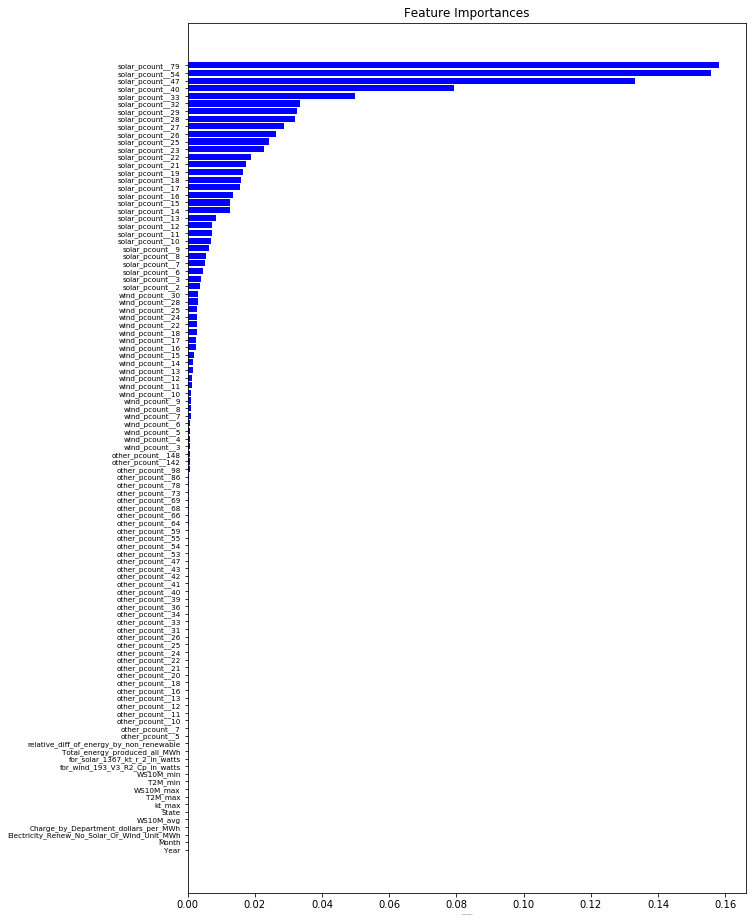

In [18]:
# Sorting importance matrix
features = X_train.columns
importances = regr.feature_importances_
indices = np.argsort(importances)

# adjusting the ploting area and aesthetics
import matplotlib as mpl
label_size = 7.25
mpl.rcParams['ytick.labelsize'] = label_size 
f, ax = plt.subplots(figsize=(10, 16))

plt.title('Feature Importances')
plt.barh(range(len(indices)), importances[indices], color='b', align='center')
plt.yticks(range(len(indices)), features) ## removed [indices]
plt.xlabel('Relative Importance', fontsize = 5)
plt.xlabel('Relative Importance', fontsize = 1)
plt.show()

# End of Notebook